# CAP√çTULO 2
- Datos y Distribuciones de Muestreo
- Muestreo Aleatorio y Sesgo de Muestra 
- Sesgo 
- Selecci√≥n Aleatoria 
- Tama√±o versus Calidad: ¬øCu√°ndo importa el tama√±o? 
- Media de la Muestra versus Media Poblacional 
- Lecturas Adicionales 
- Sesgo de Selecci√≥n 
- Regresi√≥n a la Media 
- Lecturas Adicionales 
- Distribuci√≥n de Muestreo de una Estad√≠stica 
- Teorema del L√≠mite Central 
- Error Est√°ndar 
- Lecturas Adicionales 
- El Bootstrap 
- Remuestreo versus Bootstrap 
- Lecturas Adicionales 
- Intervalos de Confianza 
- Lecturas Adicionales 
- Distribuci√≥n Normal 
- Normal Est√°ndar y Gr√°ficos QQ 
- Distribuciones de Cola Larga 
- Lecturas Adicionales 
- Distribuci√≥n t de Student 
- Lecturas Adicionales 
- Distribuci√≥n Binomial 
- Lecturas Adicionales 
- Distribuci√≥n Chi-Cuadrado 
- Lecturas Adicionales 
- Distribuci√≥n F 
- Lecturas Adicionales 
- Distribuciones de Poisson y Relacionadas 
- Distribuciones de Poisson 
- Distribuci√≥n Exponencial 
- Estimaci√≥n de la Tasa de Fallos 
- Distribuci√≥n Weibull 
- Lecturas Adicionales 
- Resumen # CAP√çTULO 2


# Datos y Distribuciones de Muestreo

Existe una idea equivocada popular que sostiene que la era de los grandes datos significa el fin de la necesidad de realizar muestreos. De hecho, la proliferaci√≥n de datos de variada calidad y relevancia refuerza la necesidad de los muestreos como una herramienta para trabajar eficientemente con una variedad de datos y minimizar el sesgo. Incluso en un proyecto de grandes datos, los modelos predictivos suelen desarrollarse y probarse con muestras. Tambi√©n se utilizan muestras en pruebas de varios tipos (por ejemplo, comparar el efecto de los dise√±os de p√°ginas web en los clics).

La Figura 2-1 muestra un esquema que respalda los conceptos que discutiremos en este cap√≠tulo: *datos y distribuciones de muestreo*. El lado izquierdo representa una poblaci√≥n que, en estad√≠stica, se asume que sigue una distribuci√≥n subyacente pero desconocida. Todo lo disponible es la muestra de datos y su distribuci√≥n emp√≠rica, mostrada en el lado derecho. Para pasar del lado izquierdo al lado derecho, se utiliza un procedimiento de muestreo (representado por una flecha). Las estad√≠sticas tradicionales se enfocaron mucho en el lado izquierdo, utilizando teor√≠as basadas en fuertes suposiciones sobre la poblaci√≥n. La estad√≠stica moderna se ha trasladado al lado derecho, donde tales suposiciones no son necesarias. En general, los cient√≠ficos de datos no necesitan preocuparse por la naturaleza te√≥rica del lado izquierdo y, en cambio, deben centrarse en los procedimientos de muestreo y los datos disponibles.
Hay algunas excepciones notables. A veces, los datos se generan a partir de un proceso f√≠sico que puede ser modelado. El ejemplo m√°s simple es lanzar una moneda: esto sigue una distribuci√≥n binomial. Cualquier situaci√≥n binomial en la vida real (comprar o no comprar, fraude o no fraude, hacer clic o no hacer clic) puede modelarse eficazmente por una moneda (con una probabilidad modificada de caer cara, por supuesto). En estos casos, podemos obtener una perspectiva adicional utilizando nuestra comprensi√≥n de la poblaci√≥n.

In [11]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
try:
    import commin
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / "data"

Define rutas a conjuntos de datos. Si no guardas tus datos en el mismo directorio que el c√≥digo, adapta los nombres de las rutas.

In [3]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

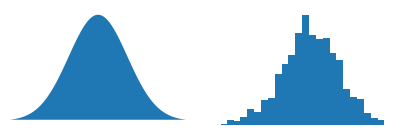

In [4]:
# Establecer una semilla para la generaci√≥n de n√∫meros aleatorios con NumPy para reproducibilidad.
np.random.seed(seed=1)

# Generar valores espaciados uniformemente en el rango -3 a 3 para la variable x.
x = np.linspace(-3, 3, 300)

# Generar una muestra de 1000 valores aleatorios provenientes de una distribuci√≥n normal.
xsample = stats.norm.rvs(size=1000)

# Crear una figura con dos subgr√°ficos en una fila y tama√±o espec√≠fico.
fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

# Configurar el primer subgr√°fico (izquierda).
ax = axes[0]
ax.fill(x, stats.norm.pdf(x))  # Rellenar el √°rea bajo la curva de la distribuci√≥n normal est√°ndar.
ax.set_axis_off()  # Desactivar ejes para este subgr√°fico.
ax.set_xlim(-3, 3)  # Establecer l√≠mites en el eje x.

# Configurar el segundo subgr√°fico (derecha).
ax = axes[1]
ax.hist(xsample, bins=30)  # Crear un histograma de la muestra aleatoria.
ax.set_axis_off()  # Desactivar ejes para este subgr√°fico.
ax.set_xlim(-3, 3)  # Establecer l√≠mites en el eje x.

# Ajustar los m√°rgenes y espacios entre subgr√°ficos en la figura (comentado para que no afecte).
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

# Mostrar la figura.
plt.show()

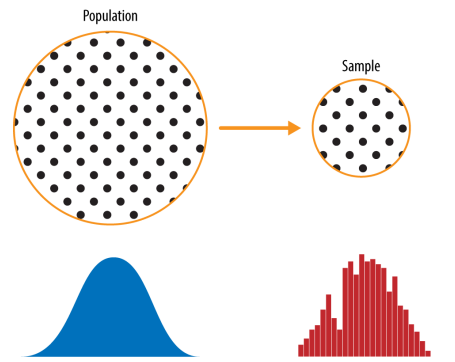

**Figura 2-1**. Poblaci√≥n versus muestra

# Muestreo Aleatorio y Sesgo de Muestra
Una $Muestra$ *es un subconjunto de datos de un conjunto de datos m√°s grande*; los estad√≠sticos llaman a este conjunto de datos m√°s grande la $Poblaci√≥n$. En estad√≠sticas, una poblaci√≥n no es lo mismo que en biolog√≠a; es un conjunto grande, definido (aunque a veces te√≥rico o imaginario) de datos.

El $Muestreo\ aleatorio$ *es un proceso en el cual cada miembro disponible de la poblaci√≥n que se est√° muestreando tiene una probabilidad igual de ser seleccionado para la muestra en cada extracci√≥n*. La muestra resultante se llama una $Muestra\ aleatoria\ simple$. El muestreo se puede realizar con reemplazo, en el cual las observaciones se devuelven a la poblaci√≥n despu√©s de cada extracci√≥n para una posible futura reselecci√≥n. O se puede realizar sin reemplazo, en cuyo caso las observaciones, una vez seleccionadas, no est√°n disponibles para extracciones futuras.

La *calidad de los datos a menudo es m√°s importante que la cantidad de datos al hacer una estimaci√≥n o un modelo basado en una muestra*. La calidad de los datos en la ciencia de datos implica la completitud, consistencia de formato, limpieza y precisi√≥n de los puntos de datos individuales. La estad√≠stica agrega la noci√≥n de representatividad.

- $Poblaci√≥n$: Todos los estudiantes de una universidad.
- $Muestra$: 100 estudiantes seleccionados al azar de esa universidad.

$Muestreo Aleatorio$:
- El $Muestreo\ aleatorio$ es un proceso en el cual cada miembro de la poblaci√≥n tiene una probabilidad igual de ser seleccionado para la muestra en cada extracci√≥n. Una muestra resultante de este proceso se llama una $Muestra\ aleatoria\ simple$.

- Ejemplo:
  - Supongamos que queremos realizar un estudio sobre las alturas de los estudiantes de una universidad. Hacemos un muestreo aleatorio seleccionando al azar 50 estudiantes de la poblaci√≥n completa. Cada estudiante tiene la misma oportunidad de ser seleccionado.

$Reemplazo\ y\ Sin\ Reemplazo$:
- El muestreo puede realizarse *con reemplazo*, donde las observaciones se devuelven a la poblaci√≥n despu√©s de cada extracci√≥n, o *sin reemplazo*, donde las observaciones seleccionadas no est√°n disponibles para futuras selecciones.

- Ejemplo:
  - $Con\ Reemplazo$: Despu√©s de seleccionar un estudiante, lo devolvemos a la poblaci√≥n antes de seleccionar el siguiente.
  - $Sin\ Reemplazo$: Despu√©s de seleccionar un estudiante, no vuelve a estar disponible para futuras selecciones.

Importancia de la Calidad de los Datos:
- La calidad de los datos es a menudo m√°s importante que la cantidad al realizar estimaciones o modelos basados en una muestra. Incluye la completitud, consistencia de formato, limpieza y precisi√≥n de los datos.

- Ejemplo:
  - Si estamos modelando los tiempos de respuesta en un sitio web, es crucial que los datos sean precisos y consistentes en su formato para obtener resultados confiables.

Representatividad en Estad√≠sticas:
  - La estad√≠stica agrega la noci√≥n de $Representatividad$, es decir, cu√°n bien la muestra refleja las caracter√≠sticas de la poblaci√≥n.

- Ejemplo:
  - Si estamos estimando la altura promedio de estudiantes en una universidad, nuestra muestra debe representar adecuadamente la diversidad de alturas en toda la poblaci√≥n estudiantil.

In [5]:
# Leer un archivo CSV llamado "loans_income.csv" desde el directorio 
#"data" y convertirlo en una Serie de pandas.
loans_income = pd.read_csv("data/loans_income.csv").squeeze('columns')

# Crear un DataFrame llamado "sample_data" con 1000 valores aleatorios de la Serie "loans_income" 
# en la columna 'income' y la etiqueta 'Data' en la columna 'type'.
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

# Crear un DataFrame llamado "sample_mean_05" con 1000 valores, cada uno siendo la media 
# de 5 valores aleatorios de la Serie "loans_income" y etiquetado como 'Mean of 5'.
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

# Crear un DataFrame llamado "sample_mean_20" con 1000 valores, cada uno siendo 
# la media de 20 valores aleatorios de la Serie "loans_income" y etiquetado como 'Mean of 20'.
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

# Concatenar los DataFrames "sample_data", "sample_mean_05" y "sample_mean_20" a lo
# largo de las filas y almacenar el resultado en un nuevo DataFrame llamado "results".
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

# Imprimir las primeras filas del DataFrame "results" para visualizar los datos generados.
print(results.head())

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


### T√©rminos Clave para Muestreo Aleatorio

##### Muestra

* Un subconjunto de un conjunto de datos m√°s grande.

##### Poblaci√≥n

* El conjunto de datos m√°s grande o la idea de un conjunto de datos.

##### $N (n)$

* El tama√±o de la poblaci√≥n (muestra).

##### Muestreo aleatorio

* Seleccionar elementos en una muestra al azar.

##### Muestreo estratificado

* Dividir la poblaci√≥n en estratos (conjunto) y seleccionar al azar de cada estrato.

##### Estrato (pl., estratos)

* Un subgrupo homog√©neo de una poblaci√≥n con caracter√≠sticas comunes.

##### Muestra aleatoria simple

* La muestra que resulta del muestreo aleatorio sin estratificar la poblaci√≥n.

##### Sesgo

* Error sistem√°tico.

##### Sesgo de muestra

* Una muestra que distorsiona la representaci√≥n de la poblaci√≥n.

Un ejemplo cl√°sico es la encuesta de Literary Digest de 1936 que predijo una victoria de Alf Landon sobre Franklin Roosevelt. Literary Digest, un destacado peri√≥dico de la √©poca, encuest√≥ a toda su base de suscriptores, adem√°s de listas adicionales de individuos, un total de m√°s de 10 millones de personas, y predijo una victoria abrumadora para Landon. George Gallup, fundador de la Encuesta Gallup, realiz√≥ encuestas quincenales a solo 2,000 personas y predijo con precisi√≥n la victoria de Roosevelt. La diferencia radicaba en la selecci√≥n de las personas encuestadas.
Literary Digest opt√≥ por la cantidad, prestando poca atenci√≥n al m√©todo de selecci√≥n. Terminaron encuestando a personas con un estatus socioecon√≥mico relativamente alto (sus propios suscriptores, adem√°s de aquellos que, por tener lujos como tel√©fonos y autom√≥viles, aparec√≠an en listas de mercad√≥logos). El resultado fue un sesgo de muestra; es decir, la muestra era diferente de alguna manera significativa y no aleatoria respecto a la poblaci√≥n m√°s grande que se supon√≠a deb√≠a representar. El t√©rmino no aleatorio es importante, ya que casi ninguna muestra, incluidas las muestras aleatorias, ser√° exactamente representativa de la poblaci√≥n.
El sesgo de muestra ocurre cuando la diferencia es significativa y se espera que contin√∫e para otras muestras extra√≠das de la misma manera que la primera.

### Auto-selecci√≥n de sesgo de muestreo
Las rese√±as de restaurantes, hoteles, cafeter√≠as, y dem√°s que lees en sitios de redes sociales como Yelp son propensas al sesgo porque las personas que las env√≠an no son seleccionadas al azar; m√°s bien, ellas mismas han tomado la iniciativa de escribir. Esto lleva al sesgo de auto-selecci√≥n: las personas motivadas para escribir rese√±as pueden haber tenido experiencias negativas, pueden tener una relaci√≥n con el establecimiento o simplemente pueden ser un tipo de persona diferente a aquellas que no escriben rese√±as. Ten en cuenta que aunque las muestras de auto-selecci√≥n pueden ser indicadores poco confiables del verdadero estado de las cosas, pueden ser m√°s confiables al simplemente comparar un establecimiento con uno similar; el mismo sesgo de auto-selecci√≥n podr√≠a aplicarse a ambos.

# Sesgo "BIAS"
El $Sesgo\ estad√≠stico$ *se refiere a errores de medici√≥n o muestreo que son sistem√°ticos y producidos por el proceso de medici√≥n o muestreo*. Deber√≠a hacerse una distinci√≥n importante entre los errores debidos al azar y los errores debidos al sesgo. Considera el proceso f√≠sico de un disparo de un arma hacia un objetivo. No golpear√° el centro absoluto del objetivo cada vez, ni siquiera con mucha frecuencia. Un $Proceso\ no\ sesgado$ *producir√° error, pero es aleatorio y no tiende fuertemente en ninguna direcci√≥n* (ver Figura 2-2). Los resultados mostrados en la Figura 2-3 muestran un proceso sesgado; a√∫n hay error aleatorio tanto en la direcci√≥n x como en la y, pero tambi√©n hay un sesgo. Los disparos tienden a caer en el cuadrante superior derecho.

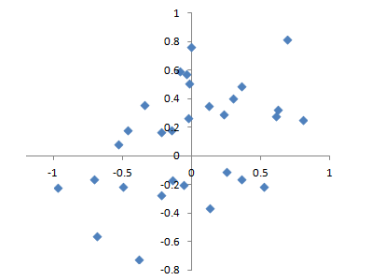

**Figura 2-2**. Gr√°fico de dispersi√≥n de disparos de un arma con un objetivo verdadero

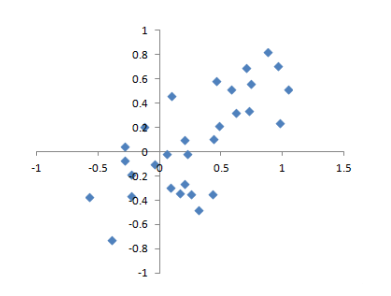

**Figura 2-3**. Gr√°fico de dispersi√≥n de disparos de un arma con un objetivo sesgado

El sesgo se presenta en diferentes formas y puede ser observable o invisible. Cuando un resultado sugiere sesgo (por ejemplo, mediante referencia a un punto de referencia o valores reales), suele ser un indicador de que un modelo estad√≠stico o de aprendizaje autom√°tico ha sido mal especificado, o se ha omitido una variable importante.

### Ejemplo: Sesgo estad√≠stico

  - El $Sesgo\ estad√≠stico$ se refiere a errores sistem√°ticos en la medici√≥n o el muestreo que son consistentes y provienen del proceso en s√≠. Es importante distinguir entre errores aleatorios y sesgo; mientras que los errores aleatorios son impredecibles y se distribuyen al azar, el sesgo sigue un patr√≥n constante.

Supongamos que est√°s midiendo la altura de una poblaci√≥n de estudiantes utilizando un dispositivo de medici√≥n que est√° ligeramente descalibrado. Este sesgo en la medici√≥n introducir√° un error sistem√°tico en tus resultados.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

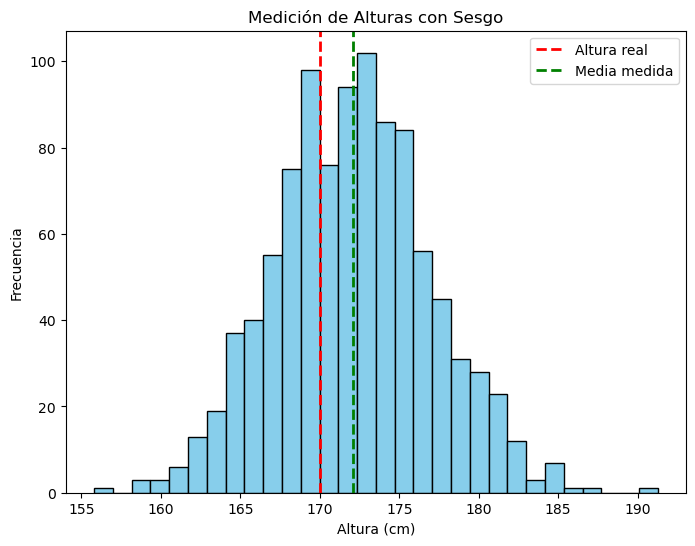

In [7]:
# Generar datos de alturas de estudiantes con un sesgo
np.random.seed(42)   # Establecer la semilla para reproducibilidad de resultados
altura_real = 170    # Definir la altura promedio real en cent√≠metros
sesgo_medicion = 2    # Establecer el sesgo en el dispositivo de medici√≥n

# Simular la medici√≥n de alturas con sesgo
muestras = 1000
# Generar alturas medidas con sesgo
alturas_medidas = np.random.normal(altura_real + sesgo_medicion, 5, muestras)  

# Graficar los resultados
plt.figure(figsize=(8, 6))  # Crear una figura de tama√±o 8x6 pulgadas
# Crear un histograma de las alturas medidas
plt.hist(alturas_medidas, bins=30, color="skyblue", edgecolor="black")  
# L√≠nea vertical para la altura real
plt.axvline(x=altura_real, color="red", linestyle="dashed", linewidth=2, label="Altura real")  
# L√≠nea vertical para la media de alturas medidas
plt.axvline(x=np.mean(alturas_medidas), color="green", linestyle="dashed", linewidth=2, label="Media medida")  
plt.xlabel("Altura (cm)")  # Etiqueta del eje x
plt.ylabel("Frecuencia")  # Etiqueta del eje y
plt.title("Medici√≥n de Alturas con Sesgo")  # T√≠tulo del gr√°fico
plt.legend()  # Mostrar la leyenda
plt.show()  # Mostrar el gr√°fico

Es este ejemplo, la altura real promedio de los estudiantes es 170 cm, pero el dispositivo de medici√≥n introduce un sesgo de 2 cm. La distribuci√≥n de alturas medidas mostrar√° un sesgo sistem√°tico, ya que las mediciones tienden a ser mayores de los que realmente son. La l√≠nea roja representa la altura real, mientras que la l√≠nea verde representa la media de las alturas medidas, que est√° sesgada debido al sesgo en el dispositivo de medici√≥n.

Este sesgo ilustra c√≥mo los errores sistem√°ticos pueden afectar las mediciones y la importancia de tener en cuenta el sesgo al intepretar los resultado estad√≠sticos.

# Selecci√≥n Aleatoria
Para evitar el problema de sesgo de muestra que llev√≥ a Literary Digest a predecir la victoria de Landon sobre Roosevelt, George Gallup (mostrado en la Figura 2-4) opt√≥ por m√©todos m√°s cient√≠ficamente seleccionados para lograr una muestra representativa del electorado estadounidense. Ahora existen diversas formas de lograr representatividad, pero en el centro de todas ellas se encuentra el $Muestreo\ aleatorio$.

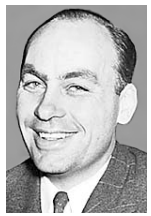

**Figura 2-4**. George Gallup, catapultado a la fama por el "fracaso de datos masivos" de Literary Digest

El muestreo aleatorio no siempre es f√°cil. Una definici√≥n adecuada de una poblaci√≥n accesible es clave. Supongamos que queremos generar un perfil representativo de clientes y necesitamos realizar una encuesta piloto a los clientes. La encuesta debe ser representativa pero es intensiva en mano de obra. Primero, necesitamos definir qui√©n es un cliente. Podr√≠amos seleccionar todos los registros de clientes donde la cantidad de compra $> 0$. ¬øIncluimos a todos los clientes anteriores? ¬øIncluimos reembolsos? ¬øCompras de prueba internas? ¬øRevendedores? ¬øTanto al agente de facturaci√≥n como al cliente?
Luego, necesitamos especificar un procedimiento de muestreo. Podr√≠a ser "seleccionar 100 clientes al azar". Donde est√© involucrado un muestreo de un flujo (por ejemplo, transacciones de clientes en tiempo real o visitantes web), las consideraciones de tiempo pueden ser importantes (por ejemplo, un visitante web a las 10 a. m. en un d√≠a laborable puede ser diferente de un visitante web a las 10 p. m. en un fin de semana).
En el $Muestreo\ estratificado$, *la poblaci√≥n se divide en estratos y se toman muestras aleatorias de cada estrato*. Los encuestadores pol√≠ticos podr√≠an buscar conocer las preferencias electorales de blancos, negros e hispanos. Una simple muestra aleatoria tomada de la poblaci√≥n dar√≠a muy pocos negros e hispanos, por lo que esos estratos podr√≠an ponderarse m√°s en el muestreo estratificado para obtener tama√±os de muestra equivalentes.

### Ejemplo: Selecci√≥n aleatoria

Supongamos que queremos simular la selecci√≥n aleatoria de estudiantes para realizar una encuentra sobre sus h√°bitos de estudio en una universidad. Utilizaremos la biblioteca `random` para realizar la selecci√≥n aleatoria.

In [8]:
import random

In [10]:
# Lista de estudiantes en la universidad
lista_estudiantes = ["Estudiante1", "Estudiante2", "Estudiante3", "Estudiante4",
                     "Estudiante5", "Estudiante6", "Estudiante7", "Estudiante8",
                     "Estudiante9", "Estudiante10"]

# N√∫mero de estudiantes a saleccionar para la encuesta
numero_muestra = 3

# Selecci√≥n aleatoria de estudiantes para la encuenta
muestra_seleccionada = random.sample(lista_estudiantes, numero_muestra)

# Mostrar los estudiantes seleccionados
print("Estudiantes seleccionados para la encuesta:")
for estudiante in muestra_seleccionada:
    print(estudiante)

Estudiantes seleccionados para la encuesta:
Estudiante1
Estudiante4
Estudiante5


Este c√≥digo simula la selecci√≥n aleatoria de 3 estudiantes de la lista total de estudiantes en la universidad. La funci√≥n `random.sample()` se utiliza para realizar la selecci√≥n aleatoria sin reemplazo, asegurando que cada estudiante seleccionado sea √∫nico.
En el contexto de una encuesta, esta selecci√≥n aleatoria ayuda a garantizar que la muestra sea representativa de la poblaci√≥n de estudiantes en la universidad, evitando as√≠ sesgos en la resultados de la encuesta.

# Tama√±o versus Calidad: ¬øCu√°ndo importa el tama√±o?
En la era del big data, a veces resulta sorprendente que menos es mejor. El tiempo y el esfuerzo dedicados al muestreo aleatorio no solo reducen el sesgo, sino que tambi√©n permiten prestar una mayor atenci√≥n a la exploraci√≥n de datos y a la calidad de los datos. Por ejemplo, los datos faltantes y los valores at√≠picos pueden contener informaci√≥n √∫til. Puede ser prohibitivamente caro rastrear los valores faltantes o evaluar los valores at√≠picos en millones de registros, pero hacerlo en una muestra de varios miles de registros puede ser factible. La representaci√≥n gr√°fica de datos y la inspecci√≥n manual se ralentizan si hay demasiados datos.

Entonces, ¬øcu√°ndo se necesitan cantidades masivas de datos?
El escenario cl√°sico para el valor de big data es cuando los datos no solo son grandes, sino tambi√©n dispersos. Consideremos las consultas de b√∫squeda recibidas por Google, donde las columnas son t√©rminos, las filas son consultas de b√∫squeda individuales y los valores de las celdas son 0 o 1, seg√∫n si una consulta contiene un t√©rmino. El objetivo es determinar el mejor destino de b√∫squeda previsto para una consulta dada. Hay m√°s de 150,000 palabras en el idioma ingl√©s, y Google procesa m√°s de un bill√≥n de consultas al a√±o. Esto da como resultado una matriz enorme, cuya inmensa mayor√≠a de las entradas son "0".

Este es un verdadero problema de big data; solo cuando se acumulan cantidades tan enormes de datos se pueden devolver resultados de b√∫squeda efectivos para la mayor√≠a de las consultas. Y cuanto m√°s se acumula data, mejores son los resultados. Para t√©rminos de b√∫squeda populares, esto no es un problema grave; se puede encontrar datos efectivos bastante r√°pido para el pu√±ado de temas extremadamente populares que son tendencia en un momento particular. El valor real de la tecnolog√≠a de b√∫squeda moderna radica en la capacidad para devolver resultados detallados y √∫tiles para una gran variedad de consultas de b√∫squeda, incluso aquellas que ocurren con una frecuencia de solo una entre un mill√≥n.

Considera la frase de b√∫squeda "Ricky Ricardo y Caperucita Roja". En los primeros d√≠as de Internet, esta consulta probablemente habr√≠a devuelto resultados sobre el l√≠der de la banda Ricky Ricardo, el programa de televisi√≥n I Love Lucy en el que aparec√≠a ese personaje y la historia infantil de Caperucita Roja. Ambos elementos individuales habr√≠an tenido muchas b√∫squedas a las que referirse, pero la combinaci√≥n habr√≠a tenido muy pocas. M√°s tarde, ahora que se han acumulado billones de consultas de b√∫squeda, esta consulta devuelve el episodio exacto de I Love Lucy en el que Ricky narra, de manera dram√°tica, la historia de Caperucita Roja a su hijo en una mezcla c√≥mica de ingl√©s y espa√±ol.

Ten en cuenta que el n√∫mero de registros pertinentes reales, es decir, aquellos en los que aparece esta consulta de b√∫squeda exacta o algo muy similar (junto con informaci√≥n sobre qu√© enlace hizo clic la gente finalmente), podr√≠a necesitar solo estar en el rango de miles para ser efectivo. Sin embargo, se necesitan muchos billones de puntos de datos para obtener estos registros pertinentes (y el muestreo aleatorio, por supuesto, no ayudar√°). V√©ase tambi√©n "Distribuciones de cola larga" en la p√°gina 73.

# Media de la Muestra versus Media de la Poblaci√≥n

El s√≠mbolo $\bar{x}$ (pronunciado "$x-bar$") se utiliza para representar la media de una muestra tomada de una poblaci√≥n, mientras que $Œº$ se utiliza para representar la media de toda una poblaci√≥n. ¬øPor qu√© hacer esta distinci√≥n? La informaci√≥n sobre las muestras se observa, y la informaci√≥n sobre poblaciones grandes a menudo se infiere a partir de muestras m√°s peque√±as. A los estad√≠sticos les gusta mantener separadas estas dos cosas en la simbolog√≠a.

- Media de la Muestra ($\bar{x}$):
  - Definici√≥n:
    - El s√≠mbolo $\bar{x}$ (pronunciado "barra x") se utiliza para representar la media de una muestra tomada de una poblaci√≥n.
  - Ejemplo:
    - Si tomamos una muestra de 100 estudiantes de una universidad y calculamos la media de sus alturas, esa ser√≠a $\bar{x}$.

- Media de la Poblaci√≥n ($Œº$):
  - Definici√≥n:
    - El s√≠mbolo $Œº$ se utiliza para representar la media de toda una poblaci√≥n.
  - Ejemplo:
    - Si quisi√©ramos conocer la altura promedio de todos los estudiantes en una universidad (no solo de la muestra de 100), usar√≠amos $Œº$.

Importancia de la Distinci√≥n:
- Raz√≥n:
  - La informaci√≥n sobre las muestras se observa directamente, mientras que la informaci√≥n sobre poblaciones grandes a menudo se infiere a partir de muestras m√°s peque√±as.
- Ejemplo:
  - Supongamos que queremos estimar la altura promedio de todos los estudiantes en una universidad. Ser√≠a poco pr√°ctico medir la altura de todos y cada uno de los estudiantes. En cambio, medimos la altura de una muestra de 100 estudiantes y usamos $\bar{x}$ como una estimaci√≥n de $Œº$.

Ejemplo Pr√°ctico:
- Situaci√≥n:
  - Queremos estimar el tiempo promedio que los estudiantes pasan estudiando por semana en una universidad.
- Procedimiento:
  - Tomamos una muestra de 50 estudiantes y registramos el tiempo que cada uno pasa estudiando.
- Resultados:
  - La media de esta muestra ser√≠a $\bar{x}$, representando el tiempo promedio de estudio para estos 50 estudiantes.
  - Sin embargo, queremos hacer una inferencia sobre la media de estudio para todos los estudiantes de la universidad, que ser√≠a $Œº$.

Importancia de la Inferencia:
- Raz√≥n:
  - A menudo, no podemos medir directamente la media de toda una poblaci√≥n. Inferimos esta informaci√≥n bas√°ndonos en las observaciones de nuestras muestras.
- Ejemplo:
  - Si encontramos que $\bar{x}$ (tiempo promedio de estudio en nuestra muestra) es 15 horas por semana, podemos inferir que $Œº$ (tiempo promedio de estudio para todos los estudiantes en la universidad) es probablemente cercano a ese valor, pero no necesariamente exactamente 15 horas.


### Ejemplo: Diferencia entre la media de una muestra $\bar{x}$ y la media de la poblaci√≥n $\mu$

Supongamos que queremos estudiar la altura de los estudiantes de una universidad.

In [13]:
import numpy as np

# Definir la altura promedio de la poblaci√≥n (Œº)
altura_promedio_poblacion = 170    # En cent√≠metros

# Generar una muestra de alturas de estudiantes
np.random.seed(123)    # Para reproducibilidad
# Muestra de 20 estudiantes
muestra_alturas = np.random.normal(altura_promedio_poblacion, 5, 20)   

# Calcular la media de la muestra (ùë•ÃÖ)
media_muestra = np.mean(muestra_alturas)

# Mostrar los resultados
print(f"Altura promedio de la poblaci√≥n (Œº): {altura_promedio_poblacion} cm")
print(f"Alturas de la muestra: {muestra_alturas}")
print(f"Media de la muestra (ùë•ÃÖ): {media_muestra:.2f} com")

Altura promedio de la poblaci√≥n (Œº): 170 cm
Alturas de la muestra: [164.57184698 174.98672723 171.41489249 162.46852643 167.10699874
 178.25718269 157.86660378 167.85543686 176.32968129 165.66629799
 166.60556924 169.52645516 177.45694813 166.80549002 167.7800902
 167.82824362 181.02965041 180.93393044 175.02026949 171.930932  ]
Media de la muestra (ùë•ÃÖ): 170.57 com


En este ejemplo, hemos definido una altura promedio de la poblaci√≥n `altura_promedio_poblacion` y hemos generado una muestra de alturas de estudiantes utilizando una distribuci√≥n normal. Luego, calculamos la media de la muestra `media_muestra` utilizando la funci√≥n `np.mean()`.

Es importante destacar que la media de la muestra (ùë•ÃÖ) puede variar de una muestra a otra, ya que se basa en datos observados, En contraste, la media de la poblaci√≥n (Œº) es una constante que representa el valor promedio de toda la poblaci√≥n.

Al ejecutar este c√≥digo, obtendras resultados diferentes cada vez que lo ejecutes devido a que la naturaleza aleatoria de la generaci√≥n de la muestra. Sin embargo, la media de la poblaci√≥n se mantiene constante. Este ejemplo iluestra c√≥mo se utiliza la notaci√≥n para distinguir entre la infromaci√≥n derivada de muestras y la informaci√≥n sobre la poblaci√≥n completa.

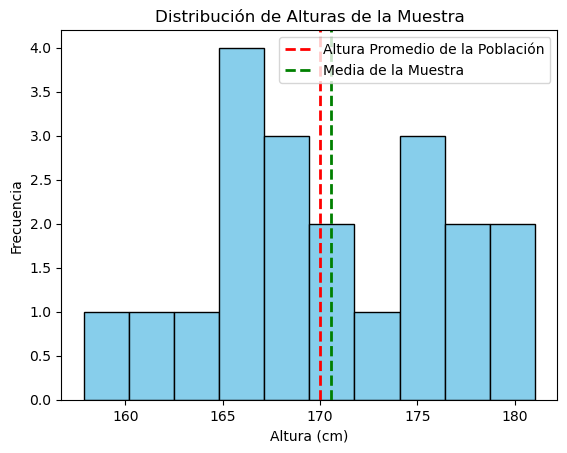

In [16]:
# Crear un histograma
plt.hist(muestra_alturas, bins=10, color="skyblue", edgecolor="black")
plt.axvline(x=altura_promedio_poblacion, color="red", linestyle="dashed",
            linewidth=2, label="Altura Promedio de la Poblaci√≥n")
plt.axvline(x=media_muestra, color="green", linestyle="dashed", linewidth=2,
            label="Media de la Muestra")
plt.xlabel("Altura (cm)")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de Alturas de la Muestra")
plt.legend()
plt.show()

Este c√≥digo generar√° un histograma de las alturas de la muestra con l√≠neas punteadas que indican la altura promedio de la poblaci√≥n y la media de la muestra. Esto te permitir√° visualizar c√≥mo se distribuyen las alturas de la muestra en comparaci√≥n con la altura promedio de la poblaci√≥n.

### Ideas Clave
* Incluso en la era de los grandes datos, el muestreo aleatorio sigue siendo una herramienta importante en el arsenal del cient√≠fico de datos.
* El sesgo ocurre cuando las mediciones u observaciones tienen sistem√°ticamente errores porque no son representativas de toda la poblaci√≥n.
* La calidad de los datos a menudo es m√°s importante que la cantidad de datos, y el muestreo aleatorio puede reducir el sesgo y facilitar la mejora de la calidad, lo que de lo contrario ser√≠a prohibitivamente costoso.

### Lecturas Adicionales
* Una revisi√≥n √∫til de los procedimientos de muestreo se puede encontrar en el cap√≠tulo "Sampling Methods for Online Surveys" en The SAGE Handbook of Online Research Methods, 2da edici√≥n, editado por Nigel G. Fielding, Raymond M. Lee y Grant Blank (SAGE Publications, 2016). Este cap√≠tulo incluye una revisi√≥n de las modificaciones al muestreo aleatorio que a menudo se utilizan por razones pr√°cticas de costo o viabilidad.
* La historia del fracaso de la encuesta de Literary Digest se puede encontrar en el sitio web Capital Century.

# Sesgo de selecci√≥n "Selection Bias"
Parafraseando a Yogi Berra: si no sabes lo que est√°s buscando, busca lo suficientemente duro y lo encontrar√°s.
El $Sesgo\ de\ selecci√≥n$ *se refiere a la pr√°ctica de elegir selectivamente datos, de manera consciente o inconsciente, de una manera que lleva a una conclusi√≥n que es enga√±osa o ef√≠mera*.
Si especificas una hip√≥tesis y realizas un experimento bien dise√±ado para probarla, puedes tener alta confianza en la conclusi√≥n. Sin embargo, esto frecuentemente no es lo que ocurre. A menudo, se examinan los datos disponibles y se intenta discernir patrones. Pero, ¬øson los patrones reales? ¬øO son simplemente el producto de buscar extensivamente en los datos hasta que algo interesante surge? Hay un dicho entre los estad√≠sticos: "*Si torturas los datos lo suficiente, tarde o temprano confesar√°n*".

La diferencia entre un fen√≥meno que verificas al probar una hip√≥tesis mediante un experimento y un fen√≥meno que descubres al revisar los datos disponibles se puede ilustrar con el siguiente experimento mental.

Imagina que alguien te dice que puede lanzar una moneda y hacer que salga cara en los pr√≥ximos 10 lanzamientos. Lo desaf√≠as (equivalente a un experimento), y proceden a lanzar la moneda 10 veces, con todos los lanzamientos saliendo cara. Claramente, le atribuyes alg√∫n talento especial: la probabilidad de que 10 lanzamientos de moneda salgan cara solo por casualidad es de 1 entre 1,000.

Ahora imagina que el anunciador en un estadio deportivo le pide a las 20,000 personas presentes que lancen una moneda 10 veces y que informen a un acomodador si obtienen 10 caras seguidas. La probabilidad de que alguien en el estadio obtenga 10 caras es extremadamente alta (m√°s del 99%, es decir, 1 menos la probabilidad de que nadie obtenga 10 caras). Claramente, seleccionar despu√©s del hecho a la persona (o personas) que obtiene 10 caras en el estadio no indica que tengan alg√∫n talento especial, es m√°s probable que sea suerte.

Dado que la revisi√≥n repetida de grandes conjuntos de datos es una propuesta de valor clave en la ciencia de datos, el sesgo de selecci√≥n es algo de lo que preocuparse. Una forma de sesgo de selecci√≥n de particular preocupaci√≥n para los cient√≠ficos de datos es lo que John Elder (fundador de Elder Research, una respetada consultora de miner√≠a de datos) llama el $Efecto\ de\ b√∫squeda\ vasta$. Si ejecutas repetidamente diferentes modelos y haces diferentes preguntas con un gran conjunto de datos, seguramente encontrar√°s algo interesante. Pero, ¬øes el resultado que encontraste realmente algo interesante o es solo un valor at√≠pico por casualidad?

Podemos protegernos contra esto utilizando un conjunto de retenci√≥n y, a veces, m√°s de un conjunto de retenci√≥n, con el que validar el rendimiento. Elder tambi√©n aboga por el uso de lo que √©l llama "target shuffling" (una prueba de permutaci√≥n, en esencia) para probar la validez de las asociaciones predictivas que sugiere un modelo de miner√≠a de datos.

Formas t√≠picas de sesgo de selecci√≥n en estad√≠sticas, adem√°s del efecto de b√∫squeda vasta, incluyen el $Muestreo\ no\ aleatorio$, la selecci√≥n selectiva de datos, la selecci√≥n de intervalos de tiempo que acent√∫an un efecto estad√≠stico particular y detener un experimento cuando los resultados parecen "interesantes".

### Ejemplo: Sesgo de selecci√≥n

Consideremos un escenario en el √°mbito de la salud. Supongamos que un grupo de investigadores est√° llevando a cabo un estudio sobre la efectividad de una nueva dieta para perder peso. Despu√©s de recopilar datos de varios participantes, deciden analizar solo los casos en los que los participantes han perdido peso significativamente.

In [17]:
import numpy as np

# Generar datos ficticios de p√©rdida de peso
np.random.seed(123)
peso_inicial = np.random.normal(70, 5, 100)  # Peso inicial en kilogramos
perdida_peso = np.random.normal(3, 2, 100)  # P√©rdida de peso en kilogramos

# Crear un DataFrame de Pandas para almacenar los datos
import pandas as pd
datos = pd.DataFrame({'Peso Inicial': peso_inicial, 'P√©rdida de Peso': perdida_peso})

# Seleccionar solo los casos de p√©rdida de peso significativa (sesgo de selecci√≥n)
casos_seleccionados = datos[datos['P√©rdida de Peso'] > 4]

# Mostrar los resultados
print("Datos originales:")
print(datos.head())
print("\nCasos seleccionados con p√©rdida de peso significativa:")
print(casos_seleccionados.head())

Datos originales:
   Peso Inicial  P√©rdida de Peso
0     64.571847         4.284109
1     74.986727        -0.955776
2     71.414892         4.424529
3     62.468526         8.196608
4     67.106999         2.950748

Casos seleccionados con p√©rdida de peso significativa:
    Peso Inicial  P√©rdida de Peso
0      64.571847         4.284109
2      71.414892         4.424529
3      62.468526         8.196608
11     69.526455         5.485739
13     66.805490         4.002498


En este ejemplo, los investigadores deciden analizar solo aquellos casos donde la p√©rdida de peso es significativa (meyor a 4 kilogramos). Al hacerlo, podr√≠an concluir que la nueva dieta es altamente efectiva para la p√©rdida de peso. Sin embargo, este enfoque introduce un sesgo de selecci√≥n, ya que solo se est√°n considerando los casos que muestran un resultado especifico.

Este sesgo de selecci√≥n podr√≠a llevar a conclusiones enga√±osas sobre la efectividad general de la dieta, ya que no se est√°n teniendo en cuenta aquellos casos donde la p√©rdida de peso no fue significativa. Es importante reconocer y abordar el sesgo de selecci√≥n para obtener conclusiones m√°s precisas y representativas en la investigaci√≥n cient√≠fica y el an√°lisis de datos.

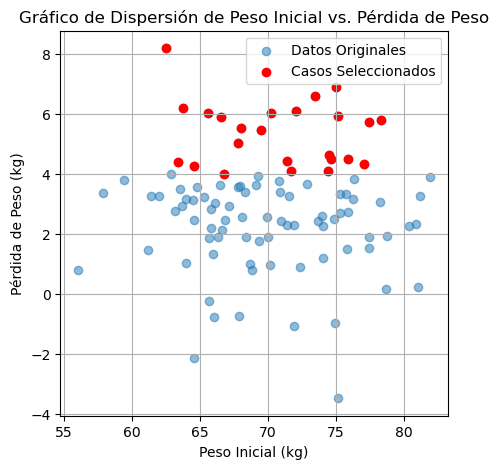

In [20]:
# Crea un gr√°fico de dispersi√≥n con tama√±o de figura de 10x6 pulgadas
plt.figure(figsize=(5, 5))
# Dibuja un gr√°fico de dispersi√≥n con los datos originales
plt.scatter(datos["Peso Inicial"], datos["P√©rdida de Peso"],
            label="Datos Originales", alpha=0.5)
# Dibuja un segundo conjunto de puntos resaltando los casos seleccionados en rojo
plt.scatter(casos_seleccionados["Peso Inicial"], casos_seleccionados["P√©rdida de Peso"],
            color="red", label="Casos Seleccionados")
# Etiqueta el eje x con "Peso Inicial (kg)"
plt.xlabel("Peso Inicial (kg)")
# Etiqueta el eje y con "P√©rdida de Peso (kg)"
plt.ylabel("P√©rdida de Peso (kg)")
# Asigna un t√≠tulo al gr√°fico
plt.title("Gr√°fico de Dispersi√≥n de Peso Inicial vs. P√©rdida de Peso")
# Muestra la leyenda en el gr√°fico
plt.legend()
# Habilita la cuadr√≠cula en el gr√°fico
plt.grid(True)
# Muestra el gr√°fico
plt.show()

Este c√≥digo generar√° un gr√°fico de dispersi√≥n con los datos originales y resaltar√° en rojo los casos seleccionados con p√©rdida de peso significativa. El eje x representa el peso inicial, el eje y representa la p√©rdida de peso y cada punto en el gr√°fico corresponde a un individuo en tu muestra.

- El sesgo de selecci√≥n se refiere a la pr√°ctica de elegir selectivamente datos, de manera consciente o inconsciente, de una manera que lleva a una conclusi√≥n enga√±osa o ef√≠mera.
  
Ilustraci√≥n con un Ejemplo:

Imagina que est√°s analizando los resultados de un nuevo tratamiento m√©dico para una enfermedad y te encuentras con un patr√≥n inusual en los datos.

- Escenario de Sesgo de Selecci√≥n:
  - Descripci√≥n:
    - Despu√©s de revisar los datos, encuentras que aquellos pacientes que siguieron el tratamiento durante m√°s tiempo mostraron mejoras significativas en comparaci√≥n con los que lo abandonaron temprano.
  - Problema de Sesgo:
    - La conclusi√≥n podr√≠a estar sesgada, ya que aquellos que abandonaron el tratamiento temprano podr√≠an haberlo hecho debido a la falta de mejoras, lo que introduce un sesgo de selecci√≥n. Puedes estar viendo solo los casos en los que el tratamiento parece funcionar, ignorando a aquellos que no respondieron y abandonaron el tratamiento.

Experimento Mental para Entender el Sesgo de Selecci√≥n:

- Escenario del Estadio:
  - Situaci√≥n:
    - Imagina que est√°s en un estadio deportivo con 20,000 personas.
  - Experimento Mental:
    - Se les pide a todas las personas en el estadio que lancen una moneda 10 veces y notifiquen si obtienen 10 caras seguidas.
  - Resultado:
    - Aunque es probable que varias personas en el estadio obtengan 10 caras seguidas por pura casualidad, seleccionar despu√©s del hecho a aquellas personas que tuvieron √©xito no indica necesariamente alg√∫n talento especial, es m√°s probable que sea suerte.

Importancia del Sesgo de Selecci√≥n en Ciencia de Datos:

- Raz√≥n:
  - Dado que la revisi√≥n repetida de grandes conjuntos de datos es una propuesta de valor clave en la ciencia de datos, el sesgo de selecci√≥n es algo de lo que preocuparse.
  - Ejecutar repetidamente diferentes modelos o hacer diferentes preguntas con un gran conjunto de datos puede llevar a encontrar algo interesante solo por casualidad.

Prevenci√≥n del Sesgo de Selecci√≥n:

- Sugerencias:
  - Utilizar conjuntos de retenci√≥n para validar el rendimiento.
  - Aplicar pruebas de permutaci√≥n o "target shuffling" para validar asociaciones predictivas sugeridas por modelos de miner√≠a de datos.

Formas T√≠picas de Sesgo de Selecci√≥n en Estad√≠sticas:

- Efecto de B√∫squeda Vasta:
  - Ejecutar repetidamente an√°lisis hasta encontrar algo interesante.

- Muestreo No Aleatorio:
  - Seleccionar muestras de manera no aleatoria, distorsionando la representatividad.

- Selecci√≥n Selectiva de Datos:
  - Elegir consciente o inconscientemente datos que respalden una conclusi√≥n preexistente.

- Selecci√≥n de Intervalos de Tiempo:
  - Seleccionar intervalos de tiempo espec√≠ficos que resalten un efecto estad√≠stico particular.

- Detener un Experimento Prematuramente:
  - Detener un experimento cuando los resultados parecen "interesantes", ignorando la posibilidad de resultados aleatorios.

En resumen, el sesgo de selecci√≥n es crucial para comprender la validez de las conclusiones en ciencia de datos y estad√≠sticas, y su prevenci√≥n implica pr√°cticas cuidadosas de validaci√≥n y pruebas.

### T√©rminos clave para Sesgo de selecci√≥n

##### Sesgo de selecci√≥n

* Sesgo resultante de la forma en que se seleccionan las observaciones.

##### Data snooping

* Investigaci√≥n extensiva a trav√©s de datos en busca de algo interesante.

##### Efecto de b√∫squeda vasta

* Sesgo o falta de reproducibilidad resultante de la modelizaci√≥n repetida de datos o la modelizaci√≥n de datos con un gran n√∫mero de variables predictoras.

# Regresi√≥n a la Media

La "Regresi√≥n a la Media" se refiere a un fen√≥meno que involucra mediciones sucesivas en una variable dada: las observaciones extremas tienden a ser seguidas por otras m√°s centrales. Poner un enfoque y significado especial en el valor extremo puede llevar a una forma de sesgo de selecci√≥n.

Los aficionados a los deportes est√°n familiarizados con el fen√≥meno del "Novato del A√±o, declive en segundo a√±o". Entre los atletas que comienzan su carrera en una temporada determinada (la clase de novatos), siempre hay uno que tiene un rendimiento mejor que todos los dem√°s. Generalmente, este "Novato del A√±o" no tiene un rendimiento tan bueno en su segundo a√±o. ¬øPor qu√©?

En casi todos los deportes principales, al menos los que se juegan con una pelota o puck, hay dos elementos que influyen en el rendimiento general:
- Habilidad
- Suerte

La regresi√≥n a la media es una consecuencia de una forma particular de sesgo de selecci√≥n. Cuando seleccionamos al novato con el mejor rendimiento, la habilidad y la buena suerte probablemente est√©n contribuyendo. En su pr√≥xima temporada, la habilidad seguir√° presente, pero muy a menudo la suerte no estar√°, por lo que su rendimiento disminuir√°; experimentar√° una regresi√≥n. Este fen√≥meno fue identificado por primera vez por Francis Galton en 1886 [Galton-1886], quien escribi√≥ al respecto en relaci√≥n con las tendencias gen√©ticas; por ejemplo, los hijos de hombres extremadamente altos tienden a no ser tan altos como su padre (ver Figura 2-5).

La $Regresi√≥n\ de\ la\ media$ es un fen√≥meno estad√≠stico que se refiere a la tendencia de las observaciones extremas al acercarse al promedio en mediciones repetidas. En otras palabras, cuando se observan valores extremadamente altos o bajos en una medici√≥n inicial, es probable que en mediciones posteriores esos valores extremos se regresen hacia el promedio.

Este fen√≥meno se puede entender con un ejemplo. Supongamos que est√°s mediendo al altura de padres e hijos en una poblaci√≥n. Si un padre es excepcionalmente alto, es probable que su hijo herede parte de esa altura, pero no necesariamente toda. En la primera generaci√≥n, es posible que el hijo sea m√°s alto que el promedio debido a la influencia gen√©tica del padre. Sin embargo, es probable que el hijo no sea tan extremadamente alto como el padre en la siguiente generaci√≥n.

La regresi√≥n a la media puede explicarse en t√©rminos de variabilidad y heredabilidad. Si hay variabilidad en caracteristicas y esas caracteristicas es en parte heredable, las observaciones extremas tienen a regresar hacia el promedio en la generaciones siguientes debido a la influencia combinada de la gen√©tica y otros factores.

En el contexto de ciencia de datos, la regresi√≥n a la media es importante tenerla en cuenta al interpretar resultado y predicciones. Cuando observas valores extremos en un conjunto de datos, es posible que en mediciones futuras esos valores extremos se acerquen al promedio debido a este fen√≥meno. Por lo tanto es crucial entender y considerar la regresi√≥n a la media al realizar an√°lisis y modelado estad√≠stico.

### Ejemplo: Regresi√≥n a la media 

Imaginemos que estamos analizando el rendimiento acad√©mico de los estudiantes de una escuela secundaria. Vamos a considerar dos mediciones sucesivas de las calificaciones en matem√°ticas de un grupo de estudiantes.

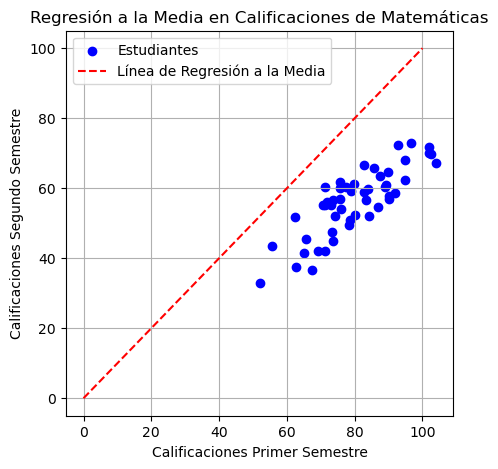

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos ficticios de calificaciones en matem√°ticas
np.random.seed(123)
calificaciones_primer_semestre = np.random.normal(80, 10, 50)  # Calificaciones en el primer semestre
calificaciones_segundo_semestre = 0.7 * calificaciones_primer_semestre + np.random.normal(0, 5, 50)  # Regresi√≥n a la media

# Crear un gr√°fico para visualizar las calificaciones
plt.figure(figsize=(5, 5))

plt.scatter(calificaciones_primer_semestre, calificaciones_segundo_semestre, color='blue', label='Estudiantes')
plt.plot([0, 100], [0, 100], '--', color='red', label='L√≠nea de Regresi√≥n a la Media')
plt.title('Regresi√≥n a la Media en Calificaciones de Matem√°ticas')
plt.xlabel('Calificaciones Primer Semestre')
plt.ylabel('Calificaciones Segundo Semestre')
plt.legend()
plt.grid(True)
plt.show()

En este ejemplo, hemos generado calificaciones en matem√°ticas para el primer semestre y luego creado una relaci√≥n para el segundo semestre que incluye una regresi√≥n a la media. La relaci√≥n entre las calificaciones del primer y segundo semestre est√° influenciada por la regresi√≥n a la media, lo que significa que las calificaciones extremas en el primer semestre tienden a acercarse al promedio en el segundo semestre.

El gr√°fico muestra puntos que representan a los estudiantes en ambos semestres. La l√≠nea roja discontinua representa la regresi√≥n a la media. Observar√°s que los puntos extremos en el primer semestre tienden a estar m√°s cerca del promedio en el segundo semestre, ilustrando el fen√≥meno de regresi√≥n a la media.

Este ejemplo refleja c√≥mo las observaciones extremas en una medici√≥n inicial (calificaciones del primer semestre) tienden a regresar hacia el promedio en mediciones posteriores (calificaciones del segundo semestre) debido a la variabilidad natural y la regresi√≥n a la media. Este fen√≥meno es crucial para comprender las tendencias a largo plazo y evitar interpretaciones sesgadas basadas en mediciones extremas.








La $Regresi√≥n\ a\ la\ media$ es un fen√≥meno estad√≠stico que implica que las observaciones extremas tienden a ser seguidas por otras m√°s centrales en mediciones sucesivas.

Ejemplo Pr√°ctico: Novato del A√±o en Deportes

- Escenario:
  - En el mundo deportivo, es com√∫n observar el fen√≥meno del "Novato del A√±o, declive en segundo a√±o".

- Explicaci√≥n del Fen√≥meno:
  - Primera Temporada:
    - Supongamos que en una temporada de deporte, varios novatos comienzan sus carreras.
    - Uno de ellos, el "Novato del A√±o", destaca y tiene un rendimiento excepcionalmente bueno.
    - Este rendimiento puede deberse a una combinaci√≥n de habilidad y suerte.

  - Segunda Temporada:
    - En la siguiente temporada, este "Novato del A√±o" puede experimentar un rendimiento menos excepcional.
    - Raz√≥n: La habilidad seguir√° presente, pero la suerte que contribuy√≥ al rendimiento destacado en la primera temporada puede no repetirse.
    - Como resultado, hay una regresi√≥n hacia un rendimiento m√°s cercano al promedio.

Ejemplo Conceptual: Altura de Padres e Hijos

- Contexto:
  - Estamos midiendo la altura de padres e hijos en una poblaci√≥n.

- Escenario:
  - Primera Generaci√≥n:
    - Si un padre es excepcionalmente alto, su hijo puede heredar parte de esa altura.
    - En la primera generaci√≥n, el hijo puede ser m√°s alto que el promedio debido a la influencia gen√©tica del padre.

  - Generaciones Posteriores:
    - Sin embargo, es probable que el hijo no sea tan extremadamente alto como el padre en las generaciones siguientes.
    - La altura de los descendientes tiende a regresar hacia el promedio, ya que la variabilidad gen√©tica y otros factores influyen en las mediciones.

Importancia en Ciencia de Datos:

- Contexto:
  - En ciencia de datos, es crucial entender la regresi√≥n a la media al interpretar resultados y hacer predicciones.

- Raz√≥n:
  - Cuando se observan valores extremos en un conjunto de datos, es posible que en mediciones futuras esos valores extremos se acerquen al promedio debido a este fen√≥meno.

- Conclusi√≥n:
  - La regresi√≥n a la media destaca la importancia de no sobreinterpretar observaciones extremas y considerar la variabilidad inherente en mediciones sucesivas.

En resumen, la regresi√≥n a la media es un fen√≥meno estad√≠stico fundamental que implica que las observaciones extremas tienden a equilibrarse hacia el promedio en mediciones repetidas, y su comprensi√≥n es esencial para una interpretaci√≥n precisa en el an√°lisis y modelado estad√≠stico.

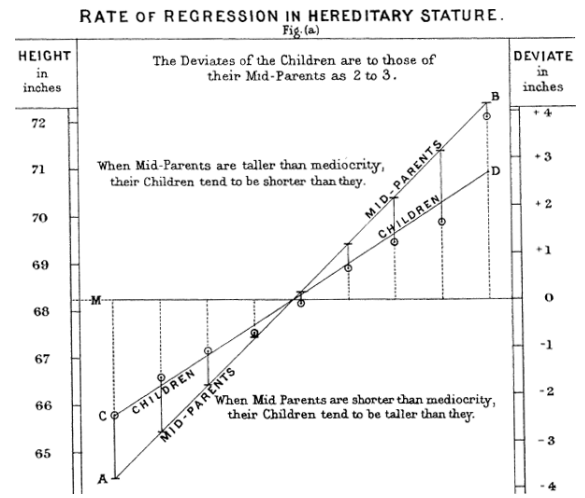

**Figura 2-5**. Estudio de Galton que identific√≥ el fen√≥meno de la regresi√≥n a la media

**Nota:** 

La regresi√≥n a la media, que significa "volver atr√°s", es diferente del m√©todo de modelado estad√≠stico de la regresi√≥n lineal, en el cual se estima una relaci√≥n lineal entre las variables predictoras y una variable de resultado.

### Ideas Clave:
* Especificar una hip√≥tesis y luego recopilar datos siguiendo los principios de aleatorizaci√≥n y muestreo aleatorio asegura contra el sesgo.
* Todas las dem√°s formas de an√°lisis de datos corren el riesgo de sesgo resultante del proceso de recopilaci√≥n/ an√°lisis de datos (ejecuci√≥n repetida de modelos en miner√≠a de datos, fisgoneo de datos en la investigaci√≥n y selecci√≥n de eventos interesantes despu√©s del hecho).

### Lecturas Adicionales:
* El art√≠culo de Christopher J. Pannucci y Edwin G. Wilkins, "Identifying and Avoiding Bias in Research", en la revista Plastic and Reconstructive Surgery (agosto de 2010), ofrece una excelente revisi√≥n de varios tipos de sesgos que pueden entrar en la investigaci√≥n, incluido el sesgo de selecci√≥n.
* El art√≠culo de Michael Harris, "Fooled by Randomness Through Selection Bias", proporciona una revisi√≥n interesante de consideraciones de sesgo de selecci√≥n en esquemas de trading en el mercado de valores, desde la perspectiva de los traders.

# Distribuci√≥n de Muestreo de una Estad√≠stica
El t√©rmino "distribuci√≥n de muestreo de una estad√≠stica" se refiere a la distribuci√≥n de alguna estad√≠stica de muestra sobre muchos conjuntos de muestras extra√≠das de la misma poblaci√≥n. Gran parte de la estad√≠stica cl√°sica se ocupa de realizar inferencias desde (peque√±as) muestras hacia (muy grandes) poblaciones.

La Distribuci√≥n de muestreo de una estadistica es un concepto clave en estadistica que se refiere a la variabilidad que se espera en el valor de una estad√≠stica calculada a partir de diferentes muestras de la misma poblaci√≥n. Para entender esto, es √∫til decomponer la definici√≥n:

1. Estad√≠stica: En estad√≠sticas, una estad√≠stica es cualqueir cantidad calculada a partir de los datos de una muestra. Puede ser la media, la desviaci√≥n est√°ndar, la porporci√≥n, o cualquier otra medida que resuma informac√≥n sobre la muestra.
2. Distribuci√≥n de Muestreo: La distribuci√≥n de muestreo se refiere a la distribuci√≥n te√≥rica de los posibles valores de una estad√≠stica cuando se calcula a partir de todas las posibles muestras de una poblaci√≥n dada. En otras palabras, es una desripci√≥n de c√≥mo varia la estad√≠stica cunado se toman muestras repetidas de la misma poblaci√≥n.

Entonces, la Distribuci√≥n de muestreo de una estadistica, es esencialmente una herramienta para entender qu√© tan vairable es una estadistica particular cuandp se calcula a partir de diferentes muestras de la misma poblaci√≥n

El concepto es fundamental en inferencia estad√≠stica, que es el proceso de hacer afirmaciones o tomar decisiones sobre una poblaci√≥n bas√°ndose en la informaci√≥n recopilada de una muestra de esa poblaci√≥n. Al comprender la distribuci√≥n de muestreo de un estad√≠stica, los estad√≠sticos pueden hacer inferencias m√°s precisas y entender mejor la incertidumbre asociada con sus conclusiones.

La $Distribuci√≥n\ muestral$ se relaciona con la variabilidad que se esperar√≠a al calcular una estad√≠stica espec√≠fica a partir de diferentes muestras tomadas de la misma poblaci√≥n. Aqu√≠ te presentar√© algunos ejemplos con la distribuci√≥n muestral de la media, que es un concepto fundamental.

### Ejemplo: Distribuci√≥n Muestral de la Media

Supongamos que estamos interesados en la altura de los estudiantes de una universidad y que la altura real de todos los estudiantes forma una distribuci√≥n normal con una media de 170 cm y una desviaci√≥n est√°ndar de 5 cm.

1. **Poblaci√≥n:**
   - Media poblacional (Œº): 170 cm
   - Desviaci√≥n est√°ndar poblacional (œÉ): 5 cm

2. **Muestra:**
   - Tomamos m√∫ltiples muestras de tama√±o $n$ (por ejemplo, $n$ = 30) de la poblaci√≥n.

3. **Estad√≠stica de Muestra:**
   - Calculamos la media $\bar{x}$ de cada muestra.

4. **Distribuci√≥n Muestral de la Media:**
   - La media de la distribuci√≥n muestral se aproxima a la media poblacional.

### Ejemplo: Distribuci√≥n Muestral de la Proporci√≥n

Supongamos que estamos interesados en la proporci√≥n de estudiantes que aprobaron un examen en una escuela y que la proporci√≥n real de aprobados es del 70%.

1. **Poblaci√≥n:**
   - Proporci√≥n poblacional (p): 0.70

2. **Muestra:**
   - Tomamos m√∫ltiples muestras de tama√±o n (por ejemplo, n = 100) de la poblaci√≥n.

3. **Estad√≠stica de Muestra:**
   - Calculamos la proporci√≥n de aprobados en cada muestra.

4. **Distribuci√≥n Muestral de la Proporci√≥n:**
   - La proporci√≥n de la distribuci√≥n muestral se aproxima a la proporci√≥n poblacional.

Estos son ejemplos simplificados, pero muestran c√≥mo la distribuci√≥n muestral de una estad√≠stica, como la media o la proporci√≥n, se aproxima a la verdadera medida poblacional a medida que aumentamos el tama√±o de la muestra. La distribuci√≥n muestral es fundamental para realizar inferencias sobre la poblaci√≥n bas√°ndose en muestras.

### Ejemplo: Distribuci√≥n Muestral de la Media

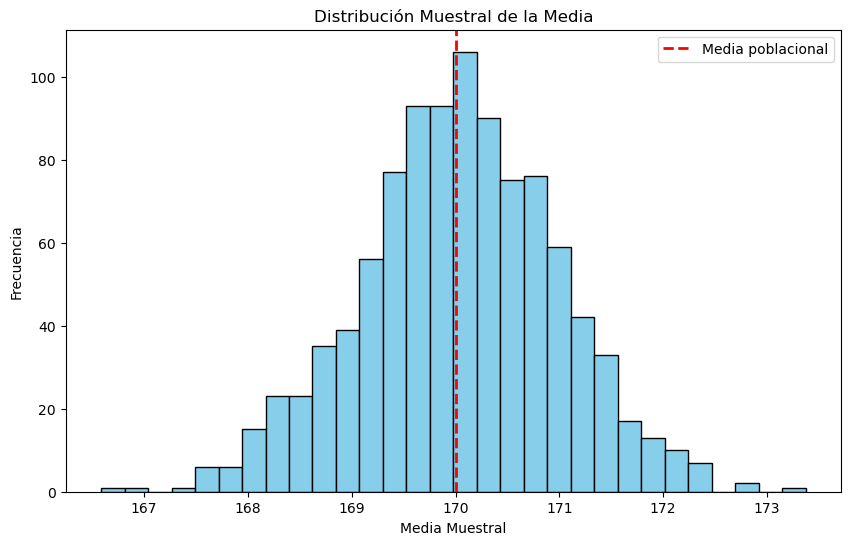

In [23]:
# Distribuci√≥n Muestral de la Media utilizando Python para realizar simulaciones.

import numpy as np
import matplotlib.pyplot as plt

# Par√°metros de la poblaci√≥n
media_poblacional = 170  # cm
desviacion_estandar_poblacional = 5  # cm
tamano_poblacional = 10000

# Tama√±o de la muestra
tamano_muestra = 30

# N√∫mero de muestras a tomar
num_muestras = 1000

# Simulaci√≥n de la distribuci√≥n muestral de la media
medias_muestrales = []

for _ in range(num_muestras):
    muestra = np.random.normal(media_poblacional, desviacion_estandar_poblacional, tamano_muestra)
    media_muestra = np.mean(muestra)
    medias_muestrales.append(media_muestra)

# Crear un histograma de las medias muestrales
plt.figure(figsize=(10, 6))
plt.hist(medias_muestrales, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=media_poblacional, color='red', linestyle='dashed', linewidth=2, label='Media poblacional')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n Muestral de la Media')
plt.legend()
plt.show()


Este c√≥digo simula la toma de m√∫ltiples muestras de tama√±o 30 de una poblaci√≥n con una distribuci√≥n normal de altura de estudiantes. Luego, calcula la media de cada muestra y crea un histograma de las medias muestrales.

Observar√°s que la distribuci√≥n de las medias muestrales se aproxima a una distribuci√≥n normal, independientemente de la forma de la poblaci√≥n original. Adem√°s, la l√≠nea roja punteada representa la media poblacional, mostrando que la media de la distribuci√≥n muestral se aproxima a la media poblacional.

Este ejemplo ilustra c√≥mo la distribuci√≥n muestral de la media converge hacia una distribuci√≥n normal y se centra alrededor de la verdadera media poblacional a medida que se toman m√°s muestras. La Distribuci√≥n Muestral es esencial para realizar inferencias sobre la poblaci√≥n bas√°ndose en muestras y proporciona una base para la construcci√≥n de intervalos de confianza y pruebas de hip√≥tesis.

### T√©rminos Clave para la Distribuci√≥n de Muestreo

##### Estad√≠stica de muestra

* Una m√©trica calculada para una muestra de datos extra√≠da de una poblaci√≥n m√°s grande.

##### Distribuci√≥n de datos

* La distribuci√≥n de frecuencia de valores individuales en un conjunto de datos.

##### Distribuci√≥n de muestreo

* La distribuci√≥n de frecuencia de una estad√≠stica de muestra sobre muchas muestras o remuestras.

##### Teorema del l√≠mite central

* La tendencia de la distribuci√≥n de muestreo a adquirir una forma normal a medida que aumenta el tama√±o de la muestra.

##### Error est√°ndar

* La variabilidad (desviaci√≥n est√°ndar) de una estad√≠stica de muestra sobre muchas muestras (no debe confundirse con la desviaci√≥n est√°ndar, que por s√≠ sola se refiere a la variabilidad de valores individuales de datos).

Por lo general, se extrae una muestra con el objetivo de medir algo (con una estad√≠stica de muestra) o modelar algo (con un modelo estad√≠stico o de aprendizaje autom√°tico). Dado que nuestra estimaci√≥n o modelo se basa en una muestra, podr√≠a contener errores; podr√≠a ser diferente si extraj√©ramos una muestra diferente. Por lo tanto, nos interesa cu√°n diferente podr√≠a ser; una preocupaci√≥n clave es la variabilidad de muestreo. Si tuvi√©ramos muchos datos, podr√≠amos extraer muestras adicionales y observar directamente la distribuci√≥n de una estad√≠stica de muestra. Por lo general, calcularemos nuestra estimaci√≥n o modelo utilizando la mayor cantidad de datos disponible de manera f√°cil, por lo que la opci√≥n de extraer muestras adicionales de la poblaci√≥n no est√° f√°cilmente disponible.

**Nota:**

Es importante distinguir entre la distribuci√≥n de los puntos de datos individuales, conocida como la distribuci√≥n de datos, y la distribuci√≥n de una estad√≠stica de muestra, conocida como la distribuci√≥n de muestreo.

La distinci√≥n entre la dsitribuci√≥n de datos y la distribuci√≥n de muestreo es crucial en estad√≠sticas y ciencia de datos.

1. **Distribuci√≥n de Datos:**

   - La distribuci√≥n de datos se refiere a c√≥mo est√°n dispersos o agrupados los puntos de datos individuales en un conjunto de datos.
   - Incluye caracter√≠sticas como la forma de la distribuci√≥n, la dispersi√≥n de los datos alrededor de la media, la presencia de valores at√≠picos, etc.
   - Se centra en describir la variabilidad y la estructura de los datos observados en un conjunto en particular.
   - Ejemplos de distribuciones de datos incluyen la distribuci√≥n normal, distribuciones sesgadas, distribuciones uniformes, entre otras.
  
2. **Distribuci√≥n de Muestreo:**

   - La distribuci√≥n de muestreo se refiere a la distribuci√≥n de las estad√≠sticas calculadas a partir de diferentes muestras tomadas de la misma poblaci√≥n.
   - Implica tomar m√∫ltiples muestras de la poblaci√≥n, calcular la estad√≠stica de inter√©s en cada muestra y examinar c√≥mo varian esas estadisticas.
   - La distribuci√≥n de uestreo es fundamental para realizar inferencias sobre la poblaci√≥n bas√°ndose en las muestras.
   - Ejemplos de distribuciones de muestreo incluyen la distribuci√≥n muestral de la media, distribuci√≥n muestral de la porporci√≥n, etc.
  
En resumen, la distribuci√≥n de datos se refiere a c√≥mo se agrupan o dispersan los valores individuales en un conjunto de datos especificos, miestras que la distribucion de muestreo se refiere a como varian las estadisticas calculadas a partir de diferentes muestras de la misma poblaci√≥n. La primera se ocupa de los valores observados, miestras que la segunda se centra en la variabilidad de las estadisticas calculadas a partir de esas muestras. Ambos conceptos son esenciales para realizar inferencias y generalizar conclusiones sobre poblaciones bas√°ndose en muestras.

La distribuci√≥n de una estad√≠stica de muestra, como la media, es probable que sea m√°s regular y en forma de campana que la distribuci√≥n de los datos en s√≠. Esto es m√°s evidente a medida que aumenta el tama√±o de la muestra en la que se basa la estad√≠stica. Adem√°s, cuanto mayor sea la muestra, m√°s estrecha ser√° la distribuci√≥n de la estad√≠stica de muestra.

Esto se ilustra en un ejemplo que utiliza los ingresos anuales de solicitantes de pr√©stamos a LendingClub (consulte "Un Peque√±o Ejemplo: Predicci√≥n de Incumplimiento de Pr√©stamos" en la p√°gina 239 para obtener una descripci√≥n de los datos). Tome tres muestras de estos datos: una muestra de 1,000 valores, una muestra de 1,000 medias de 5 valores y una muestra de 1,000 medias de 20 valores. Luego, grafique un histograma de cada muestra para producir la Figura 2-6.

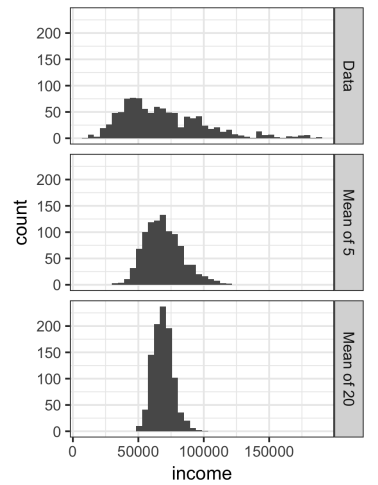

**Figura 2-6**. Histograma de los ingresos anuales de 1,000 solicitantes de pr√©stamos (arriba), luego 1,000 medias de $n=5$ solicitantes (en el medio), y finalmente 1,000 medias de $n=20$ solicitantes (abajo).

El histograma de los valores individuales de los datos est√° ampliamente distribuido y sesgado hacia valores m√°s altos, como era de esperar con datos de ingresos. Los histogramas de las medias de 5 y 20 son cada vez m√°s compactos y tienen una forma de campana m√°s pronunciada. Aqu√≠ est√° el c√≥digo R para generar estos histogramas, utilizando el paquete de visualizaci√≥n ggplot2:

    library(ggplot2)
    # take a simple random sample
    samp_data <- data.frame(income=sample(loans_income, 1000),
     type='data_dist')
    # take a sample of means of 5 values
    samp_mean_05 <- data.frame(
     income = tapply(sample(loans_income, 1000*5),
     rep(1:1000, rep(5, 1000)), FUN=mean),
     type = 'mean_of_5')
    # take a sample of means of 20 values
    samp_mean_20 <- data.frame(
     income = tapply(sample(loans_income, 1000*20),
     rep(1:1000, rep(20, 1000)), FUN=mean),
     type = 'mean_of_20')
    # bind the data.frames and convert type to a factor
    income <- rbind(samp_data, samp_mean_05, samp_mean_20)
    income$type = factor(income$type,
     levels=c('data_dist', 'mean_of_5', 'mean_of_20'),
     labels=c('Data', 'Mean of 5', 'Mean of 20'))
    # plot the histograms
    ggplot(income, aes(x=income)) +
     geom_histogram(bins=40) +
     facet_grid(type ~ .)

El c√≥digo en Python utiliza el FacetGrid de seaborn para mostrar los tres histogramas:

In [15]:
import pandas as pd
import seaborn as sns

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


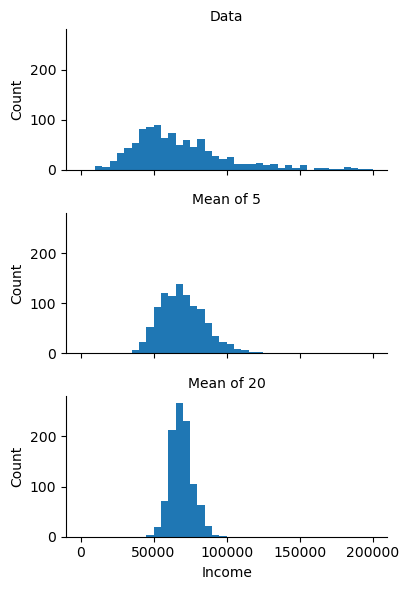

In [40]:
# Crear un DataFrame llamado "sample_data" con 1000 valores aleatorios de 
#la Serie "loans_income" en la columna 'income' y la etiqueta 'Data' en la columna 'type'.
sample_data = pd.DataFrame({
    "income": loans_income.sample(1000),
    "type": "Data",
})

# Crear un DataFrame llamado "sample_mean_05" con 1000 valores, cada uno
#siendo la media de 5 valores aleatorios de la Serie "loans_income" y etiquetado como 'Mean of 5'.
sample_mean_05 = pd.DataFrame({
    "income": [loans_income.sample(5).mean() for _ in range(1000)],
    "type": "Mean of 5",
})

# Crear un DataFrame llamado "sample_mean_20" con 1000 valores, cada 
#uno siendo la media de 20 valores aleatorios de la Serie "loans_income" y etiquetado como 'Mean of 20'.
sample_mean_20 = pd.DataFrame({
    "income": [loans_income.sample(20).mean() for _ in range(1000)],
    "type": "Mean of 20",
})

# Concatenar los DataFrames "sample_data", "sample_mean_05" y "sample_mean_20"
#a lo largo de las filas y almacenar el resultado en un nuevo DataFrame llamado "results".
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

# Crear un objeto FacetGrid de Seaborn llamado "g" que utilizar√° el DataFrame "results". 
# Los subgr√°ficos se organizar√°n en columnas seg√∫n la columna 'type' del DataFrame.
# Se establece que habr√° 1 subgr√°fico por columna, con una altura de 2 unidades y 
#una relaci√≥n de aspecto de 2.
g = sns.FacetGrid(results, col="type", col_wrap=1, height=2, aspect=2)

# Mapear un histograma en cada subgr√°fico utilizando la columna 'income' 
#del DataFrame "results".
# Se especifica el rango de valores [0, 200000] y se dividen los datos en
#40 contenedores (bins).
g.map(plt.hist, "income", range=[0, 200000], bins=40)

# Establecer etiquetas de ejes para los subgr√°ficos. El eje x se etiqueta como
#"Income" y el eje y como "Count".
g.set_axis_labels("Income", "Count")

# Establecer los t√≠tulos de los subgr√°ficos utilizando los nombres de las columnas
#'type' del DataFrame.
g.set_titles("{col_name}")

# Teorema del L√≠mite Central
El fen√≥meno que acabamos de describir se denomina el teorema del l√≠mite central. *Este teorema establece que las medias obtenidas de m√∫ltiples muestras se asemejar√°n a la conocida curva normal en forma de campana* (consulte "Distribuci√≥n Normal" en la p√°gina 69), incluso si la poblaci√≥n fuente no sigue una distribuci√≥n normal, siempre que el tama√±o de la muestra sea lo suficientemente grande y la desviaci√≥n de la normalidad de los datos no sea demasiado grande. El teorema del l√≠mite central permite utilizar f√≥rmulas de aproximaci√≥n normal, como la distribuci√≥n t, en el c√°lculo de distribuciones de muestreo para inferencias, es decir, intervalos de confianza y pruebas de hip√≥tesis.

Aunque el teorema del l√≠mite central recibe mucha atenci√≥n en los textos de estad√≠sticas tradicionales porque subyace en los mecanismos de las pruebas de hip√≥tesis y los intervalos de confianza, que ocupan la mitad del espacio en tales textos, los cient√≠ficos de datos deben ser conscientes de que este papel es menos relevante en la pr√°ctica de la ciencia de datos. Las pruebas de hip√≥tesis formales y los intervalos de confianza juegan un papel secundario en la ciencia de datos, y el bootstrap (consulte "El Bootstrap" en la p√°gina 61) est√° disponible de todos modos, por lo que el teorema del l√≠mite central no es tan central en la pr√°ctica de la ciencia de datos.

El $Teorema\ del\ L√≠mite\ Central$ es un principio fundamental en estad√≠stica que describe el comportamiento de las medias de muestras extra√≠das de una poblaci√≥n, inckuso si la distribuci√≥n original de la poblaci√≥n no es normal. Aqu√≠ se explica el contanido del comentario:

1. Definici√≥n del teorema del l√≠mite central:

   - Este teorema establece que, cuando se toman m√∫ltiples muestras de una poblaci√≥n y se calcula la media de cada muestra, la distribuci√≥n de esas medias se asemejar√° a una distribuci√≥n normal, independientemnete de la forma de la distribuci√≥n original de la poblaci√≥n. Esto es v√°lido siempre que el tama√±o de la muestra sea lo suficientemente grande y la desviaci√≥n de la normalidad no se excesiva.

2. Utilidad del teorema del l√≠mite central:

   - El teorema del l√≠mite central es esencial porque permite utilizar f√≥rmulas de aproximaci√≥n normal, como la distribuci√≥n t, en el c√°lculo de distribuciones de muestreo para realizar inferencias estad√≠sticas. Esto incluye la construcci√≥n de intervalos de confianza y la realizaci√≥n de pruebas de hp√≥tesis.
  
3. Importancia en la Ciencia de Datos:

   - Se se√±ala que, aunque el teorema del l√≠mite central es central en la estad√≠stica tradicional, en la pr√°ctica de la ciencia de datos su papel es menos relevante. Las pruebas de hp√≥tesis y los intervalos de confianza, que dependen del teorema del l√≠mite central, juegan un papel secundario en la ciencia de datos. Adem√°s, se menciona que el bootstrap, una t√©cnica de remuestreo, est√° disponible y a menudo es preferido en la pr√°ctica de la ciencia de datos. Por lo tanto, el teorema del l√≠mite central no es tan central en la ciencia de datos como en otros enfoques estad√≠sticos m√°s tradicionales.
  

### Teorema del L√≠mite Cental: Explicaci√≥n con Ejemplo

El teorema del l√≠mite central es una principio fundamental en estad√≠stica que describe co√≥mo se comportan las medias de m√∫tiples muestras, incluso se la poblaci√≥n original no sigue una distribuci√≥n normal.

### Ejemplo: Altura de Estudiantes
Supongamos que estamos interesados en la altura de todos los estudiantes de una universidad. La altura real de todos los estudiantes en la Universidad forma una distribuci√≥n original que podr√≠a no ser perfectamente normal.

1. Teorema del L√≠mite Cnetral:

   - El teorema dice que si tomamos m√∫ltiples muestras de estudiantes y calculamos la altura promedio en cada muestra, la distribuci√≥n de esas alturas promedio se asemejara a una distribuci√≥n normal, independientemente de la forma original de la distribuci√≥n de alturas individuales.
   - Ejercicio Pr√°ctico:
       - Tomamos varias muestras de diferentes tama√±os de estudiantes.
       - Calculamos la altura promedio en cada muestra.
   - Resultados Esperados:
       - Seg√∫n el teorema del l√≠mite central, aunque la distribuci√≥n de alturas individuales puede ser sesgada o no normal, la distribuci√≥n de las alturas promedio de las muestras ser√° m√°s parecida a una distribuci√≥n normal a medida que aumentamos el tama√±o de la muestra.


### Ejemplo: Teorema del L√≠mite Central

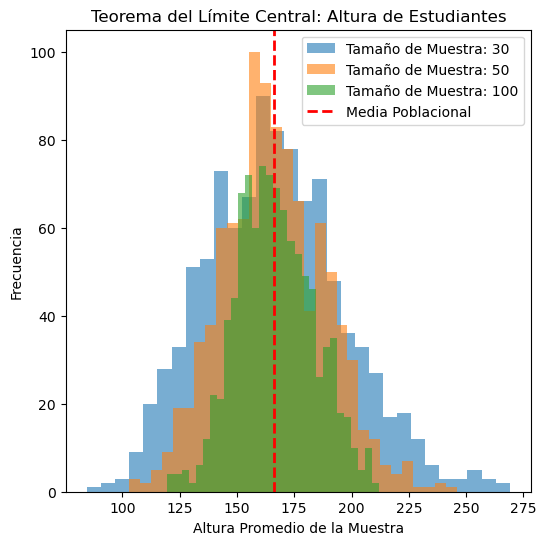

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Par√°metros de la poblaci√≥n (distribuci√≥n no normal)
np.random.seed(42)
altura_poblacion = np.random.exponential(170, 10000)  # Alturas de estudiantes
#(distribuci√≥n no normal)

# Tama√±os de muestra a considerar
tamanos_muestra = [30, 50, 100]

# N√∫mero de simulaciones
num_simulaciones = 1000

# Simulaci√≥n del Teorema del L√≠mite Central
plt.figure(figsize=(6, 6))

for tamano_muestra in tamanos_muestra:
    medias_muestrales = []

    for _ in range(num_simulaciones):
        muestra = np.random.choice(altura_poblacion, size=tamano_muestra, replace=False)
        media_muestra = np.mean(muestra)
        medias_muestrales.append(media_muestra)

    # Crear un histograma de las medias muestrales
    plt.hist(medias_muestrales, bins=30, alpha=0.6,
             label=f'Tama√±o de Muestra: {tamano_muestra}')

# Agregar una l√≠nea vertical para la media poblacional
media_poblacional = np.mean(altura_poblacion)
plt.axvline(x=media_poblacional, color='red', linestyle='dashed', linewidth=2,
            label='Media Poblacional')

plt.xlabel('Altura Promedio de la Muestra')
plt.ylabel('Frecuencia')
plt.title('Teorema del L√≠mite Central: Altura de Estudiantes')
plt.legend()
plt.show()

Este c√≥digo simula la toma de m√∫ltiples muestras de diferentes tama√±os de alturas de estudiantes. Aunque la distribuci√≥n original de alturas individuales no sigue una distribuci√≥n normal (se utiliza una distribuci√≥n exponencial para simular esto), observar√°s que la distribuci√≥n de las alturas promedio de las muestras se asemeja cada vez m√°s a una distribuci√≥n normal a medida que aumentamos el tama√±o de la muestra, lo cual es un reflejo del Teorema del L√≠mite Central.

La l√≠nea roja punteada en el gr√°fico representa la media poblacional, y puedes observar c√≥mo las medias de las muestras se centran alrededor de esta media poblacional a medida que el tama√±o de la muestra aumenta. Esto es consistente con la idea del Teorema del L√≠mite Central, que establece que la distribuci√≥n de las medias de las muestras se aproxima a una distribuci√≥n normal independientemente de la forma de la distribuci√≥n original a medida que aumentamos el tama√±o de la muestra.

# Error Est√°ndar
El error est√°ndar es una √∫nica m√©trica que resume la variabilidad en la distribuci√≥n de muestreo para una estad√≠stica. El error est√°ndar se puede estimar utilizando una estad√≠stica basada en la desviaci√≥n est√°ndar $s$ de los valores de la muestra y el tama√±o de la muestra $n$:
$$Error\ est√°ndar = EE = \frac{s}{\sqrt{n}}$$

A medida que aumenta el tama√±o de la muestra, el error est√°ndar disminuye, lo cual se corresponde con lo observado en la Figura 2-6. La relaci√≥n entre el error est√°ndar y el tama√±o de la muestra a veces se denomina la regla de la ra√≠z cuadrada de n: para reducir el error est√°ndar en un factor de 2, el tama√±o de la muestra debe aumentarse en un factor de 4.

La validez de la f√≥rmula del error est√°ndar se deriva del teorema del l√≠mite central. De hecho, no es necesario depender del teorema del l√≠mite central para entender el error est√°ndar. Considera el siguiente enfoque para medir el error est√°ndar:

1. Recolecta una cantidad de muestras completamente nuevas de la poblaci√≥n.
2. Para cada muestra nueva, calcula la estad√≠stica (por ejemplo, la media).
3. Calcula la desviaci√≥n est√°ndar de las estad√≠sticas calculadas en el paso 2; utiliza esto como tu estimaci√≥n del error est√°ndar.

En la pr√°ctica, este enfoque de recolecci√≥n de nuevas muestras para estimar el error est√°ndar generalmente no es factible (y estad√≠sticamente muy derrochador). Afortunadamente, resulta que no es necesario extraer muestras completamente nuevas; en su lugar, puedes usar remuestreos bootstrap. En estad√≠sticas modernas, el bootstrap se ha convertido en la forma est√°ndar de estimar el error est√°ndar. Puede utilizarse virtualmente para cualquier estad√≠stica y no depende del teorema del l√≠mite central ni de otras suposiciones de distribuci√≥n.

### Error Est√°ndar: Concepto y F√≥rmula

El $Error\ Est√°ndar$ es una medida que resume cu√°nto var√≠an las estad√≠sticas de muestreo alrededor de su valor real en la poblaci√≥n. Es √∫til para comprender cu√°n precisas son nuestras estimaciones basadas en muestras.

1. **F√≥rmula del Error Est√°ndar:**

   - La f√≥rmula del error est√°ndar se calcula usando la desviaci√≥n est√°ndar de la muestra ($s$) y el tama√±o de la muestra ($n$): 
   $$Error\ est√°ndar = EE = \frac{s}{\sqrt{n}}$$

2. **Interpretaci√≥n:**

   - Cuanto menor sea el error est√°ndar, m√°s precisa ser√° nuestra estimaci√≥n. Este valor resume cu√°nta variabilidad podemos esperar en nuestras estimaciones debido a la aleatoridad de las muestras.

3. **Relaci√≥n con el Tama√±o de la muestra:**

   - A medida que aumenta el tama√±o de la muestra $n$, el error est√°ndar disminuye. Esto significa que con muestras m√°s grandes, nuestras estimaciones son m√°s precisas y consistentes.
  
### Ejemplo:

Supongamos que estamos midiendo la altura de estudiantes en una escuela y queremos estimar la altura promedio en la poblaci√≥n. Tomamos varias muestras de diferentes tama√±os y calculamos el error est√°ndar.

- Si tenemos una muestra peque√±a ( pocos estudiantes), el error est√°ndar puese ser relativamente grande, lo que indic que nuestras estimaciones pueden variar significativamente de una muestra a otra.
- Si tenemos una muestra grande ( mucgas cantidades de estudiantes), el error est√°ndar srpa m√°s peque√±o, sugiriendo que nuestras estimaciones son m√°s confiables y tienden a acercarse m√°s a la verdadera altura promedio en la poblaci√≥n.

En resumen, el error est√°ndar nos ayuda a entender cu√°n confiables son nuestras estimaciones basadas en muestras, y su relaci√≥n con el tama√±o de la muestra, nos muestra la importancia de recopilar datos suficientes para obtener estimaciones m√°s precisas.

### Ejemplo: Error Est√°ndar

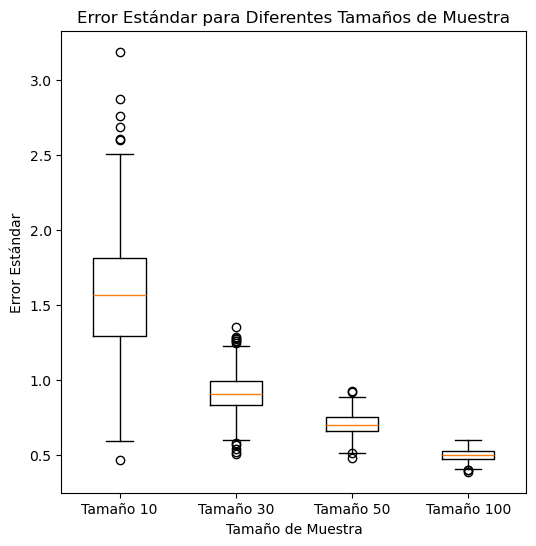

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Par√°metros de la poblaci√≥n
np.random.seed(42)
altura_poblacional = np.random.normal(170, 5, 10000)  # Alturas de estudiantes
#(distribuci√≥n normal)

# Tama√±os de muestra a considerar
tamanos_muestra = [10, 30, 50, 100]

# N√∫mero de simulaciones
num_simulaciones = 1000

# Calcularemos el error est√°ndar para cada tama√±o de muestra
errores_estandar = []

for tamano_muestra in tamanos_muestra:
    errores_simulacion = []

    for _ in range(num_simulaciones):
        muestra = np.random.choice(altura_poblacional, size=tamano_muestra,
                                   replace=False)
        error_estandar = np.std(muestra, ddof=1) / np.sqrt(tamano_muestra)
        errores_simulacion.append(error_estandar)

    errores_estandar.append(errores_simulacion)

# Crear un gr√°fico de cajas para comparar los errores est√°ndar
plt.figure(figsize=(6, 6))
plt.boxplot(errores_estandar, labels=[f"Tama√±o {tamano}" for tamano in tamanos_muestra])
plt.title('Error Est√°ndar para Diferentes Tama√±os de Muestra')
plt.xlabel('Tama√±o de Muestra')
plt.ylabel('Error Est√°ndar')
plt.show()

Este c√≥digo simula la toma de m√∫ltiples muestras de alturas de estudiantes de una poblaci√≥n con distribuci√≥n normal. Luego, calcula el error est√°ndar para cada tama√±o de muestra y compara los resultados visualmente utilizando un gr√°fico de cajas.

Observar√°s que a medida que aumenta el tama√±o de la muestra, el error est√°ndar tiende a disminuir. Esto refleja la relaci√≥n inversa entre el tama√±o de la muestra y la precisi√≥n de la estimaci√≥n. Con un tama√±o de muestra m√°s grande, el error est√°ndar es m√°s peque√±o, indicando que las estimaciones son m√°s precisas y consistentes. Este ejemplo ilustra c√≥mo el error est√°ndar puede utilizarse para evaluar la precisi√≥n de nuestras estimaciones basadas en muestras y c√≥mo esta precisi√≥n mejora con muestras m√°s grandes.

**Nota:**

No confundas la desviaci√≥n est√°ndar (que mide la variabilidad de los puntos de datos individuales) con el error est√°ndar (que mide la variabilidad de una m√©trica de muestra).

### Ideas Clave:
* La distribuci√≥n de frecuencia de una estad√≠stica de muestra nos indica c√≥mo esa m√©trica podr√≠a variar de una muestra a otra.
* Esta distribuci√≥n de muestreo puede estimarse mediante el bootstrap o mediante f√≥rmulas que dependen del teorema del l√≠mite central.
* Una m√©trica clave que resume la variabilidad de una estad√≠stica de muestra es su error est√°ndar.

### Lecturas Adicionales
El recurso multimedia en l√≠nea de estad√≠sticas de David Lane tiene una simulaci√≥n √∫til que te permite seleccionar una estad√≠stica de muestra, un tama√±o de muestra y el n√∫mero de iteraciones, y visualizar un histograma de la distribuci√≥n de frecuencia resultante.

# El Bootstrap
Una manera f√°cil y efectiva de estimar la distribuci√≥n de muestreo de una estad√≠stica o de los par√°metros de un modelo es extraer muestras adicionales, con reemplazo, de la muestra misma y recalcular la estad√≠stica o el modelo para cada remuestreo. Este procedimiento se llama bootstrap y no necesariamente implica ninguna suposici√≥n sobre la normalidad de los datos o de la estad√≠stica de muestra.

### El Bootstrap: Estimaci√≥n de la Distribuci√≥n de muestreo sin suposiciones espec√≠ficas

- El $Bootstrap$ es un m√©todo estad√≠stico que proporciona una manera f√°cil y efectiva de estimar la distribuci√≥n de muestreo de una estad√≠stica o los par√°metros de un modelo. Este proceso implica extraer muestras adicionales, con reemplazo, de la muestra original y recalcular la estad√≠stica o el modelo para cada remestreo.

**Pasos del Bootstrap:**

1. Muestra Inicial:
   - Comienza con una muestra de datos inicial que representa la poblaci√≥n de inter√©s.
2. Remuestreo con Reemplazo:
   - Se extraen muestras adicionales de la muestra inicial, y cada observaci√≥n tiene la posibilidad de ser seleccionada en m√∫ltiples remuestreos debido al reemplazo.
3. Rec√°lculo de Estad√≠sticas o Par√°metros:
   - Para cada remuestreo, se recalcula la estad√≠stica de inter√©s o los par√°metros del modelo.
4. Construcci√≥n de Distribuci√≥n de Muestreo:
   - Se construye una distribuci√≥n de muestreo utilizando las estad√≠sticas o parametros calculados en los remuestreos.

**Caracter√≠sticas Clave del Bootstrap:**
- **Muestreo con Reemplazo:**
  - Las muestras adicionales se extraen de la muestra original, y cada observaci√≥n tiene la posibilidad de ser seleccionada en m√∫ltiples remuestreos debido al reemplazo.

- **Estimaci√≥n de Distribuci√≥n de Muestreo:**
  - El objetivo principal es obtener una estimaci√≥n de la distribuci√≥n de muestreo de una estad√≠stica o de los par√°metros de un modelo sin hacer suposiciones espec√≠ficas sobre la distribuci√≥n subyacente de los datos.

**Ventajas del Bootstrap:**
- **Sin Suposiciones Duras:**
  - No requiere asumir una forma espec√≠fica de distribuci√≥n de datos.

- **Universalmente Aplicable:**
  - Puede aplicarse a casi cualquier estad√≠stica o modelo, incluso cuando no se conoce la distribuci√≥n subyacente.

- **Robusto y Efectivo:**
  - Es una t√©cnica robusta y efectiva para obtener intervalos de confianza y estimaciones puntuales.

**Importancia en la Ciencia de Datos:**
- **Pr√°ctica Com√∫n:**
  - En la ciencia de datos, el bootstrap es una herramienta com√∫nmente utilizada para evaluar la variabilidad de estimaciones y para construir intervalos de confianza.

- **Flexibilidad:**
  - Ofrece flexibilidad al no depender de suposiciones espec√≠ficas sobre la poblaci√≥n subyacente.

**Ejemplo de Aplicaci√≥n:**
- Supongamos que estamos interesados en estimar la media de una variable en una poblaci√≥n.
  - En lugar de hacer suposiciones sobre la distribuci√≥n de la poblaci√≥n, podr√≠amos aplicar el bootstrap.
  - Extraemos muestras adicionales de nuestros datos, con reemplazo, y calculamos la media para cada remuestreo.
  - Al repetir este proceso, obtenemos una distribuci√≥n de muestreo de la media sin asumir nada sobre la forma de la poblaci√≥n.

**Conclusi√≥n:**
- El bootstrap es una herramienta valiosa en la caja de herramientas de un cient√≠fico de datos, ya que proporciona una forma pr√°ctica y flexible de abordar la variabilidad en las estimaciones sin depender de suposiciones espec√≠ficas.

### Ejemplo: M√©todo Bootstrap

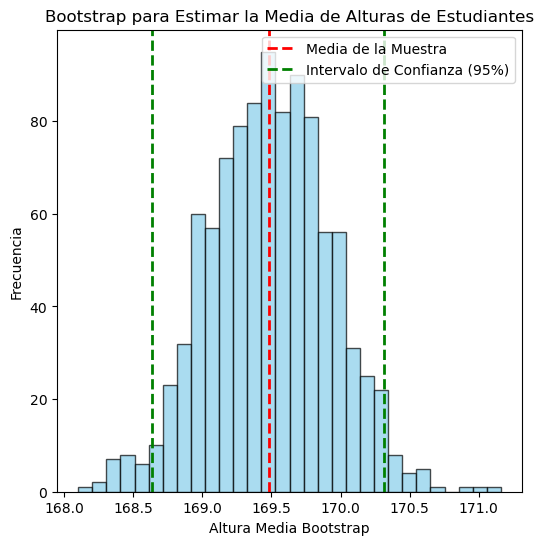

Media de la muestra: 169.48
Intervalo de confianza (95%): [168.63831788 170.31425743]


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de alturas de estudiantes (ejemplo simplificado)
np.random.seed(42)
altura_muestra = np.random.normal(170, 5, 100)  # Muestra de alturas (distribuci√≥n normal)

# Funci√≥n para realizar bootstrap
def bootstrap_sample(data, num_samples=1000):
    bootstrap_means = []

    for _ in range(num_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)

    return bootstrap_means

# Realizar bootstrap en la muestra de alturas
bootstrap_means = bootstrap_sample(altura_muestra)

# Calcular el intervalo de confianza del 95%
intervalo_confianza = np.percentile(bootstrap_means, [2.5, 97.5])

# Crear un histograma de las medias bootstrap
plt.figure(figsize=(6, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=np.mean(altura_muestra), color='red', linestyle='dashed', linewidth=2, label='Media de la Muestra')
plt.axvline(x=intervalo_confianza[0], color='green', linestyle='dashed', linewidth=2, label='Intervalo de Confianza (95%)')
plt.axvline(x=intervalo_confianza[1], color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Altura Media Bootstrap')
plt.ylabel('Frecuencia')
plt.title('Bootstrap para Estimar la Media de Alturas de Estudiantes')
plt.legend()
plt.show()

print(f"Media de la muestra: {np.mean(altura_muestra):.2f}")
print(f"Intervalo de confianza (95%): {intervalo_confianza}")


En este ejemplo, hemos generado una muestra de alturas de estudiantes y luego hemos realizado bootstrap para estimar la distribuci√≥n de muestreo de la media de altura. El intervalo de confianza del 95% se calcula a partir de los percentiles 2.5 y 97.5 de las medias bootstrap.

Observar√°s en el gr√°fico que la distribuci√≥n de las medias bootstrap se asemeja a una distribuci√≥n normal, y el intervalo de confianza del 95% proporciona una estimaci√≥n de la variabilidad de la media de altura.

Este procedimiento de bootstrap es √∫til cuando queremos estimar la distribuci√≥n de muestreo de una estad√≠stica sin hacer suposiciones espec√≠ficas sobre la forma de la poblaci√≥n original y es una herramienta poderosa en estad√≠sticas inferenciales.

### T√©rminos clave para el Bootstrap

#### Muestra bootstrap
* Una muestra tomada con reemplazo de un conjunto de datos observado.

#### Remuestreo
* El proceso de tomar muestras repetidas de datos observados; incluye tanto los procedimientos de bootstrap como de permutaci√≥n (barajado).

Conceptualmente, puedes imaginarte el bootstrap como la replicaci√≥n de la muestra original miles o millones de veces, de manera que tengas una poblaci√≥n hipot√©tica que incorpora todo el conocimiento de tu muestra original (simplemente es m√°s grande). Luego, puedes extraer muestras de esta poblaci√≥n hipot√©tica con el prop√≥sito de estimar una distribuci√≥n de muestreo; consulta la Figura 2-7.

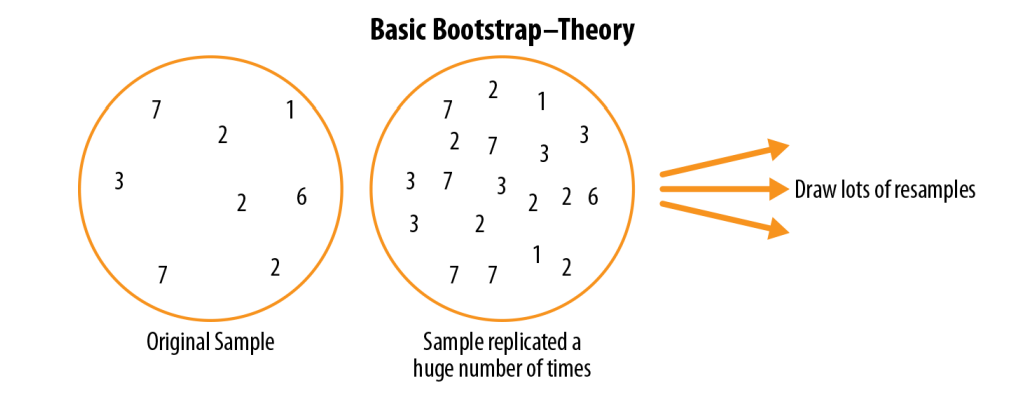

**Figura 2-7**. La idea del bootstrap

En la pr√°ctica, no es necesario replicar la muestra un gran n√∫mero de veces. Simplemente reemplazamos cada observaci√≥n despu√©s de cada selecci√≥n; es decir, hacemos un muestreo con reemplazo. De esta manera, creamos efectivamente una poblaci√≥n infinita en la que la probabilidad de que un elemento sea seleccionado no cambia de una selecci√≥n a otra. El algoritmo para un remuestreo bootstrap de la media, para una muestra de tama√±o n, es el siguiente:

1. Selecciona un valor de la muestra, reg√≠stralo y luego reempl√°zalo.
2. Repite n veces.
3. Registra la media de los n valores remuestreados.
4. Repite los pasos 1-3 R veces.
5. Utiliza los resultados de R para:
   a. Calcular su desviaci√≥n est√°ndar (esto estima el error est√°ndar de la media de la muestra).
   b. Producir un histograma o un diagrama de cajas.
   c. Encontrar un intervalo de confianza.

R, el n√∫mero de iteraciones del bootstrap, se elige de manera algo arbitraria. Cuantas m√°s iteraciones hagas, m√°s precisa ser√° la estimaci√≥n del error est√°ndar o el intervalo de confianza. El resultado de este procedimiento es un conjunto bootstrap de estad√≠sticas de muestra o par√°metros del modelo estimados, que luego puedes examinar para ver cu√°n variables son.

El paquete R "boot" combina estos pasos en una funci√≥n. Por ejemplo, lo siguiente aplica el bootstrap a los ingresos de las personas que solicitan pr√©stamos:

    library(boot)
    stat_fun <- function(x, idx) median(x[idx])
    boot_obj <- boot(loans_income, R=1000, statistic=stat_fun)

La funci√≥n `stat_fun` calcula la mediana para una muestra dada especificada por el √≠ndice `idx`. El resultado es el siguiente:

    Bootstrap Statistics :
     original bias std. error
    t1* 62000 -70.5595 209.1515

La estimaci√≥n original de la mediana es de $62,000. La\ distribuci√≥n\ bootstrap\ indica\ que\ la\ estimaci√≥n\ tiene\ un\ sesgo\ de\ aproximadamente\ -$70 y un error est√°ndar de $209. Los resultados variar√°n ligeramente entre ejecuciones consecutivas del algoritmo.
Las principales bibliotecas de Python no proporcionan implementaciones del enfoque bootstrap. Se puede implementar utilizando el m√©todo `resample` de scikit-learn:

In [17]:
# Crear una lista llamada "results" para almacenar las estad√≠sticas bootstrap.
results = []

# Realizar el procedimiento de bootstrap 1000 veces.
for nrepeat in range(1000):
    # Resample (muestrear con reemplazo) la Serie "loans_income".
    sample = resample(loans_income)
    
    # Calcular la mediana de la muestra y agregarla a la lista "results".
    results.append(sample.median())

# Convertir la lista "results" en una Serie de pandas.
results = pd.Series(results)

# Imprimir estad√≠sticas bootstrap.
print("Bootstrap Statistics:")

# Imprimir la mediana original de la Serie "loans_income".
print(f"original: {loans_income.median()}")

# Imprimir el sesgo (bias) calculado como la media de las estad√≠sticas bootstrap menos la mediana original.
print(f"bias: {results.mean() - loans_income.median()}")

# Imprimir el error est√°ndar de las estad√≠sticas bootstrap.
print(f"std. error: {results.std()}")

Bootstrap Statistics:
original: 62000.0
bias: -89.85650000000169
std. error: 233.34343855799503


El bootstrap se puede utilizar con datos multivariados, donde las filas se muestrean como unidades (ver Figura 2-8). Posteriormente, se podr√≠a ejecutar un modelo en los datos remuestreados, por ejemplo, para estimar la estabilidad (variabilidad) de los par√°metros del modelo o para mejorar el poder predictivo. Con √°rboles de clasificaci√≥n y regresi√≥n (tambi√©n llamados √°rboles de decisi√≥n), ejecutar m√∫ltiples √°rboles en muestras bootstrap y luego promediar sus predicciones (o, en el caso de la clasificaci√≥n, tomar un voto mayoritario) generalmente produce mejores resultados que usar un solo √°rbol. Este proceso se llama bagging (abreviatura de "bootstrap aggregating"; ver "Bagging and the Random Forest" en la p√°gina 259).

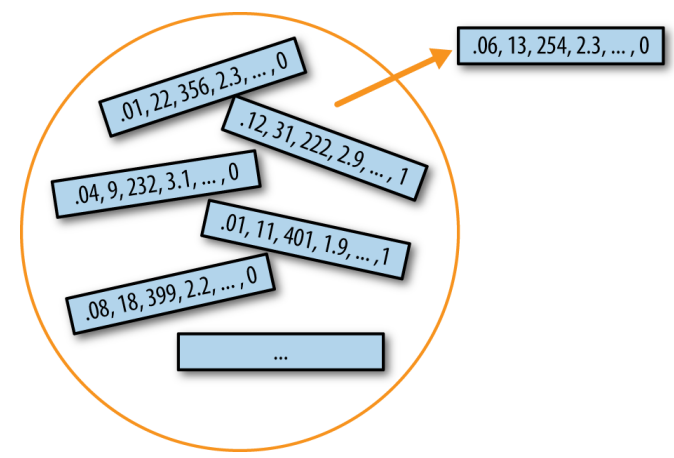

**Figura 2-8**. Muestreo bootstrap multivariado

El remuestreo repetido del bootstrap es conceptualmente simple y Julian Simon, un economista y dem√≥grafo, public√≥ un compendio de ejemplos de remuestreo, incluido el bootstrap, en su texto de 1969 "Basic Research Methods in Social Science" (Random House). Sin embargo, tambi√©n es intensivo en t√©rminos computacionales y no era una opci√≥n factible antes de la amplia disponibilidad de la potencia inform√°tica. La t√©cnica adquiri√≥ su nombre y se populariz√≥ con la publicaci√≥n de varios art√≠culos en revistas y un libro del estad√≠stico de Stanford Bradley Efron a finales de la d√©cada de 1970 y principios de la d√©cada de 1980. Fue particularmente popular entre los investigadores que utilizan estad√≠sticas pero no son estad√≠sticos, y para su uso con m√©tricas o modelos donde las aproximaciones matem√°ticas no est√°n f√°cilmente disponibles. La distribuci√≥n de muestreo de la media ha estado bien establecida desde 1908; la distribuci√≥n de muestreo de muchas otras m√©tricas no lo ha estado. El bootstrap se puede utilizar para determinar el tama√±o de la muestra; experimenta con diferentes valores para n para ver c√≥mo se ve afectada la distribuci√≥n de muestreo.

El bootstrap fue recibido con considerable escepticismo cuando se introdujo por primera vez; para muchos, ten√≠a la apariencia de convertir paja en oro. Este escepticismo se debi√≥ a una malinterpretaci√≥n del prop√≥sito del bootstrap.

**Nota:**

El bootstrap no compensa un tama√±o de muestra peque√±o; no crea nuevos datos ni rellena huecos en un conjunto de datos existente. Simplemente nos informa sobre c√≥mo se comportar√≠an muchas muestras adicionales al extraerse de una poblaci√≥n similar a nuestra muestra original.


# Resampling Versus Bootstrapping

En ocasiones, el t√©rmino "resampling" se utiliza de manera sin√≥nima con el t√©rmino "bootstrapping", tal como se describi√≥ anteriormente. Con mayor frecuencia, el t√©rmino "resampling" tambi√©n incluye procedimientos de permutaci√≥n (ver "Permutation Test" en la p√°gina 97), donde se combinan m√∫ltiples muestras y el muestreo puede realizarse sin reemplazo. En cualquier caso, el t√©rmino "bootstrap" siempre implica realizar un muestreo con reemplazo de un conjunto de datos observados.

### Resampling Versus Bootstrapping: Diferencias y Relaciones

#### Resampling:

**Definici√≥n General:** Resampling es un t√©rmino que se refiere a la t√©cnica de tomar m√∫ltiples muestras de datos con el objetivo de realizar inferencias estad√≠sticas o evaluar la variabilidad de las estimaciones.
* Incluye Diversas T√©cnicas: Es un sentido m√°s amplio, el resampling puede abarcar varias t√©cnicas, no solo el bootstrapping. Puede incluir m√©todos como la permutaci√≥n, donde se combinan m√∫ltiples muestras y el muestreo puede realizarse con o sin reemplazo.

#### Bootstrapping:

**Definici√≥n Espec√≠fica:** Bootstrapping es una t√©cnica especifica de resampling que implica extraer muestras adicionales, con reemplazo, de la muestra original para estimar la distribuci√≥n de muestreo de una estad√≠stica o par√°metro.
* Siempre Involucra Reemplazo: En el contexto del bootstrap, el muestreo siempre se realiza con reemplazo, lo que significa que una observaci√≥n puede ser seleccionada en mpultiples remuestreos.

**Conclusi√≥n:**

Mientras que "resampling" es un t√©rmino m√°s general que abarca diversas t√©cnicas de toma de muestras, el "bootstrapping" es una forma espec√≠fica de resampling que siempre implica el muestreo con reemplazo. La distinci√≥n entre los t√©rminos radica en la amplitud de t√©cnicas que pueden incluirse bajo el resampling, mientras que el bootstrap se centra en la repetici√≥n con reemplazo para estimar distribuciones de muestreo.

### Ideas claves
* El bootstrap (muestreo con reemplazo de un conjunto de datos) es una herramienta poderosa para evaluar la variabilidad de una estad√≠stica de muestra.
* El bootstrap se puede aplicar de manera similar en una amplia variedad de circunstancias, sin un estudio extenso de aproximaciones matem√°ticas a las distribuciones de muestreo.
* Tambi√©n nos permite estimar distribuciones de muestreo para estad√≠sticas donde no se ha desarrollado ninguna aproximaci√≥n matem√°tica.
* Cuando se aplica a modelos predictivos, la agregaci√≥n de m√∫ltiples predicciones de muestras bootstrap (bagging) supera el uso de un solo modelo.

### Lectura recomendada
* "An Introduction to the Bootstrap" by Bradley Efron and Robert Tibshirani (Chapman & Hall, 1993) fue el primer tratamiento en formato de libro sobre el bootstrap. Todav√≠a se lee ampliamente.
* La retrospectiva sobre el bootstrap en el n√∫mero de mayo de 2003 de Statistical Science (vol. 18, no. 2), discute (entre otros antecedentes, en el art√≠culo de Peter Hall "A Short Prehistory of the Bootstrap") la publicaci√≥n inicial del bootstrap por Julian Simon en 1969.
* Consulta "An Introduction to Statistical Learning" de Gareth James, Daniela Witten, Trevor Hastie y Robert Tibshirani (Springer, 2013) para secciones sobre el bootstrap y, en particular, bagging.

# Intervalos de Confianza
Tablas de frecuencia, histogramas, diagramas de caja (boxplots) y errores est√°ndar son todas formas de entender el error potencial en una estimaci√≥n de muestra. Los intervalos de confianza son otro m√©todo.

**Concepto General:**
- Los *intervalos de confianza* son una herramienta estad√≠stica que proporciona una medida de la incertidumbre asociada con una estimaci√≥n de muestra. En lugar de proporcionar una √∫nica estimaci√≥n puntual, los intervalos de confianza ofrecen un rango dentro del cual es probable que se encuentre el verdadero par√°metro poblacional.

**Comparaci√≥n con Otras Formas de Entender el Error:**
- **Tablas de Frecuencia, Histogramas y Boxplots:**
  - Estas representaciones visuales ayudan a comprender la distribuci√≥n de los datos y la variabilidad en las observaciones de muestra.

- **Errores Est√°ndar:**
  - Los errores est√°ndar miden la variabilidad de una estad√≠stica de muestra y proporcionan informaci√≥n sobre qu√© tan t√≠picamente var√≠a la estad√≠stica de una muestra a otra.

**Funcionamiento de los Intervalos de Confianza:**
- **Probabilidad de Contener el Par√°metro Poblacional:**
  - Un intervalo de confianza indica un rango dentro del cual es probable que se encuentre el verdadero par√°metro poblacional. Por ejemplo, un intervalo de confianza del 95% significa que, en teor√≠a, el 95% de los intervalos calculados de la misma manera contendr√≠an el verdadero valor del par√°metro.

**Importancia en Estad√≠sticas:**
- **Medida de Incertidumbre:**
  - Los intervalos de confianza son esenciales porque reconocen la incertidumbre inherente a las estimaciones de muestra. Proporcionan una manera de cuantificar esta incertidumbre y ofrecen una visi√≥n m√°s completa que una estimaci√≥n puntual √∫nica.

- **Tomar Decisiones Informadas:**
  - Al tener un intervalo de confianza, los investigadores y analistas pueden tomar decisiones informadas sobre la precisi√≥n de sus estimaciones y la confianza que pueden tener en la generalizaci√≥n de los resultados a la poblaci√≥n completa.

**Ejemplo Ilustrativo:**
- Supongamos que se estima la media de altura de una poblaci√≥n con un intervalo de confianza del 95%. Si se repitiera el proceso de estimaci√≥n muchas veces, se espera que el 95% de esos intervalos contengan la verdadera media de altura poblacional.

**Conclusi√≥n:**
- En resumen, los intervalos de confianza proporcionan un marco estad√≠stico para expresar la incertidumbre asociada con las estimaciones de muestra. Son una herramienta crucial para tomar decisiones basadas en datos y comunicar la confianza en los resultados de la investigaci√≥n o an√°lisis estad√≠stico.

### Ejemplo de Intervalos de Confianza: Puntuaciones de Ex√°menes

Supongamos que estamos interesados en estimar el puntaje promedio en matem√°ticas para una poblaci√≥n de estudiantes de una escuela secundaria. Tomamos una muestra aleatoria de 100 estudiantes y calculamos la media de sus puntajes en matem√°ticas junto con un intervalo de confianza del 95%.

1. Recopilaci√≥n de Datos de Muestra:
   - Tomamos una muestra aleatoria de 100 estudiantes de la poblaci√≥n de la escuela secundaria.
   - Calculamos la media muestral de los puntajes en matem√°ticas: 75 puntos.
   - Desviaci√≥n est√°ndar muestral (estimaci√≥n de la poblaci√≥n): 10 puntos.

2. Estimaci√≥n de Intervalo de Confianza:
   - Utilizamos la f√≥rmula del intervalo de confianza para la media:
     $$\text{Intervalo de Confianza} = \bar{x} \pm Z \left( \frac{s}{\sqrt{n}} \right)$$
     donde $\bar{x}$ es la media muestral, $s$ es la desviaci√≥n est√°ndar muestral, $n$ es el tama√±o de la muestra y $Z$ es el valor cr√≠tico asociado al nivel de confianza deseado (para el 95%, $Z \approx 1.96$).

   - Sustituimos los valores conocidos:
     $$\text{Intervalo de Confianza} = 75 \pm 1.96 \left( \frac{10}{\sqrt{100}} \right)$$

3. Resultado del Intervalo de Confianza:
   - Calculamos el intervalo de confianza y obtenemos, por ejemplo, $75 \pm 2$, lo que significa que estamos bastante seguros de que el puntaje promedio en matem√°ticas para la poblaci√≥n completa est√° en el rango de 73 a 77 puntos.

4. Interpretaci√≥n:
   - Con un nivel de confianza del 95%, podemos decir que si tomamos muchas muestras y calculamos intervalos de confianza similares, al menos el 95% de esos intervalos contendr√≠an el verdadero puntaje promedio de matem√°ticas para toda la poblaci√≥n.

5. Visualizaci√≥n Gr√°fica (Opcional):
   - Podemos visualizar el intervalo de confianza en un gr√°fico para comunicar de manera efectiva la incertidumbre asociada con nuestra estimaci√≥n.

En este ejemplo, los intervalos de confianza nos proporcionan una medida de la incertidumbre en nuestra estimaci√≥n del puntaje promedio en matem√°ticas. Son una herramienta esencial para comunicar la variabilidad esperada en nuestras conclusiones basadas en muestras y para tomar decisiones informadas sobre la poblaci√≥n completa.

### Ejemplo: C√°lculo Intervalo de Confianza

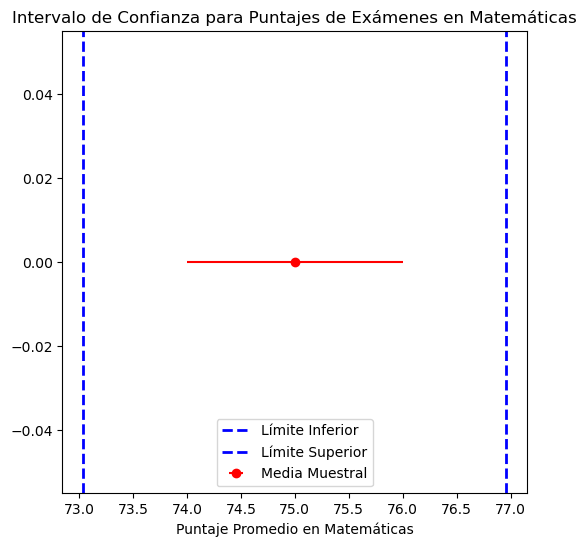

Intervalo de Confianza (95.0%): (73.04003601545995, 76.95996398454005)


In [28]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos de muestra
media_muestral = 75
desviacion_estandar_muestral = 10
tamanio_muestra = 100
nivel_confianza = 0.95

# C√°lculo del intervalo de confianza
error_estandar = desviacion_estandar_muestral / np.sqrt(tamanio_muestra)
intervalo_confianza = stats.norm.interval(nivel_confianza, loc=media_muestral, scale=error_estandar)

# Visualizaci√≥n gr√°fica
plt.figure(figsize=(6, 6))
plt.errorbar(media_muestral, 0, xerr=error_estandar, fmt='o', color='red', label='Media Muestral')
plt.axvline(x=intervalo_confianza[0], color='blue', linestyle='dashed', linewidth=2, label='L√≠mite Inferior')
plt.axvline(x=intervalo_confianza[1], color='blue', linestyle='dashed', linewidth=2, label='L√≠mite Superior')
plt.title('Intervalo de Confianza para Puntajes de Ex√°menes en Matem√°ticas')
plt.xlabel('Puntaje Promedio en Matem√°ticas')
plt.legend()
plt.show()

print(f"Intervalo de Confianza ({nivel_confianza*100}%): {intervalo_confianza}")

Este c√≥digo utiliza la distribuci√≥n normal para calcular el intervalo de confianza y visualiza la media muestral junto con los l√≠mites superior e inferior del intervalo en un gr√°fico de error. Observar√°s que el intervalo de confianza proporciona una estimaci√≥n del rango en el cual se espera que est√© el verdadero puntaje promedio en matem√°ticas para toda la poblaci√≥n.

La interpretaci√≥n es que, con un nivel de confianza del 95%, podemos afirmar que es probable que el puntaje promedio de la poblaci√≥n completa est√© en el rango especificado por el intervalo de confianza. Este rango refleja la incertidumbre asociada con nuestra estimaci√≥n basada en la muestra.

### T√©rminos clave para Intervalos de Confianza

##### Nivel de confianza
* El porcentaje de intervalos de confianza, construidos de la misma manera a partir de la misma poblaci√≥n, que se espera que contengan la estad√≠stica de inter√©s.

##### Extremos del intervalo
* El l√≠mite superior e inferior del intervalo de confianza.

Existe una aversi√≥n natural de los seres humanos hacia la incertidumbre; las personas (especialmente los expertos) dicen "no s√©" con demasiada poca frecuencia. Los analistas y los gerentes, aunque reconocen la incertidumbre, a menudo depositan una fe indebida en una estimaci√≥n cuando se presenta como un solo n√∫mero (una estimaci√≥n puntual). Presentar una estimaci√≥n no como un solo n√∫mero, sino como un rango, es una forma de contrarrestar esta tendencia. Los intervalos de confianza hacen esto de una manera fundamentada en los principios estad√≠sticos de muestreo.

Los intervalos de confianza siempre vienen con un nivel de cobertura, expresado como un porcentaje (alto), por ejemplo, 90% o 95%. Una forma de pensar en un intervalo de confianza del 90% es la siguiente: es el intervalo que encierra el 90% central de la distribuci√≥n de muestreo del bootstrap de una estad√≠stica de muestra (ver "El Bootstrap" en la p√°gina 61). M√°s generalmente, un intervalo de confianza del $x$% alrededor de una estimaci√≥n de muestra deber√≠a, en promedio, contener estimaciones de muestra similares al $x$% del tiempo (cuando se sigue un procedimiento de muestreo similar).

Dada una muestra de tama√±o $n$ y una estad√≠stica de muestra de inter√©s, el algoritmo para un intervalo de confianza del bootstrap es el siguiente:

1. Selecciona aleatoriamente una muestra de tama√±o n con reemplazo de los datos (un remuestreo).
2. Registra la estad√≠stica de inter√©s para el remuestreo.
3. Repite los pasos 1-2 muchas $(R)$ veces.
4. Para un intervalo de confianza del $x$%, elimina $[(100-x) / 2]%$ de los resultados del remuestreo R desde ambos extremos de la distribuci√≥n.
5. Los puntos de recorte son los extremos de un intervalo de confianza del bootstrap del $x$%.

La Figura 2-9 muestra un intervalo de confianza del 90% para el ingreso anual promedio de los solicitantes de pr√©stamos, basado en una muestra de 20 para la cual la media fue de $62,231.

68760.51844
55734.1


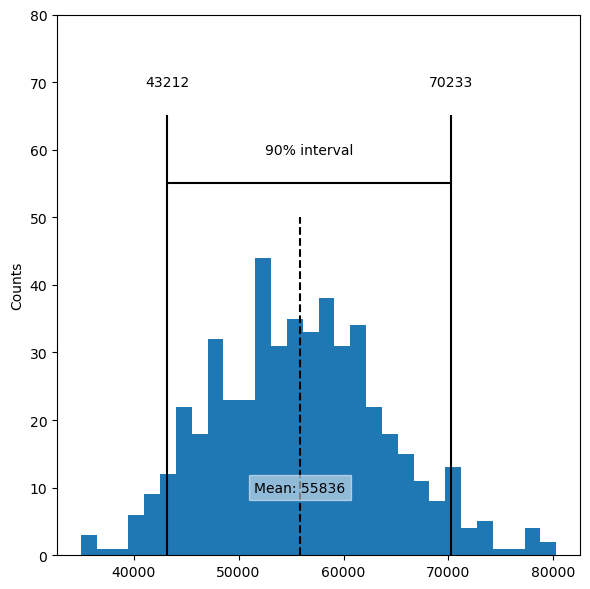

In [29]:
# Imprimir la media de la Serie "loans_income".
print(loans_income.mean())

# Establecer una semilla para la generaci√≥n de n√∫meros aleatorios con NumPy para reproducibilidad.
np.random.seed(seed=3)

# Crear una muestra de 20 datos de ingresos de pr√©stamos sin reemplazo.
sample20 = resample(loans_income, n_samples=20, replace=False)

# Imprimir la media de la muestra de 20 datos de ingresos de pr√©stamos.
print(sample20.mean())

# Inicializar una lista llamada "results" para almacenar las medias de las muestras bootstrap.
results = []

# Realizar el procedimiento de bootstrap 500 veces en la muestra de 20 datos.
for nrepeat in range(500):
    # Resample (muestrear con reemplazo) la muestra de 20 datos.
    sample = resample(sample20)
    
    # Calcular la media de la muestra bootstrap y agregarla a la lista "results".
    results.append(sample.mean())

# Convertir la lista "results" en una Serie de pandas.
results = pd.Series(results)

# Calcular un intervalo de confianza del 90% a partir de las estad√≠sticas bootstrap.
confidence_interval = list(results.quantile([0.05, 0.95]))

# Crear un histograma de las medias de las muestras bootstrap.
ax = results.plot.hist(bins=30, figsize=(6, 6))

# Dibujar l√≠neas y etiquetas para el intervalo de confianza del 90%.
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')

# Etiquetar el intervalo de confianza del 90%.
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

# Calcular la media de las medias de las muestras bootstrap.
meanIncome = results.mean()

# Dibujar una l√≠nea punteada y etiquetar la media de las medias de las muestras bootstrap.
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

# Establecer l√≠mites en el eje y del histograma.
ax.set_ylim(0, 80)

# Etiquetar el eje y del histograma como 'Counts'.
ax.set_ylabel('Counts')

# Ajustar los m√°rgenes para una presentaci√≥n m√°s compacta.
plt.tight_layout()

# Mostrar la figura.
plt.show()

**Figura 2-9**. Intervalo de confianza del bootstrap para el ingreso anual de solicitantes de pr√©stamos, basado en una muestra de 20.

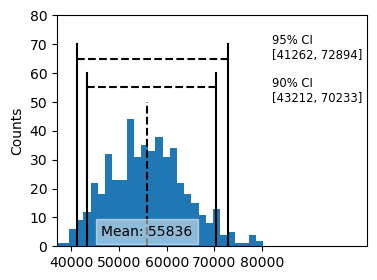

In [31]:
# Establecer una semilla para la generaci√≥n de n√∫meros aleatorios con NumPy para reproducibilidad.
np.random.seed(seed=3)

# Crear una muestra de 20 datos de ingresos de pr√©stamos sin reemplazo.
sample20 = resample(loans_income, n_samples=20, replace=False)

# Inicializar una lista llamada "results" para almacenar las medias de las muestras bootstrap.
results = []

# Realizar el procedimiento de bootstrap 500 veces en la muestra de 20 datos.
for nrepeat in range(500):
    # Resample (muestrear con reemplazo) la muestra de 20 datos.
    sample = resample(sample20)
    
    # Calcular la media de la muestra bootstrap y agregarla a la lista "results".
    results.append(sample.mean())

# Convertir la lista "results" en una Serie de pandas.
results = pd.Series(results)

# Calcular el intervalo de confianza del 90% a partir de las estad√≠sticas bootstrap.
confidence_interval_90 = list(results.quantile([0.05, 0.95]))

# Crear un histograma de las medias de las muestras bootstrap con un color espec√≠fico.
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')

# Dibujar l√≠neas y etiquetas para el intervalo de confianza del 90%.
ax.plot(confidence_interval_90, [55, 55], color='black', linestyle='--')
for x in confidence_interval_90:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval_90[0]:.0f}, {confidence_interval_90[1]:.0f}]',
       fontsize='small')

# Calcular el intervalo de confianza del 95% a partir de las estad√≠sticas bootstrap.
confidence_interval_95 = list(results.quantile([0.025, 0.975]))

# Crear otro histograma de las medias de las muestras bootstrap.
ax = results.plot.hist(bins=30, figsize=(4, 3))

# Dibujar l√≠neas y etiquetas para el intervalo de confianza del 95%.
ax.plot(confidence_interval_95, [65, 65], color='black', linestyle='--')
for x in confidence_interval_95:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval_95[0]:.0f}, {confidence_interval_95[1]:.0f}]',
       fontsize='small')

# Calcular la media de las medias de las muestras bootstrap.
meanIncome = results.mean()

# Dibujar una l√≠nea punteada y etiquetar la media de las medias de las muestras bootstrap.
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

# Establecer l√≠mites en el eje y del histograma.
ax.set_ylim(0, 80)

# Establecer l√≠mites en el eje x del histograma.
ax.set_xlim(37000, 102000)

# Establecer marcas en el eje x del histograma.
ax.set_xticks([40000, 50000, 60000, 70000, 80000])

# Etiquetar el eje y del histograma como 'Counts'.
ax.set_ylabel('Counts')

# Mostrar la figura.
plt.show()

El bootstrap es una herramienta general que se puede utilizar para generar intervalos de confianza para la mayor√≠a de las estad√≠sticas o par√°metros de modelos. Los libros de estad√≠stica y el software, con ra√≠ces en m√°s de medio siglo de an√°lisis estad√≠stico sin computadoras, tambi√©n har√°n referencia a intervalos de confianza generados por f√≥rmulas, especialmente la distribuci√≥n t de Student (ver "Distribuci√≥n t de Student" en la p√°gina 75).

**Nota:**

Por supuesto, lo que realmente nos interesa cuando tenemos un resultado de muestra es: "¬øCu√°l es la probabilidad de que el valor real se encuentre dentro de un cierto intervalo?" Esto no es realmente la pregunta que responde un intervalo de confianza, pero termina siendo c√≥mo la mayor√≠a de las personas interpretan la respuesta.

La pregunta de probabilidad asociada con un intervalo de confianza comienza con la frase "Dado un procedimiento de muestreo y una poblaci√≥n, ¬øcu√°l es la probabilidad de que...?" Para ir en la direcci√≥n opuesta, "Dado un resultado de muestra, ¬øcu√°l es la probabilidad de que (algo sea cierto sobre la poblaci√≥n)?" implica c√°lculos m√°s complejos y aspectos m√°s profundos e incalculables.

*El porcentaje asociado con el intervalo de confianza se denomina* $Nivel\ de\ confianza$. Cuanto mayor sea el nivel de confianza, m√°s amplio ser√° el intervalo. Adem√°s, cuanto menor sea la muestra, m√°s amplio ser√° el intervalo (es decir, mayor ser√° la incertidumbre). Ambos tienen sentido: cuanto m√°s seguro quieras estar y menos datos tengas, m√°s amplio debes hacer el intervalo de confianza para asegurarte suficientemente de capturar el valor real.

**Nota**:

Para un cient√≠fico de datos, un intervalo de confianza es una herramienta que se puede utilizar para tener una idea de cu√°n variable podr√≠a ser un resultado de muestra. Los cient√≠ficos de datos usar√≠an esta informaci√≥n no para publicar un art√≠culo acad√©mico o presentar un resultado a una agencia reguladora (como podr√≠a hacer un investigador), sino m√°s probablemente para comunicar el error potencial en una estimaci√≥n y, tal vez, para determinar si se necesita una muestra m√°s grande.

### Ideas Clave
* Los intervalos de confianza son la forma t√≠pica de presentar estimaciones como un rango de intervalo.
* Cuantos m√°s datos tengas, menos variable ser√° una estimaci√≥n de muestra.
* Cuanto menor sea el nivel de confianza que puedas tolerar, m√°s estrecho ser√° el intervalo de confianza.
* El bootstrap es una forma efectiva de construir intervalos de confianza.

### Lecturas Adicionales
* Para un enfoque de bootstrap sobre intervalos de confianza, consulta "Introductory Statistics and Analytics: A Resampling Perspective" de Peter Bruce (Wiley, 2014) o "Statistics: Unlocking the Power of Data, 2nd ed." de Robin Lock y otros cuatro miembros de la familia Lock (Wiley, 2016).
* Los ingenieros, que necesitan comprender la precisi√≥n de sus mediciones, utilizan intervalos de confianza quiz√°s m√°s que la mayor√≠a de las disciplinas. "Modern Engineering Statistics" de Thomas Ryan (Wiley, 2007) aborda los intervalos de confianza. Tambi√©n revisa una herramienta igualmente √∫til y que recibe menos atenci√≥n: los intervalos de predicci√≥n (intervalos alrededor de un solo valor, en lugar de una media u otra estad√≠stica resumida).

# Distribuci√≥n Normal
La ic√≥nica distribuci√≥n normal con forma de campana es fundamental en la estad√≠stica tradicional.1 El hecho de que las distribuciones de estad√≠sticas de muestra a menudo tengan forma normal ha convertido a esta distribuci√≥n en una herramienta poderosa en el desarrollo de f√≥rmulas matem√°ticas que aproximan esas distribuciones.

### Ejemplo de Distribuci√≥n Normal: Alturas de Adultos

Supongamos que estamos estudiando la altura de adultos en una poblaci√≥n espec√≠fica y que sabemos que la altura sigue una distribuci√≥n normal con una media de 170 cm y una desviaci√≥n est√°ndar de 10 cm.

1. Par√°metros de la Distribuci√≥n Normal:
   - Media (Œº): 170 cm
   - Desviaci√≥n Est√°ndar (œÉ): 10 cm

2. Propiedades de la Distribuci√≥n Normal:
   - La distribuci√≥n es sim√©trica y tiene forma de campana.
   - El 68% de los datos se encuentran dentro de una desviaci√≥n est√°ndar de la media.
   - El 95% de los datos se encuentran dentro de dos desviaciones est√°ndar de la media.
   - El 99.7% de los datos se encuentran dentro de tres desviaciones est√°ndar de la media.

3. Probabilidades y Preguntas:
   - Pregunta 1: ¬øCu√°l es la probabilidad de que un adulto seleccionado al azar tenga una altura entre 160 cm y 180 cm?
     - Respuesta 1: Podemos utilizar la regla emp√≠rica y decir que el 68% de las alturas est√°n dentro de una desviaci√≥n est√°ndar. Por lo tanto, la probabilidad es alta, alrededor del 68%.

   - Pregunta 2: ¬øCu√°l es la probabilidad de que un adulto tenga una altura superior a 190 cm?
     - Respuesta 2: Podemos calcular la probabilidad utilizando la tabla de la distribuci√≥n normal est√°ndar o la funci√≥n de densidad de probabilidad. Supongamos que es el 2.5% (por encima de dos desviaciones est√°ndar), pero esto puede variar seg√∫n la precisi√≥n requerida.

   - Pregunta 3: ¬øCu√°l es la altura por encima de la cual se encuentra el 10% m√°s bajo de la poblaci√≥n?
     - Respuesta 3: Utilizando la tabla de la distribuci√≥n normal inversa, podemos encontrar el valor correspondiente al percentil 10, que nos dar√° la altura por encima de la cual el 10% de la poblaci√≥n est√°.

4. Visualizaci√≥n Gr√°fica:
   - Podemos crear un histograma de alturas en la poblaci√≥n y superponer la curva de la distribuci√≥n normal para visualizar c√≥mo se ajusta la distribuci√≥n a los datos reales.

En este ejemplo, la distribuci√≥n normal proporciona una herramienta poderosa para comprender y hacer inferencias sobre la altura de los adultos en la poblaci√≥n. La familiaridad con las propiedades de la distribuci√≥n normal facilita la interpretaci√≥n de los resultados y la toma de decisiones basada en estas estimaciones estad√≠sticas.

### Ejemplo: Distribuci√≥n Normal

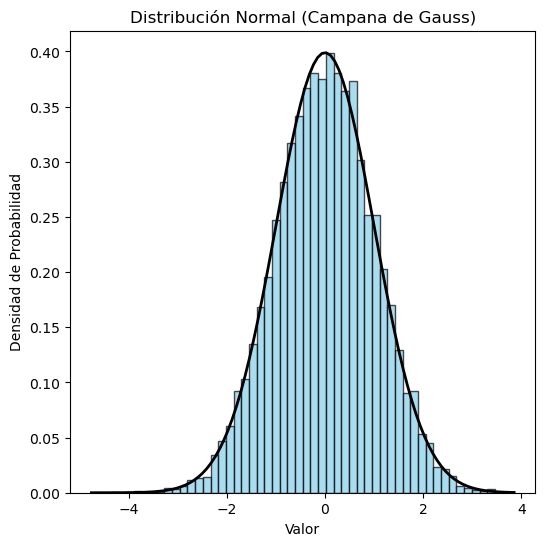

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Par√°metros de la distribuci√≥n normal
media = 0
desviacion_estandar = 1

# Generar datos desde una distribuci√≥n normal
datos_normal = np.random.normal(media, desviacion_estandar, 10000)

# Crear histograma
plt.figure(figsize=(6, 6))
plt.hist(datos_normal, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# Crear curva de densidad de probabilidad (PDF) de la distribuci√≥n normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, media, desviacion_estandar)
plt.plot(x, pdf, 'k-', linewidth=2)

# Etiquetas y t√≠tulo
plt.title('Distribuci√≥n Normal (Campana de Gauss)')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.show()


En este c√≥digo, generamos 10,000 datos aleatorios desde una distribuci√≥n normal con media 0 y desviaci√≥n est√°ndar 1. Luego, creamos un histograma para visualizar la distribuci√≥n de los datos y superponemos una curva de densidad de probabilidad (PDF) de la distribuci√≥n normal.

La curva de Gauss (o campana de Gauss) es sim√©trica alrededor de la media y tiene la forma caracter√≠stica de una campana. Es com√∫nmente utilizada en estad√≠sticas debido a propiedades como el Teorema del L√≠mite Central, que establece que la suma o promedio de un gran n√∫mero de variables independientes e id√©nticamente distribuidas tiende a seguir una distribuci√≥n normal, independientemente de la forma de la distribuci√≥n original.

Este ejemplo ilustra visualmente c√≥mo se ve la distribuci√≥n normal y c√≥mo la campana de Gauss es una representaci√≥n gr√°fica de esta distribuci√≥n.

### T√©rminos Clave para la Distribuci√≥n Normal

##### Error
* La diferencia entre un punto de datos y un valor predicho o promedio.

##### Estandarizar
* Restar la media y dividir por la desviaci√≥n est√°ndar.

##### $Z-score$
* El resultado de estandarizar un punto de datos individual.

##### Normal est√°ndar
* Una distribuci√≥n normal con media = 0 y desviaci√≥n est√°ndar = 1.

##### $QQ-Plot$
* Un gr√°fico para visualizar qu√© tan cerca est√° una distribuci√≥n de muestra de una distribuci√≥n especificada, por ejemplo, la distribuci√≥n normal.

En una distribuci√≥n normal (Figura 2-10), el 68% de los datos se encuentra dentro de una desviaci√≥n est√°ndar de la media, y el 95% se encuentra dentro de dos desviaciones est√°ndar.

**Nota**:

Es un error com√∫n pensar que la distribuci√≥n normal se llama as√≠ porque la mayor√≠a de los datos sigue una distribuci√≥n normal, es decir, es lo normal. La mayor√≠a de las variables utilizadas en un proyecto t√≠pico de ciencia de datos, de hecho, la mayor√≠a de los datos en su conjunto, no siguen una distribuci√≥n normal: consulta "Distribuciones de Cola Larga" en la p√°gina 73. La utilidad de la distribuci√≥n normal se deriva del hecho de que muchas estad√≠sticas siguen una distribuci√≥n normal en su distribuci√≥n de muestreo. Aun as√≠, las suposiciones de normalidad suelen ser un √∫ltimo recurso, utilizado cuando no se disponen de distribuciones de probabilidad emp√≠ricas o distribuciones de bootstrap.

**Nota:**

La curva de campana es ic√≥nica pero quiz√°s sobrevalorada. George W. Cobb, el estad√≠stico de Mount Holyoke conocido por su contribuci√≥n a la filosof√≠a de la ense√±anza de estad√≠sticas introductorias, argument√≥ en un editorial de noviembre de 2015 en el American Statistician que "el curso introductorio est√°ndar, que coloca a la distribuci√≥n normal en su centro, hab√≠a superado la utilidad de su centralidad".

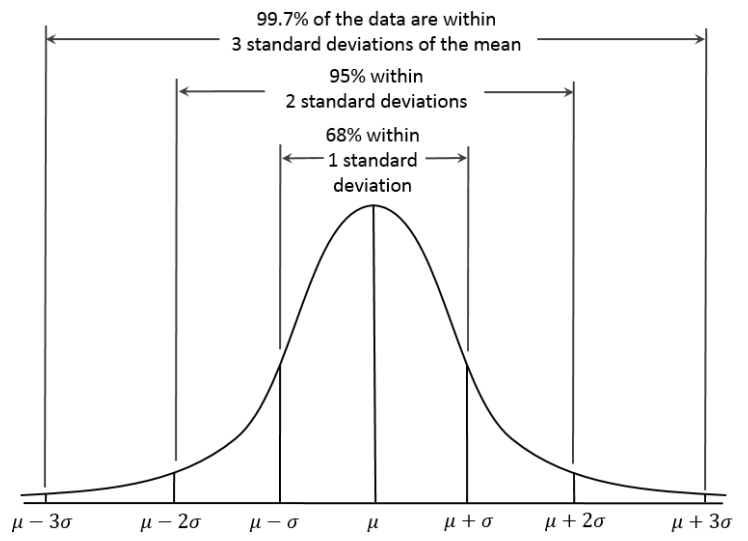

**Figura 2-10**. Curva normal

**Nota:**

La distribuci√≥n normal tambi√©n se conoce como distribuci√≥n $gaussiana$ en honor a Carl Friedrich Gauss, un prodigioso matem√°tico alem√°n de finales del siglo XVIII y principios del XIX. Otro nombre que se usaba anteriormente para la distribuci√≥n normal era la "distribuci√≥n de errores". Estad√≠sticamente hablando, un $error$ es la diferencia entre un valor real y una estimaci√≥n estad√≠stica como la media de la muestra. Por ejemplo, la desviaci√≥n est√°ndar (ver "Estimaciones de Variabilidad" en la p√°gina 13) se basa en los errores con respecto a la media de los datos. El desarrollo de Gauss de la distribuci√≥n normal surgi√≥ de su estudio de los errores de las mediciones astron√≥micas que se encontraron distribuidos de manera normal.

# Distribuci√≥n Normal Est√°ndar y Gr√°ficos QQ

Una $Distribuci√≥n\ normal\ est√°ndar$ es aquella en la que las unidades en el eje x se expresan en t√©rminos de desviaciones est√°ndar respecto a la media. Para comparar datos con una distribuci√≥n normal est√°ndar, restas la media y luego divides por la desviaci√≥n est√°ndar; esto tambi√©n se llama $Normalizaci√≥n$ o $Estandarizaci√≥n$ (ver "Estandarizaci√≥n (Normalizaci√≥n, z-Scores)" en la p√°gina 243). Ten en cuenta que la "estandarizaci√≥n" en este sentido no est√° relacionada con la estandarizaci√≥n de registros de base de datos (conversi√≥n a un formato com√∫n). El valor transformado se denomina $z-score$, y a veces se llama a la distribuci√≥n normal como la $z-distribuci√≥n$.

Un $gr√°fico$ $QQ$ (Quantile-Quantile) se utiliza para determinar visualmente qu√© tan cerca est√° una muestra de una distribuci√≥n especificada, en este caso, la distribuci√≥n normal. El gr√°fico QQ ordena los z-scores de menor a mayor y grafica el z-score de cada valor en el eje y; el eje x es el cuantil correspondiente de una distribuci√≥n normal para el rango de ese valor. Dado que los datos est√°n normalizados, las unidades corresponden al n√∫mero de desviaciones est√°ndar respecto a la media. Si los puntos caen aproximadamente en la l√≠nea diagonal, entonces se puede considerar que la distribuci√≥n de la muestra est√° cerca de ser normal. La Figura 2-11 muestra un gr√°fico QQ para una muestra de 100 valores generados aleatoriamente a partir de una distribuci√≥n normal; como era de esperar, los puntos siguen de cerca la l√≠nea. Esta figura se puede producir en R con la funci√≥n qqnorm:

    norm_samp <- rnorm(100)
    qqnorm(norm_samp)
    abline(a=0, b=1, col='grey'))


En Python, utiliza el m√©todo `scipy.stats.probplot` para crear el gr√°fico QQ-Plot.

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

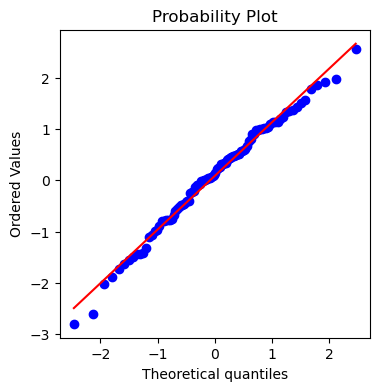

In [21]:
# Crear una figura y un eje (subgr√°fico) utilizando Matplotlib con un tama√±o de 4x4 pulgadas.
fig, ax = plt.subplots(figsize=(4, 4))

# Generar una muestra de 100 valores aleatorios de una distribuci√≥n normal est√°ndar.
norm_sample = stats.norm.rvs(size=100)

# Crear un gr√°fico de probabilidad (probability plot) utilizando la muestra generada y el eje especificado.
stats.probplot(norm_sample, plot=ax)

**Figura 2-11**. Gr√°fico QQ de una muestra de 100 valores extra√≠dos de una distribuci√≥n normal est√°ndar

### Ejemplo de Distribuci√≥n Normal Est√°ndar y Gr√°fico QQ en Python:

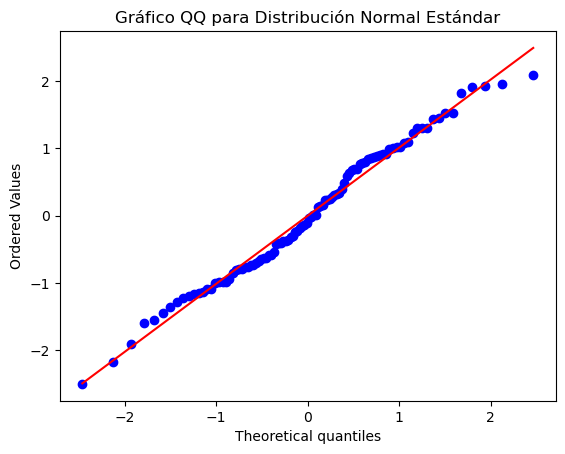

In [22]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generar una muestra de 100 valores de una distribuci√≥n normal
np.random.seed(123)  # Para reproducibilidad
sample_data = np.random.normal(size=100)

# Calcular z-scores (estandarizar la muestra)
z_scores = (sample_data - np.mean(sample_data)) / np.std(sample_data)

# Crear un gr√°fico QQ
stats.probplot(z_scores, dist="norm", plot=plt)

# Mostrar el gr√°fico
plt.title("Gr√°fico QQ para Distribuci√≥n Normal Est√°ndar")
plt.show()

**Explicaci√≥n:**
1. **Generaci√≥n de la Muestra:**
   - Se genera una muestra de 100 valores aleatorios a partir de una distribuci√≥n normal utilizando `numpy.random.normal`.

2. **Estandarizaci√≥n (C√°lculo de Z-scores):**
   - Se calculan los z-scores (desviaciones est√°ndar respecto a la media) para cada valor en la muestra.

3. **Creaci√≥n del Gr√°fico QQ:**
   - Se utiliza `scipy.stats.probplot` para crear el gr√°fico QQ.
   - El argumento `dist="norm"` especifica que estamos comparando con una distribuci√≥n normal est√°ndar.

4. **Visualizaci√≥n del Gr√°fico:**
   - Se muestra el gr√°fico QQ que permite visualizar la proximidad de la muestra a la distribuci√≥n normal est√°ndar.

Este ejemplo en Python ilustra c√≥mo generar una muestra normalizada (z-scores) y crear un gr√°fico QQ para evaluar visualmente la normalidad de la muestra en comparaci√≥n con una distribuci√≥n normal est√°ndar. Si los puntos en el gr√°fico siguen la l√≠nea diagonal, indica una buena aproximaci√≥n a la normalidad.

**Nota:**

La conversi√≥n de datos a $z-scores$ (es decir, estandarizar o normalizar los datos) no hace que los datos sigan una distribuci√≥n normal. Simplemente coloca los datos en la misma escala que la distribuci√≥n normal est√°ndar, a menudo con fines de comparaci√≥n.

### Ideas Clave
* La distribuci√≥n normal fue esencial para el desarrollo hist√≥rico de la estad√≠stica, ya que permiti√≥ la aproximaci√≥n matem√°tica de la incertidumbre y la variabilidad.
* Aunque los datos sin procesar no suelen seguir una distribuci√≥n normal, los errores a menudo s√≠ lo hacen, al igual que los promedios y totales en muestras grandes.
* Para convertir datos a z-scores, restas la media de los datos y divides por la desviaci√≥n est√°ndar; luego puedes comparar los datos con una distribuci√≥n normal.

# Distribuciones de Cola Larga
A pesar de la importancia hist√≥rica de la distribuci√≥n normal en estad√≠sticas y en contraste con lo que sugiere el nombre, los datos generalmente no siguen una distribuci√≥n normal.

### Ejemplo de Distribuciones de Cola Larga:

En estad√≠sticas y ciencia de datos, a menudo encontramos distribuciones que exhiben colas largas o "heavy tails". Un ejemplo cl√°sico de esto es la distribuci√≥n de Pareto, que modela fen√≥menos donde la mayor√≠a de los eventos son raros, pero los eventos extremadamente raros pueden tener un impacto significativo. Veamos c√≥mo podr√≠amos generar y visualizar una distribuci√≥n de Pareto:

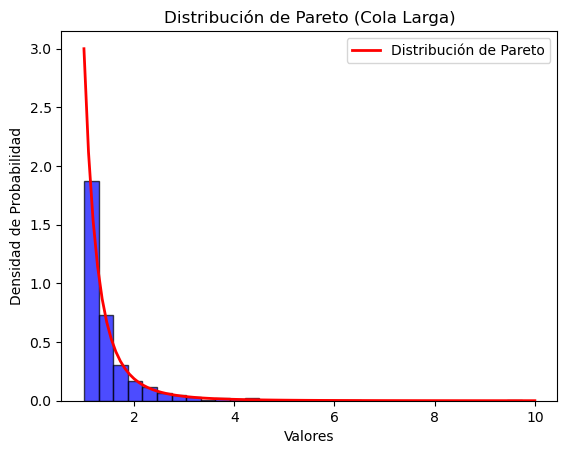

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Par√°metros de la distribuci√≥n de Pareto
shape = 3.0  # Par√°metro de forma (alpha)
scale = 1.0  # Par√°metro de escala (xm)

# Generar datos de una distribuci√≥n de Pareto
data = pareto.rvs(shape, scale=scale, size=1000, random_state=123)

# Visualizar el histograma de los datos
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# Trazar la funci√≥n de densidad de probabilidad de Pareto
x = np.linspace(1, 10, 100)
pdf = pareto.pdf(x, shape, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Distribuci√≥n de Pareto')

# Ajustar la apariencia del gr√°fico
plt.title('Distribuci√≥n de Pareto (Cola Larga)')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Mostrar el gr√°fico
plt.show()

**Explicaci√≥n:**
1. **Par√°metros de la Distribuci√≥n de Pareto:**
   - `shape`: Par√°metro de forma (alpha) que determina la inclinaci√≥n de la cola larga.
   - `scale`: Par√°metro de escala (xm) que establece el valor m√≠nimo de la distribuci√≥n.

2. **Generaci√≥n de Datos de Pareto:**
   - Se generan 1000 datos de una distribuci√≥n de Pareto utilizando `scipy.stats.pareto.rvs`.

3. **Visualizaci√≥n del Histograma y PDF de Pareto:**
   - Se visualiza el histograma de los datos y se superpone la funci√≥n de densidad de probabilidad (PDF) de la distribuci√≥n de Pareto.

4. **Ajuste del Gr√°fico:**
   - Se ajustan etiquetas y t√≠tulo del gr√°fico para una mejor comprensi√≥n.

Este ejemplo ilustra c√≥mo generar y visualizar una distribuci√≥n de Pareto, que es un ejemplo com√∫n de una distribuci√≥n con colas largas. En este tipo de distribuciones, los eventos extremos son m√°s probables de lo que sugerir√≠a una distribuci√≥n normal.

### T√©rminos Clave para Distribuciones de Cola Larga

##### Cola
* La porci√≥n larga y estrecha de una distribuci√≥n de frecuencia, donde ocurren valores relativamente extremos con baja frecuencia.

##### Asimetr√≠a
* Cuando una cola de una distribuci√≥n es m√°s larga que la otra.

Si bien la distribuci√≥n normal a menudo es apropiada y √∫til en lo que respecta a la distribuci√≥n de errores y estad√≠sticas de muestra, generalmente no caracteriza la distribuci√≥n de datos sin procesar. A veces, la distribuci√≥n es altamente sesgada (asim√©trica), como en el caso de los datos de ingresos; o la distribuci√≥n puede ser discreta, como en el caso de datos binomiales. Tanto las distribuciones sim√©tricas como asim√©tricas pueden tener colas largas. Las colas de una distribuci√≥n corresponden a los valores extremos (peque√±os y grandes). Las colas largas, y la protecci√≥n contra ellas, son ampliamente reconocidas en el trabajo pr√°ctico. Nassim Taleb ha propuesto la teor√≠a del cisne negro, que predice que eventos an√≥malos, como un colapso del mercado de valores, son mucho m√°s probables de lo que se predice mediante la distribuci√≥n normal.
Un buen ejemplo para ilustrar la naturaleza de colas largas de los datos son los rendimientos burs√°tiles. La Figura 2-12 muestra el gr√°fico QQ para los rendimientos burs√°tiles diarios de Netflix (NFLX). Esto se genera en R mediante:

    nflx <- sp500_px[,'NFLX']
        nflx <- diff(log(nflx[nflx>0]))
        qqnorm(nflx)
        abline(a=0, b=1, col='grey')


El c√≥digo Python correspondiente es:

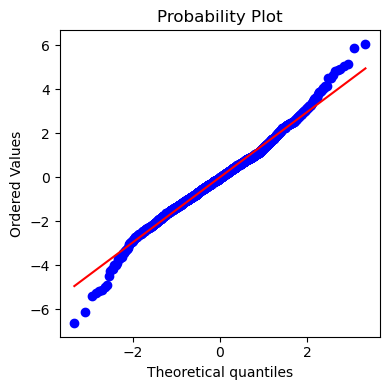

In [25]:
# Leer datos del √≠ndice S&P 500 desde un archivo CSV (SP500_DATA_CSV) usando pandas.
sp500_px = pd.read_csv(SP500_DATA_CSV)

# Seleccionar la columna correspondiente a los precios de las acciones de Netflix (NFLX).
nflx = sp500_px.NFLX

# Calcular los rendimientos logar√≠tmicos diarios de Netflix y eliminar los valores no positivos.
nflx = np.diff(np.log(nflx[nflx > 0]))

# Crear una figura y un eje (subgr√°fico) utilizando Matplotlib con un tama√±o de 4x4 pulgadas.
fig, ax = plt.subplots(figsize=(4, 4))

# Crear un gr√°fico de probabilidad (probability plot) utilizando los rendimientos logar√≠tmicos diarios de Netflix y el eje especificado.
stats.probplot(nflx, plot=ax)

# Ajustar los m√°rgenes para una presentaci√≥n m√°s compacta.
plt.tight_layout()

# Mostrar la igura.
plt.show()


((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (1.4823778663727092, 0.0015561067366313861, 0.9941828221936322))

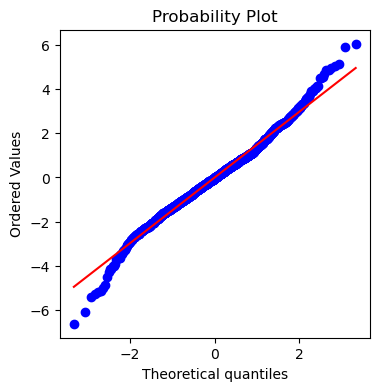

In [26]:
# Seleccionar la columna correspondiente a los precios de las acciones de Netflix (NFLX) desde el DataFrame sp500_px.
nflx = sp500_px.NFLX

# Calcular los rendimientos logar√≠tmicos diarios de Netflix y eliminar los valores no positivos.
nflx = np.diff(np.log(nflx[nflx > 0]))

# Crear una figura y un eje (subgr√°fico) utilizando Matplotlib con un tama√±o de 4x4 pulgadas.
fig, ax = plt.subplots(figsize=(4, 4))

# Crear un gr√°fico de probabilidad (probability plot) utilizando los rendimientos logar√≠tmicos diarios de Netflix y el eje especificado.
stats.probplot(nflx, plot=ax)

**Figura 2-12**. Gr√°fico QQ de los rendimientos para Netflix (NFLX)

En contraste con la Figura 2-11, los puntos est√°n bastante por debajo de la l√≠nea para valores bajos y bastante por encima de la l√≠nea para valores altos, lo que indica que los datos no siguen una distribuci√≥n normal. Esto significa que es mucho m√°s probable observar valores extremos de lo que se esperar√≠a si los datos tuvieran una distribuci√≥n normal. La Figura 2-12 muestra otro fen√≥meno com√∫n: los puntos est√°n cerca de la l√≠nea para los datos dentro de una desviaci√≥n est√°ndar de la media. Tukey se refiere a este fen√≥meno como datos "normales en el medio" pero con colas mucho m√°s largas (ver [Tukey-1987]).

**Nota:**

Existe mucha literatura estad√≠stica sobre la tarea de ajustar distribuciones estad√≠sticas a datos observados. Ten cuidado con un enfoque excesivamente centrado en los datos para este trabajo, que es tanto arte como ciencia. Los datos son variables y a menudo, a simple vista, son consistentes con m√°s de una forma y tipo de distribuci√≥n. Por lo general, es necesario aplicar conocimientos de dominio y estad√≠sticos para determinar qu√© tipo de distribuci√≥n es apropiado para modelar una situaci√≥n dada. Por ejemplo, podr√≠amos tener datos sobre el nivel de tr√°fico en Internet en un servidor durante muchos per√≠odos consecutivos de cinco segundos. Es √∫til saber que la mejor distribuci√≥n para modelar "eventos por per√≠odo de tiempo" es la de Poisson (ver "Distribuciones de Poisson" en la p√°gina 83).

### Ideas Clave
* La mayor√≠a de los datos no sigue una distribuci√≥n normal.
* Suponer una distribuci√≥n normal puede llevar a una subestimaci√≥n de eventos extremos ("cisnes negros").

### Lecturas Adicionales
* "El Cisne Negro", 2da ed., de Nassim Nicholas Taleb (Random House, 2010)
* "Handbook of Statistical Distributions with Applications", 2da ed., de K. Krishnamoorthy (Chapman & Hall/CRC Press, 2016)

# Distribuci√≥n t de Student
La $Distribuci√≥n\ t$ es una distribuci√≥n con forma normal, excepto que es un poco m√°s gruesa y larga en las colas. Se utiliza ampliamente para representar distribuciones de estad√≠sticas de muestra. Las distribuciones de medias de muestra suelen tener forma de distribuci√≥n t, y existe una familia de distribuciones t que difieren seg√∫n el tama√±o de la muestra. A medida que aumenta el tama√±o de la muestra, la distribuci√≥n t se vuelve m√°s parecida a una distribuci√≥n normal.

### Ejemplo de Distribuci√≥n t de Student:

La distribuci√≥n t de Student se utiliza com√∫nmente en inferencia estad√≠stica cuando se trabaja con muestras peque√±as. Veamos c√≥mo podr√≠amos generar y visualizar una distribuci√≥n t con diferentes grados de libertad:

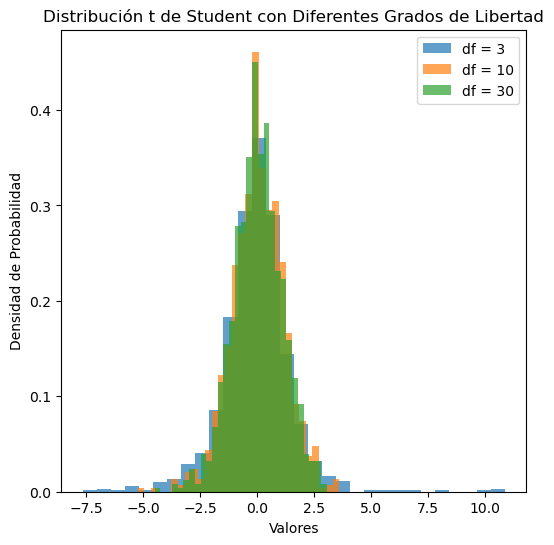

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Par√°metros de la distribuci√≥n t
degrees_of_freedom = [3, 10, 30]  # Diferentes grados de libertad

# Generar datos de una distribuci√≥n t para diferentes grados de libertad
data = [t.rvs(df, size=1000, random_state=123) for df in degrees_of_freedom]

# Visualizar histogramas de las distribuciones t
plt.figure(figsize=(6, 6))

for i, df in enumerate(degrees_of_freedom):
    plt.hist(data[i], bins=30, density=True, alpha=0.7, label=f'df = {df}')

# Ajustar la apariencia del gr√°fico
plt.title('Distribuci√≥n t de Student con Diferentes Grados de Libertad')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Mostrar el gr√°fico
plt.show()


**Explicaci√≥n:**
1. **Par√°metros de la Distribuci√≥n t:**
   - `degrees_of_freedom`: Lista de diferentes grados de libertad para la distribuci√≥n t.

2. **Generaci√≥n de Datos de la Distribuci√≥n t:**
   - Se generan 1000 datos para cada distribuci√≥n t con diferentes grados de libertad.

3. **Visualizaci√≥n de Histogramas:**
   - Se visualizan los histogramas de las distribuciones t para diferentes grados de libertad en el mismo gr√°fico.

4. **Ajuste del Gr√°fico:**
   - Se ajustan etiquetas y t√≠tulo del gr√°fico para una mejor comprensi√≥n.

Este ejemplo ilustra c√≥mo generar y visualizar la distribuci√≥n t de Student con diferentes grados de libertad. Como se menciona en la descripci√≥n, a medida que aumenta el tama√±o de la muestra (grados de libertad), la distribuci√≥n t se aproxima a una distribuci√≥n normal est√°ndar.

### T√©rminos Clave para la Distribuci√≥n t de Student

##### $n$
* Tama√±o de la muestra.

##### Grados de libertad
* Un par√°metro que permite que la distribuci√≥n t se ajuste a diferentes tama√±os de muestra, estad√≠sticas y n√∫meros de grupos.

La distribuci√≥n t se llama a menudo t de Student porque fue publicada en 1908 en Biometrika por W. S. Gosset bajo el nombre de "Student". El empleador de Gosset, la cervecer√≠a Guinness, no quer√≠a que los competidores supieran que estaba utilizando m√©todos estad√≠sticos, por lo que insisti√≥ en que Gosset no usara su nombre en el art√≠culo.

Gosset quer√≠a responder a la pregunta "¬øCu√°l es la distribuci√≥n muestral de la media de una muestra extra√≠da de una poblaci√≥n m√°s grande?" Comenz√≥ con un experimento de remuestreo, extrayendo muestras aleatorias de 4 de un conjunto de datos de 3,000 medidas de la altura y longitud del dedo medio izquierdo de criminales. (En esa √©poca, la eugenesia generaba mucho inter√©s en los datos sobre criminales y en descubrir correlaciones entre las tendencias criminales y atributos f√≠sicos o psicol√≥gicos). Gosset traz√≥ los resultados estandarizados (los z-scores) en el eje x y la frecuencia en el eje y. Por separado, hab√≠a derivado una funci√≥n, ahora conocida como la t de Student, y ajust√≥ esta funci√≥n sobre los resultados de la muestra, trazando la comparaci√≥n (ver Figura 2-13).

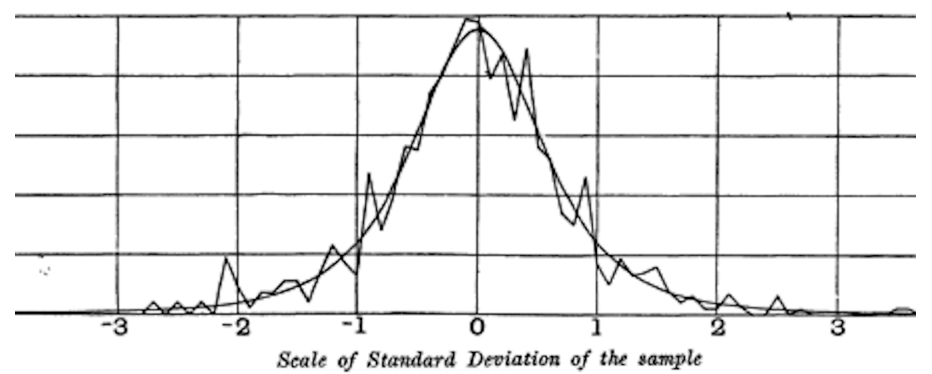

**Figura 2-13**. Resultados del experimento de remuestreo de Gosset y curva t ajustada (de su art√≠culo de Biometrika de 1908)

Se pueden comparar varias estad√≠sticas diferentes, despu√©s de estandarizaci√≥n, con la distribuci√≥n t para estimar intervalos de confianza a la luz de la variaci√≥n del muestreo. Considere una muestra de tama√±o $n$ para la cual se ha calculado la media muestral $\bar{x}$. Si $s$ es la desviaci√≥n est√°ndar de la muestra, un intervalo de confianza del 90% alrededor de la media muestral se da por:

$$ \bar{x} \pm t_{n-1 (0.05)} \cdot \frac{s}{\sqrt{n}} $$

donde $ t_{n-1 (0.05)} $ es el valor del $estad√≠stico\ t$, con $(n-1)$ grados de libertad (ver "Grados de Libertad" en la p√°gina 116), que "recorta" el 5% de la distribuci√≥n t en ambos extremos. La distribuci√≥n t se ha utilizado como referencia para la distribuci√≥n de una media muestral, la diferencia entre dos medias muestrales, par√°metros de regresi√≥n y otras estad√≠sticas.

Si la potencia inform√°tica hubiera estado ampliamente disponible en 1908, es probable que las estad√≠sticas se hubieran basado mucho m√°s en m√©todos de remuestreo intensivos computacionalmente desde el principio. Al carecer de computadoras, los estad√≠sticos recurrieron a las matem√°ticas y a funciones como la distribuci√≥n t para aproximar distribuciones de muestreo. La potencia inform√°tica permiti√≥ experimentos pr√°cticos de remuestreo en la d√©cada de 1980, pero para entonces, el uso de la distribuci√≥n t y distribuciones similares ya se hab√≠a arraigado profundamente en libros de texto y software.

La precisi√≥n de la distribuci√≥n t al representar el comportamiento de una estad√≠stica de muestra requiere que la distribuci√≥n de esa estad√≠stica para esa muestra tenga forma de una distribuci√≥n normal. Resulta que las estad√≠sticas de muestra a menudo siguen una distribuci√≥n normal, incluso cuando los datos de la poblaci√≥n subyacente no lo hacen (un hecho que llev√≥ a la aplicaci√≥n generalizada de la distribuci√≥n t). Esto nos lleva de nuevo al fen√≥meno conocido como el teorema del l√≠mite central (ver "Teorema del L√≠mite Central" en la p√°gina 60).

**Nota:**

¬øQu√© necesitan saber los cient√≠ficos de datos sobre la distribuci√≥n t y el teorema del l√≠mite central? No mucho. La distribuci√≥n t se utiliza en la inferencia estad√≠stica cl√°sica, pero no es tan fundamental para los prop√≥sitos de la ciencia de datos. Comprender y cuantificar la incertidumbre y la variaci√≥n son importantes para los cient√≠ficos de datos, pero el muestreo emp√≠rico bootstrap puede responder a la mayor√≠a de las preguntas sobre el error de muestreo. Sin embargo, los cient√≠ficos de datos encontrar√°n rutinariamente estad√≠sticas t en la salida de software estad√≠stico y procedimientos estad√≠sticos en R, por ejemplo, en pruebas A/B y regresiones, por lo que es √∫til estar familiarizado con su prop√≥sito.

### Ideas Clave
* La distribuci√≥n t es en realidad una familia de distribuciones que se asemejan a la distribuci√≥n normal pero con colas m√°s gruesas.
* La distribuci√≥n t se utiliza ampliamente como base de referencia para la distribuci√≥n de medias muestrales, diferencias entre dos medias muestrales, par√°metros de regresi√≥n y m√°s.

### Lecturas Adicionales
* El art√≠culo original de W.S. Gosset tal como se public√≥ en Biometrika en 1908 est√° disponible en PDF.
* Un tratamiento est√°ndar de la distribuci√≥n t se puede encontrar en el recurso en l√≠nea de David Lane.

# Distribuci√≥n Binomial
Resultados de s√≠/no (binomiales) son fundamentales en la anal√≠tica, ya que a menudo son el resultado de una decisi√≥n u otro proceso; comprar/no comprar, hacer clic/no hacer clic, sobrevivir/morir, entre otros. Central para entender la distribuci√≥n binomial es la idea de un conjunto de ensayos, cada ensayo con dos posibles resultados con probabilidades definidas.
Por ejemplo, lanzar una moneda 10 veces es un experimento binomial con 10 ensayos, cada ensayo con dos posibles resultados (cara o cruz); ver Figura 2-14. Tales resultados de s√≠/no o de 0/1 se denominan resultados binarios, y no es necesario que tengan probabilidades de 50/50. Cualquier conjunto de probabilidades que sume 1.0 es posible. En estad√≠sticas, es convencional llamar al resultado "1" el resultado de √©xito; tambi√©n es pr√°ctica com√∫n asignar "1" al resultado m√°s raro. El uso del t√©rmino √©xito no implica que el resultado sea deseable o beneficioso, pero tiende a indicar el resultado de inter√©s. Por ejemplo, los incumplimientos de pr√©stamos o transacciones fraudulentas son eventos relativamente poco comunes que podr√≠amos estar interesados en predecir, por lo que se denominan "1" o "√©xitos".

### Ejemplo de Distribuci√≥n Binomial:

Supongamos que estamos realizando un experimento donde lanzamos un dado justo (con seis caras numeradas del 1 al 6) 5 veces y queremos calcular la probabilidad de obtener exactamente 3 veces el n√∫mero 4.

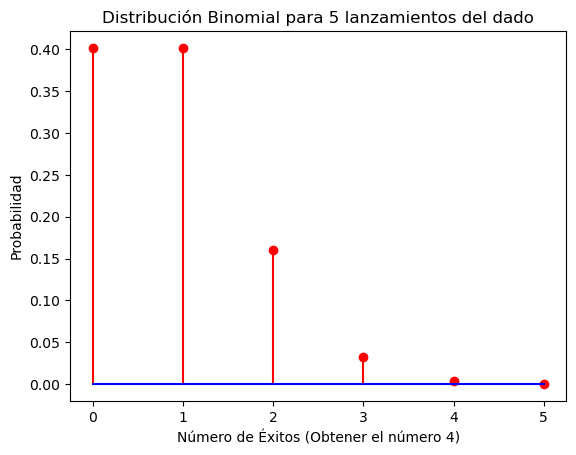

La probabilidad de obtener exactamente 3 veces el n√∫mero 4 en 5 lanzamientos es: 0.0322


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Par√°metros de la distribuci√≥n binomial
num_trials = 5  # N√∫mero de ensayos (lanzamientos del dado)
probability_of_success = 1/6  # Probabilidad de obtener el n√∫mero 4 en un lanzamiento

# N√∫mero de √©xitos deseados
desired_successes = 3

# Calcular la probabilidad de obtener exactamente 3 veces el n√∫mero 4
probability = binom.pmf(desired_successes, num_trials, probability_of_success)

# Visualizar la distribuci√≥n binomial para el experimento
x = np.arange(0, num_trials + 1)
y = binom.pmf(x, num_trials, probability_of_success)

plt.stem(x, y, basefmt='b-', linefmt='r-', markerfmt='ro')
plt.title('Distribuci√≥n Binomial para 5 lanzamientos del dado')
plt.xlabel('N√∫mero de √âxitos (Obtener el n√∫mero 4)')
plt.ylabel('Probabilidad')
plt.show()

# Mostrar la probabilidad calculada
print(f'La probabilidad de obtener exactamente 3 veces el n√∫mero 4 en 5 lanzamientos es: {probability:.4f}')

**Explicaci√≥n:**
1. **Par√°metros de la Distribuci√≥n Binomial:**
   - `num_trials`: N√∫mero de ensayos (lanzamientos del dado).
   - `probability_of_success`: Probabilidad de obtener el n√∫mero 4 en un lanzamiento del dado.

2. **N√∫mero de √âxitos Deseados:**
   - `desired_successes`: N√∫mero de veces que queremos obtener el n√∫mero 4.

3. **C√°lculo de Probabilidad:**
   - Se utiliza la funci√≥n de masa de probabilidad (`pmf`) de la distribuci√≥n binomial para calcular la probabilidad de obtener exactamente 3 veces el n√∫mero 4 en 5 lanzamientos.

4. **Visualizaci√≥n de la Distribuci√≥n Binomial:**
   - Se visualiza la distribuci√≥n binomial para el experimento de lanzar un dado justo 5 veces.

Este ejemplo ilustra c√≥mo calcular y visualizar la distribuci√≥n binomial para un experimento de lanzar un dado justo 5 veces y calcular la probabilidad de obtener exactamente 3 veces el n√∫mero 4.

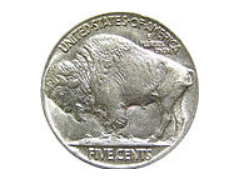

**Figura 2-14**. El reverso de una moneda buffalo nickel

### T√©rminos Clave para la Distribuci√≥n Binomial

##### Prueba
* Un evento con un resultado discreto (por ejemplo, lanzar una moneda).

##### √âxito
* El resultado de inter√©s para una prueba.
* Sin√≥nimo "1" (en contraposici√≥n a "0").

##### Binomial
* Que tiene dos resultados.
* Sin√≥nimos s√≠/no, 0/1, binario.

##### Prueba Binomial
* Una prueba con dos resultados.
* Sin√≥nimo Prueba de Bernoulli.

##### Distribuci√≥n Binomial
* Distribuci√≥n del n√∫mero de √©xitos en x pruebas.
* Sin√≥nimo Distribuci√≥n de Bernoulli.

La distribuci√≥n binomial es la distribuci√≥n de frecuencia del n√∫mero de √©xitos (x) en un n√∫mero dado de pruebas (n) con una probabilidad especificada (p) de √©xito en cada prueba. Existe una familia de distribuciones binomiales, dependiendo de los valores de n y p. La distribuci√≥n binomial responder√≠a a una pregunta como:
Si la probabilidad de que un clic se convierta en una venta es 0.02, ¬øcu√°l es la probabilidad de observar 0 ventas en 200 clics?
La funci√≥n `dbinom` en R calcula las probabilidades binomiales. Por ejemplo:

    dbinom(x=2, size=5, p=0.1)

devolver√≠a 0.0729, la probabilidad de observar exactamente x = 2 √©xitos en tama√±o = 5 pruebas, donde la probabilidad de √©xito para cada prueba es p = 0.1. Para nuestro ejemplo anterior, usamos x = 0, tama√±o = 200 y p = 0.02. Con estos argumentos, `dbinom` devuelve una probabilidad de 0.0176.
A menudo, estamos interesados en determinar la probabilidad de x o menos √©xitos en n pruebas. En este caso, utilizamos la funci√≥n `pbinom`:

pbinom(2, 5, 0.1)

Esto devolver√≠a 0.9914, la probabilidad de observar dos o menos √©xitos en cinco pruebas, donde la probabilidad de √©xito para cada prueba es 0.1.
El m√≥dulo `scipy.stats` implementa una amplia variedad de distribuciones estad√≠sticas. Para la distribuci√≥n binomial, utiliza las funciones `stats.binom.pmf` y `stats.binom.cdf`:

In [30]:
# Calcular y imprimir la probabilidad de obtener exactamente 2 √©xitos en 5 ensayos,
# con una probabilidad de √©xito del 10%, utilizando la funci√≥n de masa de probabilidad (PMF)
# de la distribuci√≥n binomial proporcionada por SciPy.

print(stats.binom.pmf(2, n=5, p=0.1))

0.07289999999999992


In [31]:
# Calcular y imprimir la probabilidad acumulativa de obtener hasta 2 √©xitos en 5 ensayos,
# con una probabilidad de √©xito del 10%, utilizando la funci√≥n de distribuci√≥n acumulativa (CDF)
# de la distribuci√≥n binomial proporcionada por SciPy.

print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


La media de una distribuci√≥n binomial es $n$ $√ó$ $p$; tambi√©n puedes pensar en esto como el n√∫mero esperado de √©xitos en n pruebas, con una probabilidad de √©xito $=$ $p$.

La varianza e$s$ $n$ $√ó$ $p$ $√ó (1 ‚àí $p). Con un n√∫mero suficientemente grande de pruebas (especialmente cuando p se acerca a 0.50), la distribuci√≥n binomial es virtualmente indistinguible de la distribuci√≥n normal. De hecho, calcular probabilidades binomiales con tama√±os de muestra grandes es computacionalmente exigente, y la mayor√≠a de los procedimientos estad√≠sticos utilizan la distribuci√≥n normal, con la media y la varianza, como una aproximaci√≥n.

### Ideas Clave
* Los resultados binomiales son importantes de modelar, ya que representan, entre otras cosas, decisiones fundamentales (comprar o no comprar, hacer clic o no hacer clic, sobrevivir o morir, etc.).
* Una prueba binomial es un experimento con dos resultados posibles: uno con probabilidad p y el otro con probabilidad 1 - p.
* Con un n grande y siempre que p no est√© demasiado cerca de 0 o 1, la distribuci√≥n binomial puede aproximarse a la distribuci√≥n normal.

### Lecturas Adicionales
* Lee sobre el "quincunx", un dispositivo de simulaci√≥n similar a un pinball que ilustra la distribuci√≥n binomial.
* La distribuci√≥n binomial es fundamental en estad√≠sticas introductorias, y todos los textos introductorios de estad√≠sticas tendr√°n uno o dos cap√≠tulos al respecto.

# Distribuci√≥n Chi-Cuadrado
Una idea importante en estad√≠sticas es la desviaci√≥n de la expectativa, especialmente en lo que respecta a recuentos de categor√≠as. La expectativa se define de manera laxa como "nada inusual o notable en los datos" (por ejemplo, ninguna correlaci√≥n entre variables o patrones predecibles). Esto tambi√©n se denomina la "hip√≥tesis nula" o "modelo nulo" (consulte "La Hip√≥tesis Nula" en la p√°gina 94).

Por ejemplo, podr√≠as querer probar si una variable (digamos, una variable de fila que representa el g√©nero) es independiente de otra (digamos, una variable de columna que representa "fue ascendido en el trabajo"), y tienes recuentos del n√∫mero en cada una de las celdas de la tabla de datos. El estad√≠stico que mide en qu√© medida los resultados se desv√≠an de la expectativa nula de independencia es el estad√≠stico chi-cuadrado. Es la diferencia entre los valores observados y esperados, dividida por la ra√≠z cuadrada del valor esperado, elevada al cuadrado, y luego sumada en todas las categor√≠as. Este proceso estandariza el estad√≠stico para que pueda compararse con una distribuci√≥n de referencia. Una forma m√°s general de expresar esto es se√±alar que el estad√≠stico chi-cuadrado es una medida de en qu√© medida un conjunto de valores observados "se ajusta" a una distribuci√≥n especificada (una prueba de bondad de ajuste). Es √∫til para determinar si m√∫ltiples tratamientos (una prueba "A/B/C...") difieren entre s√≠ en sus efectos.

La distribuci√≥n chi-cuadrado es la distribuci√≥n de este estad√≠stico bajo repeticiones de muestreos de extracciones del modelo nulo; consulte "Prueba de Chi-Cuadrado" en la p√°gina 124 para obtener un algoritmo detallado y la f√≥rmula chi-cuadrado para una tabla de datos. Un valor bajo de chi-cuadrado para un conjunto de recuentos indica que siguen de cerca la distribuci√≥n esperada. Un chi-cuadrado alto indica que difieren notablemente de lo que se espera. Hay una variedad de distribuciones chi-cuadrado asociadas con diferentes grados de libertad (por ejemplo, el n√∫mero de observaciones; consulte "Grados de Libertad" en la p√°gina 116).

### Ejemplo de Distribuci√≥n Chi-Cuadrado:

Supongamos que tienes una tabla de contingencia que representa el n√∫mero de empleados promovidos en funci√≥n de su g√©nero. Quieres probar si hay una asociaci√≥n entre el g√©nero y las promociones utilizando la prueba de chi-cuadrado. Aqu√≠ est√° un ejemplo simple en Python:

In [33]:
import numpy as np
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia (ejemplo ficticio)
data = np.array([[50, 30], [20, 40]])  # Filas representan g√©nero (Hombre, Mujer), columnas representan promoci√≥n (S√≠, No)

# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(data)

# Mostrar resultados
print(f'Estad√≠stico de Chi-Cuadrado: {chi2:.4f}')
print(f'Valor p: {p:.4f}')

# Interpretar los resultados
alpha = 0.05
if p < alpha:
    print("Hay evidencia suficiente para rechazar la hip√≥tesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hip√≥tesis nula.")

Estad√≠stico de Chi-Cuadrado: 10.5292
Valor p: 0.0012
Hay evidencia suficiente para rechazar la hip√≥tesis nula.


Explicaci√≥n:
1. Creaci√≥n de la Tabla de Contingencia:
   - `data`: Una matriz que representa la tabla de contingencia con recuentos de empleados promovidos seg√∫n su g√©nero.

2. Prueba de Chi-Cuadrado:
   - La funci√≥n `chi2_contingency` de `scipy.stats` realiza la prueba de chi-cuadrado en la tabla de contingencia y devuelve el estad√≠stico de chi-cuadrado, el valor p y otras estad√≠sticas.

3. Interpretaci√≥n de los Resultados:
   - El estad√≠stico de chi-cuadrado se compara con un umbral cr√≠tico y el valor p se utiliza para determinar si hay evidencia suficiente para rechazar la hip√≥tesis nula. En este ejemplo, se utiliza un nivel de significancia del 0.05.

Este ejemplo ilustra c√≥mo realizar una prueba de chi-cuadrado para evaluar si hay una asociaci√≥n significativa entre el g√©nero y las promociones en una tabla de contingencia.

### Ejemplo: Dsitribuci√≥n chi-cuadrado

La distribuci√≥n chi-cuadrado se utiliza com√∫nmente en estad√≠stica inferencial, especialmente en pruebas de hip√≥tesis y en la construcci√≥n de intervalos de confianza para la varianza de una poblaci√≥n.

En este ejemplo, generaremos datos desde una distribuci√≥n chi-cuadrado y luego ajustaremos un modelo para estimar los par√°metros. Tambi√©n realizaremos un gr√°fico de la distribuci√≥n y calcularemos la probabilidad acumulativa.

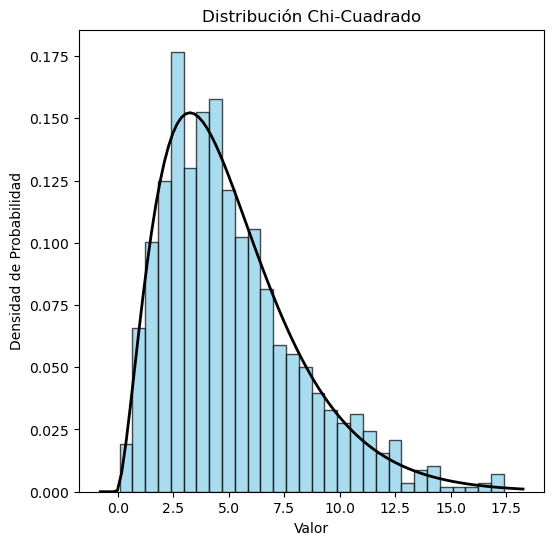

Probabilidad acumulativa para x=10: 0.9248


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Generar datos desde una distribuci√≥n chi-cuadrado
np.random.seed(42)
grados_libertad = 5
datos_chi_cuadrado = np.random.chisquare(df=grados_libertad, size=1000)

# Ajustar una distribuci√≥n chi-cuadrado a los datos
ajuste_parametros = chi2.fit(datos_chi_cuadrado)

# Crear histograma de los datos
plt.figure(figsize=(6, 6))
plt.hist(datos_chi_cuadrado, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# Crear curva de densidad de probabilidad (PDF) de la distribuci√≥n chi-cuadrado ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_ajustada = chi2.pdf(x, *ajuste_parametros)
plt.plot(x, pdf_ajustada, 'k-', linewidth=2)

# Etiquetas y t√≠tulo
plt.title('Distribuci√≥n Chi-Cuadrado')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.show()

# Calcular probabilidad acumulativa (CDF) para un valor espec√≠fico
valor_cdf = 10
prob_acumulativa = chi2.cdf(valor_cdf, df=grados_libertad)
print(f"Probabilidad acumulativa para x={valor_cdf}: {prob_acumulativa:.4f}")


En este ejemplo, generamos 1000 datos desde una distribuci√≥n chi-cuadrado con 5 grados de libertad. Luego, ajustamos una distribuci√≥n chi-cuadrado a los datos y visualizamos la distribuci√≥n resultante junto con un histograma. Adem√°s, calculamos la probabilidad acumulativa para un valor espec√≠fico (en este caso, x=10).

Puedes ajustar el n√∫mero de grados de libertad y otros par√°metros seg√∫n tus necesidades. Este ejemplo ilustra c√≥mo trabajar con la distribuci√≥n chi-cuadrado en Python.

### Ideas Clave
* La distribuci√≥n chi-cuadrado generalmente se ocupa de recuentos de sujetos o elementos que caen en categor√≠as.
* La estad√≠stica chi-cuadrado mide la magnitud de la desviaci√≥n de lo que se esperar√≠a en un modelo nulo.

### Lecturas Adicionales
* La distribuci√≥n chi-cuadrado debe su lugar en la estad√≠stica moderna al gran estad√≠stico Karl Pearson y al nacimiento de las pruebas de hip√≥tesis; lee m√°s al respecto en "The Lady Tasting Tea: How Statistics Revolutionized Science in the Twentieth Century" de David Salsburg (W. H. Freeman, 2001).
* Para una exposici√≥n m√°s detallada, consulta la secci√≥n en este libro sobre la prueba chi-cuadrado ("Chi-Square Test" en la p√°gina 124).

# Distribuci√≥n F

Un procedimiento com√∫n en la experimentaci√≥n cient√≠fica consiste en probar m√∫ltiples tratamientos en grupos diferentes, por ejemplo, diferentes fertilizantes en diferentes bloques de un campo. Esto es similar a la prueba A/B/C mencionada en la distribuci√≥n chi-cuadrado (ver "Distribuci√≥n Chi-cuadrado" en la p√°gina 80), excepto que estamos tratando con valores continuos medidos en lugar de recuentos. En este caso, nos interesa en qu√© medida las diferencias entre las medias de los grupos son mayores de lo que podr√≠amos esperar bajo la variaci√≥n aleatoria normal. El estad√≠stico F mide esto y es la raz√≥n de la variabilidad entre las medias de los grupos a la variabilidad dentro de cada grupo (tambi√©n llamada variabilidad residual). Esta comparaci√≥n se denomina an√°lisis de varianza (ver "ANOVA" en la p√°gina 118). La distribuci√≥n del estad√≠stico F es la distribuci√≥n de frecuencia de todos los valores que se producir√≠an al permutar aleatoriamente datos en los que todas las medias de los grupos son iguales (es decir, un modelo nulo). Hay varias distribuciones F asociadas con diferentes grados de libertad (por ejemplo, n√∫meros de grupos, ver "Grados de libertad" en la p√°gina 116). El c√°lculo de F se ilustra en la secci√≥n sobre ANOVA. El estad√≠stico F tambi√©n se utiliza en la regresi√≥n lineal para comparar la variaci√≥n explicada por el modelo de regresi√≥n con la variaci√≥n general en los datos. Los estad√≠sticos F se producen autom√°ticamente en R y Python como parte de los procedimientos de regresi√≥n y ANOVA.

### Ejemplo de Distribuci√≥n F: An√°lisis de Varianza (ANOVA)

Supongamos que estamos realizando un experimento para comparar los rendimientos de tres diferentes tipos de fertilizantes en el crecimiento de plantas. A continuaci√≥n, se presenta un ejemplo en Python utilizando ANOVA para analizar si hay diferencias significativas entre los rendimientos de los tres grupos:

In [34]:
import numpy as np
from scipy.stats import f_oneway

# Datos ficticios: rendimientos de plantas con tres tipos de fertilizantes
fertilizante1 = np.array([18, 22, 25, 20, 24])
fertilizante2 = np.array([15, 18, 20, 17, 21])
fertilizante3 = np.array([22, 24, 28, 20, 25])

# Realizar el an√°lisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(fertilizante1, fertilizante2, fertilizante3)

# Mostrar resultados
print(f'Estad√≠stico F: {f_statistic:.4f}')
print(f'Valor p: {p_value:.4f}')

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Hay evidencia suficiente para rechazar la hip√≥tesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hip√≥tesis nula.")


Estad√≠stico F: 5.2294
Valor p: 0.0233
Hay evidencia suficiente para rechazar la hip√≥tesis nula.


Explicaci√≥n:
1. Definici√≥n de los Datos:
   - `fertilizante1`, `fertilizante2`, `fertilizante3`: Datos ficticios de rendimientos de plantas para tres tipos diferentes de fertilizantes.

2. An√°lisis de Varianza (ANOVA):
   - La funci√≥n `f_oneway` de `scipy.stats` realiza el an√°lisis de varianza y devuelve el estad√≠stico F y el valor p.

3. Interpretaci√≥n de los Resultados:
   - Se compara el valor p con un umbral de significancia (0.05 en este caso) para determinar si hay evidencia suficiente para rechazar la hip√≥tesis nula de que las medias de los grupos son iguales.

Este ejemplo utiliza ANOVA y la distribuci√≥n F para evaluar si hay diferencias significativas entre los rendimientos de plantas con tres tipos de fertilizantes diferentes.

### Ejemplo: Distribuci√≥n F

La distribuci√≥n F se utiliza com√∫nmente en estad√≠stica para comparar varianzas entre dos muestras.
En este ejemplo, generaremos datos desde una distribuci√≥n F y luego realizaremos un gr√°fico de la distribuci√≥n.

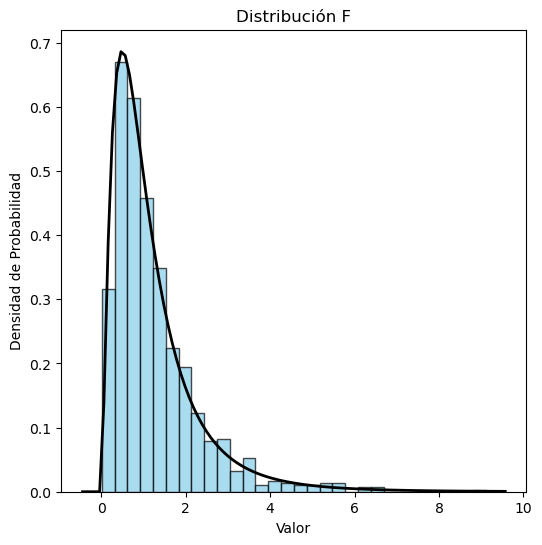

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Generar datos desde una distribuci√≥n F
np.random.seed(42)
grados_libertad_numerador = 5
grados_libertad_denominador = 10
datos_distribucion_f = np.random.f(dfnum=grados_libertad_numerador, dfden=grados_libertad_denominador, size=1000)

# Crear histograma de los datos
plt.figure(figsize=(6, 6))
plt.hist(datos_distribucion_f, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# Crear curva de densidad de probabilidad (PDF) de la distribuci√≥n F
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_distribucion_f = f.pdf(x, dfn=grados_libertad_numerador, dfd=grados_libertad_denominador)
plt.plot(x, pdf_distribucion_f, 'k-', linewidth=2)

# Etiquetas y t√≠tulo
plt.title('Distribuci√≥n F')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.show()


En este c√≥digo, generamos 1000 datos desde una distribuci√≥n F con 5 grados de libertad en el numerador y 10 grados de libertad en el denominador. Luego, creamos un histograma para visualizar la distribuci√≥n de los datos y superponemos una curva de densidad de probabilidad (PDF) de la distribuci√≥n F.

Puedes ajustar el n√∫mero de grados de libertad en el numerador y el denominador seg√∫n tus necesidades. Este ejemplo ilustra c√≥mo trabajar con la distribuci√≥n F en Python.

### Ideas Clave
* La distribuci√≥n F se utiliza en experimentos y modelos lineales que involucran datos medidos.
* El estad√≠stico F compara la variaci√≥n debida a los factores de inter√©s con la variaci√≥n general.

### Lecturas Adicionales
La obra "Introduction to Design and Analysis of Experiments" de George Cobb (Wiley, 2008) contiene una excelente exposici√≥n de la descomposici√≥n de componentes de varianza, lo cual ayuda a comprender ANOVA y el estad√≠stico F.

# Poisson y Distribuciones Relacionadas
Muchos procesos producen eventos de manera aleatoria a una tasa general dada, como visitantes que llegan a un sitio web o autos que llegan a una plaza de peaje (eventos distribuidos en el tiempo); imperfecciones en un metro cuadrado de tela o errores tipogr√°ficos por cada 100 l√≠neas de c√≥digo (eventos distribuidos en el espacio).

### Ejemplo de Distribuci√≥n de Poisson: N√∫mero de Llegadas a un Sitio Web

Supongamos que estamos estudiando el n√∫mero promedio de visitantes que llegan a un sitio web en un intervalo de 10 minutos. Podemos modelar este proceso utilizando la Distribuci√≥n de Poisson. Aqu√≠ hay un ejemplo en Python:

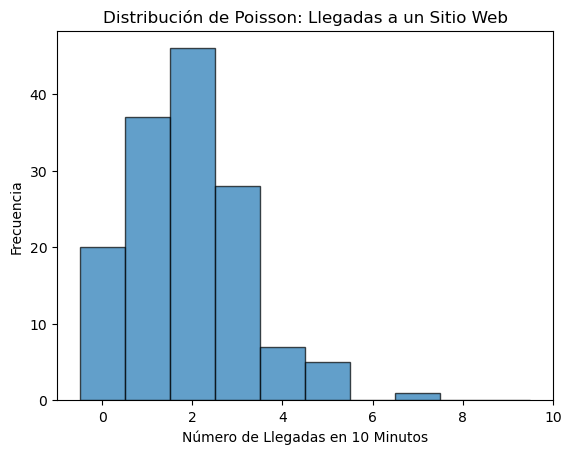

In [35]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Par√°metros del proceso de Poisson
tasa_llegadas = 2  # N√∫mero promedio de llegadas por intervalo de 10 minutos
intervalo_tiempo = 10  # Duraci√≥n del intervalo en minutos

# Generar datos simulados de llegadas en un d√≠a (144 intervalos de 10 minutos)
datos_simulados = np.random.poisson(tasa_llegadas, 144)

# Crear un histograma de los datos simulados
plt.hist(datos_simulados, bins=range(11), align='left', edgecolor='black', alpha=0.7)
plt.xlabel('N√∫mero de Llegadas en 10 Minutos')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de Poisson: Llegadas a un Sitio Web')
plt.show()


Explicaci√≥n:
1. Par√°metros del Proceso de Poisson:
   - `tasa_llegadas`: N√∫mero promedio de llegadas por intervalo de 10 minutos.
   - `intervalo_tiempo`: Duraci√≥n del intervalo en minutos.

2. Generaci√≥n de Datos Simulados:
   - Se utiliza `np.random.poisson` para generar datos simulados de llegadas en un d√≠a (144 intervalos de 10 minutos).

3. Visualizaci√≥n con Histograma:
   - Se crea un histograma para mostrar la distribuci√≥n del n√∫mero de llegadas simuladas.

Este ejemplo simula el n√∫mero de llegadas a un sitio web en intervalos de 10 minutos a lo largo de un d√≠a, utilizando la Distribuci√≥n de Poisson. La forma de la distribuci√≥n se asemejar√° a una distribuci√≥n de Poisson con una tasa media de llegadas dada.

### T√©rminos Clave para Poisson y Distribuciones Relacionadas

##### Lambda
* La tasa (por unidad de tiempo o espacio) a la cual ocurren eventos.

##### Distribuci√≥n de Poisson
* La distribuci√≥n de frecuencia del n√∫mero de eventos en unidades de tiempo o espacio muestreadas.

##### Distribuci√≥n exponencial
* La distribuci√≥n de frecuencia del tiempo o distancia entre un evento y el siguiente evento.

##### Distribuci√≥n de Weibull
* Una versi√≥n generalizada de la distribuci√≥n exponencial en la que se permite que la tasa de eventos cambie con el tiempo.

# Distribuciones de Poisson
A partir de datos agregados previos (por ejemplo, el n√∫mero de infecciones de gripe por a√±o), podemos estimar el n√∫mero promedio de eventos por unidad de tiempo o espacio (por ejemplo, infecciones por d√≠a o por unidad censal). Tambi√©n podr√≠amos querer saber cu√°n diferente podr√≠a ser esto de una unidad de tiempo o espacio a otra. La distribuci√≥n de Poisson nos indica la distribuci√≥n de eventos por unidad de tiempo o espacio cuando muestreamos muchas de estas unidades. Es √∫til al abordar preguntas de encolamiento como "¬øCu√°nta capacidad necesitamos para estar seguros al 95% de procesar completamente el tr√°fico de Internet que llega a un servidor en cualquier per√≠odo de cinco segundos?"

El par√°metro clave en una distribuci√≥n de Poisson es Œª, o lambda. Este es el n√∫mero medio de eventos que ocurre en un intervalo especificado de tiempo o espacio. La varianza para una distribuci√≥n de Poisson tambi√©n es Œª.

Una t√©cnica com√∫n es generar n√∫meros aleatorios a partir de una distribuci√≥n de Poisson como parte de una simulaci√≥n de encolamiento. La funci√≥n rpois en R realiza esto, tomando solo dos argumentos: la cantidad de n√∫meros aleatorios deseados y lambda:

    rpois(100, lambda=2)

La funci√≥n correspondiente en scipy es `stats.poisson.rvs`:

In [36]:
# Generar una muestra de 100 n√∫meros aleatorios utilizando una distribuci√≥n
#de Poisson con par√°metro lambda igual a 2.

stats.poisson.rvs(2, size=100)

array([2, 6, 1, 2, 1, 3, 3, 2, 4, 2, 3, 2, 2, 1, 3, 3, 2, 0, 1, 1, 5, 1,
       3, 2, 3, 4, 3, 3, 2, 3, 2, 2, 5, 4, 1, 2, 3, 2, 2, 0, 3, 2, 3, 2,
       3, 2, 2, 2, 3, 2, 1, 1, 3, 0, 0, 3, 2, 2, 0, 2, 1, 2, 3, 1, 5, 1,
       2, 2, 1, 3, 1, 1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 0, 3, 0, 3, 1, 6, 1,
       2, 1, 1, 4, 1, 2, 3, 0, 1, 1, 1, 3], dtype=int64)

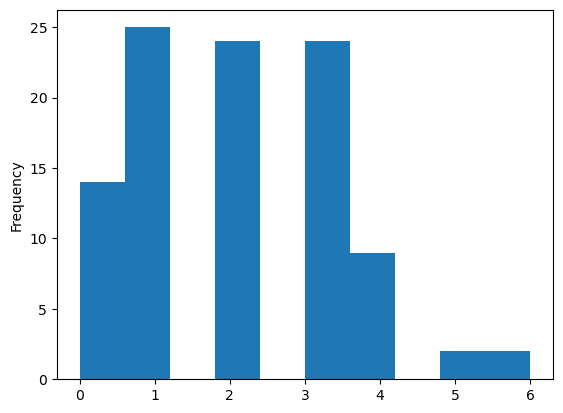

In [37]:
# Generar una muestra de 100 n√∫meros aleatorios a partir de una distribuci√≥n
#de Poisson con par√°metro lambda igual a 2.
sample = stats.poisson.rvs(2, size=100)

# Crear una Serie de pandas a partir de la muestra y visualizar un histograma.
pd.Series(sample).plot.hist()
plt.show()

Este c√≥digo generar√° 100 n√∫meros aleatorios de una distribuci√≥n de Poisson con $Œª=2$. Por ejemplo, si las llamadas de servicio al cliente entrantes tienen un promedio de dos por minuto, este c√≥digo simular√° 100 minutos, devolviendo el n√∫mero de llamadas en cada uno de esos 100 minutos.

# Distribuci√≥n Exponencial
Usando el mismo par√°metro $Œª$ que usamos en la distribuci√≥n de Poisson, tambi√©n podemos modelar la distribuci√≥n del tiempo entre eventos: el tiempo entre visitas a un sitio web o entre la llegada de autos a una caseta de peaje. Tambi√©n se utiliza en ingenier√≠a para modelar el tiempo hasta la falla y en la gesti√≥n de procesos para modelar, por ejemplo, el tiempo requerido por llamada de servicio. El c√≥digo en R para generar n√∫meros aleatorios de una distribuci√≥n exponencial toma dos argumentos: $n$ (la cantidad de n√∫meros a generar) y tasa (el n√∫mero de eventos por per√≠odo de tiempo). Por ejemplo:

    rexp(n=100, rate=0.2)

En la funci√≥n `stats.expon.rvs`, el orden de los argumentos est√° invertido:

In [38]:
# Generar una muestra de 100 n√∫meros aleatorios a partir de una distribuci√≥n
#exponencial con par√°metro de escala 0.2.

stats.expon.rvs(0.2, size=100)

array([1.61243749, 0.84275439, 0.45591155, 1.15873377, 0.24116982,
       0.5947778 , 0.83215932, 0.36011985, 4.37693155, 0.43458041,
       0.33966805, 0.42757193, 1.66560225, 0.75426503, 1.03336589,
       0.22123299, 0.23503803, 0.79027575, 1.89638698, 2.36490252,
       0.29069806, 0.97297663, 2.64449072, 0.69097848, 1.96940616,
       0.34351899, 2.93945557, 1.5920039 , 3.03590163, 1.32891862,
       0.65161994, 2.98354731, 0.52236569, 0.60372541, 1.40667117,
       1.64951663, 2.85077448, 0.42916465, 1.79947785, 1.54149712,
       0.26592034, 0.68975442, 0.53235237, 0.5631105 , 4.27142207,
       1.2293962 , 1.46470049, 3.95577327, 0.6735327 , 1.81868134,
       0.77009974, 2.23664011, 0.39925314, 3.15049464, 0.44688787,
       0.59485238, 1.61137521, 0.70047132, 1.13703281, 0.78801899,
       1.55623059, 0.4591999 , 0.26023631, 0.55657409, 0.84304105,
       0.38394694, 0.63819073, 0.71079732, 0.25910461, 1.07540613,
       2.35713007, 0.36457152, 1.11082573, 1.29284656, 0.74358

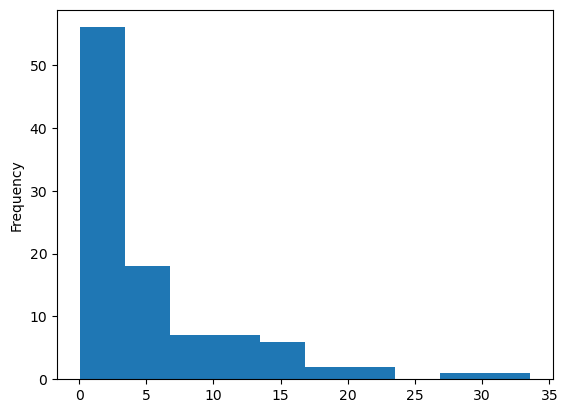

In [39]:
# Generar una muestra de 100 n√∫meros aleatorios a partir de una distribuci√≥n
#exponencial con par√°metro de escala igual a 5.
sample = stats.expon.rvs(scale=5, size=100)

# Crear una Serie de pandas a partir de la muestra y visualizar un histograma.
pd.Series(sample).plot.hist()
plt.show()

Este c√≥digo generar√≠a 100 n√∫meros aleatorios de una distribuci√≥n exponencial, donde el n√∫mero medio de eventos por per√≠odo de tiempo es 0.2. Por lo tanto, podr√≠as usarlo para simular 100 intervalos, en minutos, entre llamadas de servicio, donde la tasa promedio de llamadas entrantes es de 0.2 por minuto.

Una suposici√≥n clave en cualquier estudio de simulaci√≥n para la distribuci√≥n de Poisson o exponencial es que la tasa, $Œª$, permanece constante durante el per√≠odo considerado. Esto rara vez es razonable en un sentido global; por ejemplo, el tr√°fico en carreteras o redes de datos var√≠a seg√∫n la hora del d√≠a y el d√≠a de la semana. Sin embargo, los per√≠odos de tiempo o √°reas de espacio generalmente se pueden dividir en segmentos que son lo suficientemente homog√©neos como para que el an√°lisis o la simulaci√≥n dentro de esos per√≠odos sea v√°lido.

# Estimar la Tasa de Fallos
En muchas aplicaciones, la tasa de eventos, $Œª$, es conocida o se puede estimar a partir de datos previos. Sin embargo, para eventos raros, esto no siempre es as√≠. La falla de motores de aeronaves, por ejemplo, es lo suficientemente rara (afortunadamente) que, para un tipo de motor dado, puede haber pocos datos en los que basar una estimaci√≥n del tiempo entre fallas. Si no hay datos en absoluto, hay poco fundamento para estimar una tasa de eventos. Sin embargo, puedes hacer algunas suposiciones: si no se han observado eventos despu√©s de 20 horas, puedes estar bastante seguro de que la tasa no es de 1 por hora. A trav√©s de la simulaci√≥n o el c√°lculo directo de probabilidades, puedes evaluar diferentes tasas de eventos hipot√©ticas y estimar valores de umbral por debajo de los cuales la tasa es muy improbable que caiga. Si hay algunos datos pero no son suficientes para proporcionar una estimaci√≥n precisa y confiable de la tasa, se puede aplicar una prueba de bondad de ajuste (ver "Prueba de Chi-Cuadrado" en la p√°gina 124) a varias tasas para determinar qu√© tan bien se ajustan a los datos observados.

### Ejemplo de Estimaci√≥n de la Tasa de Fallos: Tiempo entre Fallas de Motores de Aeronaves

Supongamos que estamos interesados en estimar la tasa de fallos (tasa de eventos) para un tipo espec√≠fico de motor de aeronave. No tenemos datos espec√≠ficos del tiempo entre fallas, pero queremos realizar una estimaci√≥n inicial.

**Pasos:**

1. **Suposici√≥n de Tasas Hipot√©ticas:**
   - Supongamos tasas de eventos hipot√©ticas en horas, por ejemplo, 0.1 eventos por hora, 0.01 eventos por hora, etc.

2. **Simulaci√≥n o C√°lculo de Probabilidades:**
   - Simulamos o calculamos la probabilidad de no experimentar un evento durante un per√≠odo espec√≠fico para cada tasa hipot√©tica. Esto podr√≠a hacerse mediante simulaci√≥n de Monte Carlo o utilizando f√≥rmulas de distribuci√≥n exponencial.

3. **Estimaci√≥n de Umbrales:**
   - Establecemos umbrales de tiempo (por ejemplo, 20 horas) y evaluamos la probabilidad de no experimentar un evento hasta ese momento para cada tasa.

4. **Prueba de Bondad de Ajuste (Opcional):**
   - Si hay algunos datos pero no son suficientes, podr√≠amos realizar una prueba de bondad de ajuste para evaluar qu√© tan bien se ajustan varias tasas a los daal de las probabilidades en funci√≥n de la tasa.

Tasa: 0.1 eventos por hora, Probabilidad de no evento hasta 20 horas: 0.1353
Tasa: 0.01 eventos por hora, Probabilidad de no evento hasta 20 horas: 0.8187
Tasa: 0.001 eventos por hora, Probabilidad de no evento hasta 20 horas: 0.9802


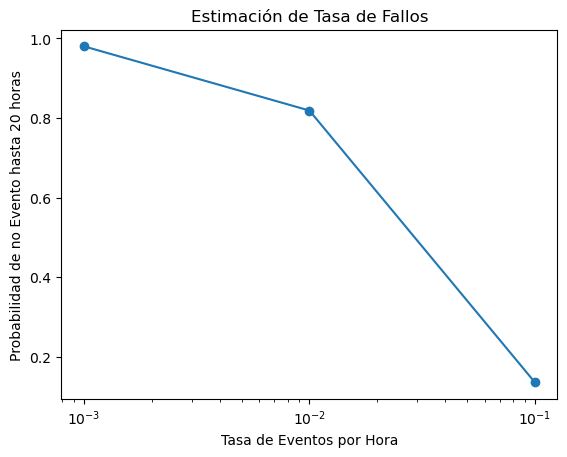

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Suposici√≥n de tasas hipot√©ticas en eventos por hora
tasas_hipoteticas = [0.1, 0.01, 0.001]

# Umbral de tiempo en horas
umbral_tiempo = 20

# Simulaci√≥n de probabilidad de no experimentar un evento hasta el umbral de tiempo
for tasa in tasas_hipoteticas:
    probabilidad_no_evento = np.exp(-tasa * umbral_tiempo)
    print(f"Tasa: {tasa} eventos por hora, Probabilidad de no evento hasta {umbral_tiempo} horas: {probabilidad_no_evento:.4f}")

# Visualizaci√≥n (opcional): Graficar la probabilidad en funci√≥n de la tasa
plt.plot(tasas_hipoteticas, [np.exp(-tasa * umbral_tiempo) for tasa in tasas_hipoteticas], marker='o')
plt.xscale('log')  # Escala logar√≠tmica para mejor visualizaci√≥n en tasas peque√±as
plt.xlabel('Tasa de Eventos por Hora')
plt.ylabel('Probabilidad de no Evento hasta 20 horas')
plt.title('Estimaci√≥n de Tasa de Fallos')
plt.show()


**Explicaci√≥n:**
- Se simulan las probabilidades de no experimentar un evento hasta un umbral de tiempo espec√≠fico para tasas hipot√©ticas.
- Se establece un umbral de 20 horas y se eval√∫an las probabilidades para las tasas hipot√©ticas.
- Se realiza una visualizaci√≥n opcional de las probabilidades en funci√≥n de la tasa.

# Distribuci√≥n Weilbull

En muchos casos, la tasa de eventos no permanece constante con el tiempo. Si el per√≠odo durante el cual cambia es mucho m√°s largo que el intervalo t√≠pico entre eventos, no hay problema; simplemente divides el an√°lisis en los segmentos donde las tasas son relativamente constantes, como se mencion√≥ antes. Sin embargo, si la tasa de eventos cambia a lo largo del tiempo del intervalo, las distribuciones exponencial (o de Poisson) ya no son √∫tiles. Esto es probable que ocurra en fallos mec√°nicos, donde el riesgo de falla aumenta con el tiempo.

La distribuci√≥n Weibull es una extensi√≥n de la distribuci√≥n exponencial en la que se permite que la tasa de eventos cambie, seg√∫n lo especificado por un par√°metro de forma, $Œ≤$. Si $Œ≤> 1$, la probabilidad de un evento aumenta con el tiempo; si $Œ≤ < 1$, la probabilidad disminuye. Dado que la distribuci√≥n Weibull se utiliza en el an√°lisis de tiempo hasta la falla en lugar de la tasa de eventos, el segundo par√°metro se expresa en t√©rminos de la vida caracter√≠stica, en lugar de en t√©rminos de la tasa de eventos por intervalo. El s√≠mbolo utilizado es $Œ∑$, la letra griega eta. Tambi√©n se le llama par√°metro de escala.

Con la distribuci√≥n Weibull, la tarea de estimaci√≥n ahora incluye la estimaci√≥n de ambos par√°metros, $Œ≤$ y $Œ∑$. Se utiliza software para modelar los datos y proporcionar una estimaci√≥n de la distribuci√≥n Weibull que mejor se ajusta.

El c√≥digo en R para generar n√∫meros aleatorios de una distribuci√≥n Weibull toma tres argumentos: $n$ (la cantidad de n√∫meros a generar), forma y escala. Por ejemplo, el siguiente c√≥digo generar√≠a 100 n√∫meros aleatorios (tiempos de vida) de una distribuci√≥n Weibull con forma de 1.5 y vida caracter√≠stica de 5,000:

    rweibull(100, 1.5, 5000)

Para lograr lo mismo en Python, utiliza la funci√≥n `stats.weibull_min.rvs`:

In [42]:
# Generar una muestra de 100 n√∫meros aleatorios a partir de una distribuci√≥n de Weibull con par√°metros shape=1.5 y scale=5000.

stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([ 2572.80201294,  4292.60893612,  1466.08905465,  3454.54268466,
        2253.73269753,  2843.80744177,  6914.96313378,  6913.00506384,
        5705.98864517,  1296.09446604,  2407.48232613,  9937.0050436 ,
        3566.53221377,  4907.74128942,   349.47671369,  4053.15775264,
        5546.72269182,   772.14373283,  1233.20473641,  2977.11596547,
       10146.08028109,  2170.84611057,   390.65868835,  7001.23540999,
        7648.96567541,  4198.1742597 ,  8548.09493259,  1694.40058727,
        2344.70158271,   376.48504867,  4576.5930966 ,  8416.15491628,
        4772.12802688,   956.66624096,  5588.46414139,  5414.29459913,
        1608.21122463,  7305.17203009,  9049.40117699,  3137.55096803,
        2573.56973786,  4503.80725729, 11731.97327607,  5927.71353869,
        6728.14270454,  6445.23789861, 10736.11877543,  7104.8645718 ,
        2302.04881557,  2052.74657985,  2125.64104449,  1927.99706801,
        1896.09817378,  9756.47887824, 10468.59539949,  1034.79033632,
      

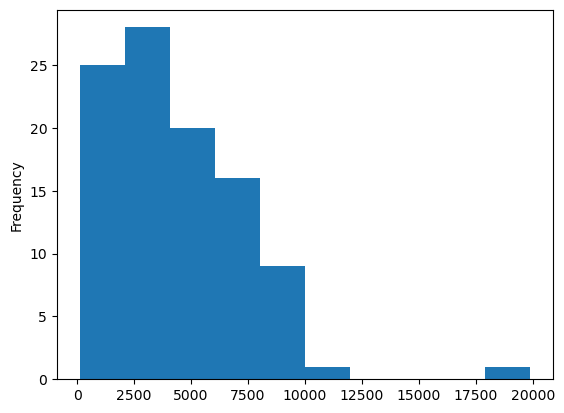

In [43]:
# Generar una muestra de 100 n√∫meros aleatorios a partir de una distribuci√≥n de Weibull con par√°metros shape=1.5 y scale=5000.
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

# Crear una Serie de pandas a partir de la muestra y visualizar un histograma.
pd.Series(sample).plot.hist()
plt.show()

### Ideas clave
* Para eventos que ocurren a una tasa constante, el n√∫mero de eventos por unidad de tiempo o espacio se puede modelar como una distribuci√≥n de Poisson.
* Tambi√©n puedes modelar el tiempo o la distancia entre un evento y el siguiente como una distribuci√≥n exponencial.
* Un cambio en la tasa de eventos con el tiempo (por ejemplo, una probabilidad creciente de fallo del dispositivo) se puede modelar con la distribuci√≥n de Weibull.

### Lecturas Adicionales
* "Modern Engineering Statistics" de Thomas Ryan (Wiley, 2007) tiene un cap√≠tulo dedicado a las distribuciones de probabilidad utilizadas en aplicaciones de ingenier√≠a.
* Lee una perspectiva basada en la ingenier√≠a sobre el uso de la distribuci√≥n Weibull aqu√≠ y aqu√≠.

# Resumen
En la era de los grandes datos, los principios de muestreo aleatorio siguen siendo importantes cuando se necesitan estimaciones precisas. La selecci√≥n aleatoria de datos puede reducir el sesgo y proporcionar un conjunto de datos de mayor calidad que el que se obtendr√≠a simplemente utilizando los datos convenientemente disponibles. El conocimiento de diversas distribuciones de muestreo y de generaci√≥n de datos nos permite cuantificar posibles errores en una estimaci√≥n que podr√≠an deberse a variaciones aleatorias. Al mismo tiempo, el bootstrap (muestreo con reemplazo de un conjunto de datos observados) es un m√©todo atractivo y vers√°til para determinar posibles errores en las estimaciones de la muestra.